## Project Overview

This project focuses on analyzing student depression by examining various factors that may contribute to or correlate with mental health issues among students.  
The dataset is processed and explored to uncover patterns and potential predictors of depression.  
Through visualization and statistical analysis, we aim to gain deeper insight into student well-being.  
The ultimate goal is to support early detection and intervention using data-driven approaches.


-------

# **Milestone 1**

#### by: Arwa Hamdy

#### **Data Collection:**
*In this section, we gather data from relevant sources to be used for analysis and model building.*

In [26]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import random

In [11]:
#read the dataset depression
df=pd.read_csv(r"C:\Users\arwah\OneDrive\Desktop\HealthCare Project\datasets\Project Data.csv")
df.head(10)

id  Gender   Age           City  Academic Pressure  CGPA  \
0   2    Male  23.0  Visakhapatnam                5.0  8.97   
1   8  Female  24.0      Bangalore                2.0  5.90   
2  26    Male  17.0       Srinagar                3.0  7.03   
3  30  Female  17.0       Varanasi                3.0  5.59   
4  32  Female  25.0         Jaipur                4.0  8.13   
5  33    Male  25.0           Pune                2.0  5.70   
6  52    Male  24.0          Thane                3.0  9.54   
7  56  Female  24.0        Chennai                2.0  8.04   
8  59    Male  19.0         Nagpur                3.0  9.79   
9  62    Male  20.0         Nashik                2.0  8.38   

   Study Satisfaction     Sleep Duration Dietary Habits    Degree  ...  \
0                 2.0          5-6 hours        Healthy   B.Pharm  ...   
1                 5.0          5-6 hours       Moderate       BSc  ...   
2                 5.0  Less than 5 hours        Healthy        BA  ...   
3                 2.0          7-8 hours       Moderate       BCA  ...   
4                 3.0          5-6 hours       Moderate    M.Tech  ...   
5                 3.0  Less than 5 hours        Healthy       LLB  ...   
6                 4.0          7-8 hours        Healthy       BSc  ...   
7                 4.0  Less than 5 hours      Unhealthy  Class 12  ...   
8                 1.0          7-8 hours       Moderate      B.Ed  ...   
9                 3.0  Less than 5 hours       Moderate       LLB  ...   

  Family Issues  Uncertain Future  Social Media Usage Drug/Smoking  \
0             2                 1                   2            1   
1             3                 2                   4            1   
2             5                 1                   5            0   
3             3                 2                   1            1   
4             1                 1                   1            1   
5             3                 3                   5            0   
6             4                 5                   3            1   
7             1                 5                   1            1   
8             2                 2                   1            0   
9             2                 4                   5            0   

   Favorite Color  Pet Ownership  Daily Coffee Intake  Music Genre Preference  \
0           Green             No                    1                     Pop   
1          Yellow             No                    1                    Rock   
2          Yellow            Yes                    2                     Pop   
3           Black            Yes                    4               Classical   
4            Blue             No                    4                     Pop   
5          Yellow            Yes                    4                    Jazz   
6            Blue             No                    0               Classical   
7          Yellow            Yes                    2                    Jazz   
8           Green             No                    1                     Pop   
9          Yellow             No                    2                    Rock   

   PHQ-9  Cortisol_Level  
0     10        6.655000  
1      4        5.123958  
2      4        4.190609  
3      9        7.467984  
4      9        0.406585  
5      7        4.207805  
6      4        4.956508  
7      8        9.909730  
8     19        1.486374  
9      1        7.550214  

[10 rows x 27 columns]

#### **Data Exploration:**
*In this section, we provide an overview of the dataset used in this project.*  
*The dataset consists of several features that capture key information relevant to the problem domain.*  
*Each feature is described below in terms of its type and purpose.*

- **Number of Rows:** `27898`
- **Number of Features:** `27`
- **Target Variable:** `Depression`

In [12]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'Social Isolation', 'Bullying', 'Family Issues', 'Uncertain Future',
       'Social Media Usage', 'Drug/Smoking', 'Favorite Color', 'Pet Ownership',
       'Daily Coffee Intake', 'Music Genre Preference', 'PHQ-9',
       'Cortisol_Level'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 27 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Academic Pressure                      27901 non-null  float64
 5   CGPA                                   27901 non-null  float64
 6   Study Satisfaction                     27901 non-null  float64
 7   Sleep Duration                         27901 non-null  object 
 8   Dietary Habits                         27901 non-null  object 
 9   Degree                                 27901 non-null  object 
 10  Have you ever had suicidal thoughts ?  27901 non-null  object 
 11  Wo

In [14]:
df.describe()

id           Age  Academic Pressure          CGPA  \
count   27901.000000  27901.000000       27901.000000  27901.000000   
mean    70442.149421     21.034766           3.141214      7.656104   
std     40641.175216      2.654828           1.381465      1.470707   
min         2.000000     16.000000           0.000000      0.000000   
25%     35039.000000     19.000000           2.000000      6.290000   
50%     70684.000000     21.000000           3.000000      7.770000   
75%    105818.000000     23.000000           4.000000      8.920000   
max    140699.000000     25.000000           5.000000     10.000000   

       Study Satisfaction  Work/Study Hours  Financial Stress    Depression  \
count        27901.000000      27901.000000      27898.000000  27901.000000   
mean             2.943837          7.156984          3.139867      0.690011   
std              1.361148          3.707642          1.437347      0.462497   
min              0.000000          0.000000          1.000000      0.000000   
25%              2.000000          4.000000          2.000000      0.000000   
50%              3.000000          8.000000          3.000000      1.000000   
75%              4.000000         10.000000          4.000000      1.000000   
max              5.000000         12.000000          5.000000      1.000000   

       Social Isolation      Bullying  Family Issues  Uncertain Future  \
count      27901.000000  27901.000000   27901.000000      27901.000000   
mean           2.995950      0.500090       2.997814          2.996989   
std            1.413587      0.500009       1.413819          1.416844   
min            1.000000      0.000000       1.000000          1.000000   
25%            2.000000      0.000000       2.000000          2.000000   
50%            3.000000      1.000000       3.000000          3.000000   
75%            4.000000      1.000000       4.000000          4.000000   
max            5.000000      1.000000       5.000000          5.000000   

       Social Media Usage  Drug/Smoking  Daily Coffee Intake         PHQ-9  \
count        27901.000000  27901.000000         27901.000000  27901.000000   
mean             3.006559      0.498763             1.991828      6.669008   
std              1.414895      0.500007             1.406999      5.148011   
min              1.000000      0.000000             0.000000      0.000000   
25%              2.000000      0.000000             1.000000      3.000000   
50%              3.000000      0.000000             2.000000      6.000000   
75%              4.000000      1.000000             3.000000      9.000000   
max              5.000000      1.000000             4.000000     20.000000   

       Cortisol_Level  
count    27901.000000  
mean         4.196608  
std          2.572537  
min          0.000081  
25%          2.037070  
50%          4.062870  
75%          6.098431  
max          9.999471

In [15]:
df.isna().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Academic Pressure                        0
CGPA                                     0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
Social Isolation                         0
Bullying                                 0
Family Issues                            0
Uncertain Future                         0
Social Media Usage                       0
Drug/Smoking                             0
Favorite Color                           0
Pet Ownership                            0
Daily Coffe

In [16]:
df.dropna(inplace=True)

In [17]:
df.isna().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Academic Pressure                        0
CGPA                                     0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
Social Isolation                         0
Bullying                                 0
Family Issues                            0
Uncertain Future                         0
Social Media Usage                       0
Drug/Smoking                             0
Favorite Color                           0
Pet Ownership                            0
Daily Coffe

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(27898, 27)

In [22]:
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()


column_types_df = pd.DataFrame({
    'Feature Name': numeric_columns + categorical_columns,
    'Data Type': ['Numeric'] * len(numeric_columns) + ['Categorical'] * len(categorical_columns)
})

column_types_df

Feature Name    Data Type
0                                      id      Numeric
1                                     Age      Numeric
2                       Academic Pressure      Numeric
3                                    CGPA      Numeric
4                      Study Satisfaction      Numeric
5                        Work/Study Hours      Numeric
6                        Financial Stress      Numeric
7                              Depression      Numeric
8                        Social Isolation      Numeric
9                                Bullying      Numeric
10                          Family Issues      Numeric
11                       Uncertain Future      Numeric
12                     Social Media Usage      Numeric
13                           Drug/Smoking      Numeric
14                    Daily Coffee Intake      Numeric
15                                  PHQ-9      Numeric
16                         Cortisol_Level      Numeric
17                                 Gender  Categorical
18                                   City  Categorical
19                         Sleep Duration  Categorical
20                         Dietary Habits  Categorical
21                                 Degree  Categorical
22  Have you ever had suicidal thoughts ?  Categorical
23       Family History of Mental Illness  Categorical
24                         Favorite Color  Categorical
25                          Pet Ownership  Categorical
26                 Music Genre Preference  Categorical

In [12]:
df.nunique()

id                                       27898
Gender                                       2
Age                                         10
City                                        52
Academic Pressure                            6
CGPA                                       332
Study Satisfaction                           6
Sleep Duration                               5
Dietary Habits                               4
Degree                                      24
Have you ever had suicidal thoughts ?        2
Work/Study Hours                            13
Financial Stress                             5
Family History of Mental Illness             2
Depression                                   2
Social Isolation                             5
Bullying                                     2
Family Issues                                5
Uncertain Future                             5
Social Media Usage                           5
Drug/Smoking                                 2
Favorite Colo

In [13]:
column_name = "Gender"
value_counts = df[column_name].value_counts()
print("Gender values")
for value, count in value_counts.items():
    print(f"{value}: {count}")

print("----------------------------------------------------------------")
column_name = "Work/Study Hours"
value_counts = df[column_name].value_counts()
print("Study Hours values")
for value, count in value_counts.items():
    print(f"{value}: {count}")

print("----------------------------------------------------------------")
column_name = "Social Media Usage"
value_counts = df[column_name].value_counts()
print("Social Media Usage values")
for value, count in value_counts.items():
    print(f"{value}: {count}")

print("----------------------------------------------------------------")
column_name = "Favorite Color"
value_counts = df[column_name].value_counts()
print("Favorite Color values")
for value, count in value_counts.items():
    print(f"{value}: {count}")                

      

Gender values
Male: 15546
Female: 12352
----------------------------------------------------------------
Study Hours values
10.0: 4234
12.0: 3170
11.0: 2892
8.0: 2509
6.0: 2247
9.0: 2025
7.0: 2001
0.0: 1700
4.0: 1614
2.0: 1590
3.0: 1470
5.0: 1296
1.0: 1150
----------------------------------------------------------------
Social Media Usage values
4: 5645
5: 5602
1: 5565
3: 5553
2: 5533
----------------------------------------------------------------
Favorite Color values
Green: 5633
Black: 5619
Yellow: 5614
Red: 5597
Blue: 5435


In [14]:
column_name = "Age"
value_counts = df[column_name].value_counts()
print("Age values")
for value, count in value_counts.items():
    print(f"{value}: {count}")

print("----------------------------------------------------------------")
column_name = "Study Satisfaction"
value_counts = df[column_name].value_counts()
print("Study Satisfaction values")
for value, count in value_counts.items():
    print(f"{value}: {count}")

print("----------------------------------------------------------------")
column_name = "Sleep Duration"
value_counts = df[column_name].value_counts()
print("Sleep Duration values")
for value, count in value_counts.items():
    print(f"{value}: {count}")

print("----------------------------------------------------------------")
column_name = "Dietary Habits"
value_counts = df[column_name].value_counts()
print("Dietary Habits values")
for value, count in value_counts.items():
    print(f"{value}: {count}")



Age values
20.0: 3682
24.0: 3633
21.0: 3146
25.0: 3110
23.0: 3062
19.0: 3001
18.0: 2930
22.0: 2547
16.0: 1419
17.0: 1368
----------------------------------------------------------------
Study Satisfaction values
4.0: 6359
2.0: 5838
3.0: 5820
1.0: 5449
5.0: 4422
0.0: 10
----------------------------------------------------------------
Sleep Duration values
Less than 5 hours: 8309
7-8 hours: 7346
5-6 hours: 6181
More than 8 hours: 6044
Others: 18
----------------------------------------------------------------
Dietary Habits values
Unhealthy: 10316
Moderate: 9921
Healthy: 7649
Others: 12


In [15]:
column_name = "Pet Ownership"
value_counts = df[column_name].value_counts()
print("Pet Ownership values")
for value, count in value_counts.items():
    print(f"{value}: {count}")
    
print("----------------------------------------------------------------")
column_name = "Music Genre Preference"
value_counts = df[column_name].value_counts()
print("Music Genre Preference values")
for value, count in value_counts.items():
    print(f"{value}: {count}")

print("----------------------------------------------------------------")
column_name = "Drug/Smoking"
value_counts = df[column_name].value_counts()
print("Drug/Smoking values")
for value, count in value_counts.items():
    print(f"{value}: {count}")    


Pet Ownership values
No: 13999
Yes: 13899
----------------------------------------------------------------
Music Genre Preference values
Classical: 5756
Jazz: 5637
Pop: 5515
Hip-Hop: 5504
Rock: 5486
----------------------------------------------------------------
Drug/Smoking values
0: 13984
1: 13914


In [16]:
#Identify  inconsistencies
print(df['Academic Pressure'].unique())
print("----------------------------------------------------------------------")
print(df['Daily Coffee Intake'].unique())
print("----------------------------------------------------------------------")
print(df['Music Genre Preference'].unique())
print("----------------------------------------------------------------------")
print(df['Degree'].unique())

[5. 2. 3. 4. 1. 0.]
----------------------------------------------------------------------
[1 2 4 0 3]
----------------------------------------------------------------------
['Pop' 'Rock' 'Classical' 'Jazz' 'Hip-Hop']
----------------------------------------------------------------------
['B.Pharm' 'BSc' 'BA' 'BCA' 'M.Tech' 'LLB' 'Class 12' 'B.Ed' 'BE' 'M.Ed'
 'MSc' 'BHM' 'M.Pharm' 'MCA' 'BBA' 'MA' 'B.Com' 'MBA' 'M.Com' 'B.Arch'
 'B.Tech' 'ME' 'MHM' 'Others']


In [17]:
column_name = "Degree"

value_counts = df[column_name].value_counts()

for value, count in value_counts.items():
    print(f"{value}: {count}")

Class 12: 6080
B.Ed: 2043
B.Com: 1695
B.Arch: 1673
BCA: 1616
B.Tech: 1325
MSc: 1190
BHM: 1119
BSc: 1082
MCA: 1044
M.Tech: 1022
B.Pharm: 990
BBA: 891
LLB: 855
M.Ed: 821
BE: 810
BA: 809
M.Com: 734
M.Pharm: 582
MBA: 562
MA: 544
MHM: 191
ME: 185
Others: 35


In [20]:
print((df["CGPA"].unique()>10).sum())
print("-----------------------------------------------------------------")
print((df["Cortisol_Level"]>9).sum())
print("-----------------------------------------------------------------")
print((df["PHQ-9"]>20).sum())

0
-----------------------------------------------------------------
1290
-----------------------------------------------------------------
0


In [19]:
#put target column data in last column
new = df['Depression']
df.drop(columns=['Depression'], axis=1, inplace=True)
df['Depression'] = new
df

id  Gender   Age           City  Academic Pressure  CGPA  \
0           2    Male  23.0  Visakhapatnam                5.0  8.97   
1           8  Female  24.0      Bangalore                2.0  5.90   
2          26    Male  17.0       Srinagar                3.0  7.03   
3          30  Female  17.0       Varanasi                3.0  5.59   
4          32  Female  25.0         Jaipur                4.0  8.13   
...       ...     ...   ...            ...                ...   ...   
27896  140685  Female  25.0          Surat                5.0  5.75   
27897  140686    Male  19.0       Ludhiana                2.0  9.40   
27898  140689    Male  23.0      Faridabad                3.0  6.61   
27899  140690  Female  18.0       Ludhiana                5.0  6.88   
27900  140699    Male  24.0          Patna                4.0  9.24   

       Study Satisfaction     Sleep Duration Dietary Habits    Degree  ...  \
0                     2.0          5-6 hours        Healthy   B.Pharm  ...   
1                     5.0          5-6 hours       Moderate       BSc  ...   
2                     5.0  Less than 5 hours        Healthy        BA  ...   
3                     2.0          7-8 hours       Moderate       BCA  ...   
4                     3.0          5-6 hours       Moderate    M.Tech  ...   
...                   ...                ...            ...       ...  ...   
27896                 5.0          5-6 hours      Unhealthy  Class 12  ...   
27897                 3.0  Less than 5 hours        Healthy       MSc  ...   
27898                 4.0          5-6 hours      Unhealthy    B.Arch  ...   
27899                 2.0  Less than 5 hours        Healthy  Class 12  ...   
27900                 1.0  Less than 5 hours        Healthy       BCA  ...   

      Uncertain Future  Social Media Usage  Drug/Smoking Favorite Color  \
0                    1                   2             1          Green   
1                    2                   4             1         Yellow   
2                    1                   5             0         Yellow   
3                    2                   1             1          Black   
4                    1                   1             1           Blue   
...                ...                 ...           ...            ...   
27896                1                   5             1           Blue   
27897                3                   5             1         Yellow   
27898                4                   4             1          Green   
27899                3                   5             0            Red   
27900                1                   5             0          Black   

       Pet Ownership  Daily Coffee Intake  Music Genre Preference  PHQ-9  \
0                 No                    1                     Pop     10   
1                 No                    1                    Rock      4   
2                Yes                    2                     Pop      4   
3                Yes                    4               Classical      9   
4                 No                    4                     Pop      9   
...              ...                  ...                     ...    ...   
27896             No                    1                 Hip-Hop      1   
27897            Yes                    0               Classical      5   
27898             No                    1                    Jazz      8   
27899            Yes                    0                    Jazz     11   
27900             No                    2               Classical      1   

       Cortisol_Level  Depression  
0            6.655000           1  
1            5.123958           0  
2            4.190609           0  
3            7.467984           1  
4            0.406585           0  
...               ...         ...  
27896        2.362973           0  
27897        2.683625           0  
27898        4.565350           0  
27899        9.556027           1  
27900      

In [ ]:
# Customize colors and styles
sns.set_style("whitegrid")
custom_palette = ["#ff6f61", "#6b5b95", "#88b04b", "#f7cac9", "#92a8d1"]

# Visualize the outliers
for i, col in enumerate(numeric_columns):
    plt.figure(figsize=(10, 5))
    
    # Boxplot with custom colors
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col], color=custom_palette[i % len(custom_palette)], linewidth=2.5, fliersize=8)
    plt.title(f'Boxplot for {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    
    # Histogram with KDE and custom color
    plt.subplot(1, 2, 2)
    sns.histplot(df[col], kde=True, color=custom_palette[i % len(custom_palette)], edgecolor="black", linewidth=1.5)
    plt.title(f'Histogram for {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    
    plt.tight_layout()
    plt.show()

In [21]:
#Identify outliers for numeric columns
outliers_summary = {}
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)  
    Q3 = df[col].quantile(0.75)  
    IQR = Q3 - Q1                  
   
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_count = outliers.shape[0]
    outliers_summary[col] = outliers_count

for col, count in outliers_summary.items():
    print(f"Column: {col}, Outliers: {count}")

Column: id, Outliers: 0
Column: Age, Outliers: 0
Column: Academic Pressure, Outliers: 0
Column: CGPA, Outliers: 9
Column: Study Satisfaction, Outliers: 0
Column: Work/Study Hours, Outliers: 0
Column: Financial Stress, Outliers: 0
Column: Depression, Outliers: 0
Column: Social Isolation, Outliers: 0
Column: Bullying, Outliers: 0
Column: Family Issues, Outliers: 0
Column: Uncertain Future, Outliers: 0
Column: Social Media Usage, Outliers: 0
Column: Drug/Smoking, Outliers: 0
Column: Daily Coffee Intake, Outliers: 0
Column: PHQ-9, Outliers: 1022
Column: Cortisol_Level, Outliers: 0


In [ ]:
outliers_summary = {}
threshold = 4  

for col in numeric_columns:
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
    outliers = df[z_scores > threshold]
    outliers_count = outliers.shape[0]
    outliers_summary[col] = outliers_count

for col, count in outliers_summary.items():
    print(f"Column: {col}, Outliers: {count}")

Column: id, Outliers: 0
Column: Age, Outliers: 0
Column: Academic Pressure, Outliers: 0
Column: CGPA, Outliers: 9
Column: Study Satisfaction, Outliers: 0
Column: Work/Study Hours, Outliers: 0
Column: Financial Stress, Outliers: 0
Column: Depression, Outliers: 0
Column: Social Isolation, Outliers: 0
Column: Bullying, Outliers: 0
Column: Family Issues, Outliers: 0
Column: Uncertain Future, Outliers: 0
Column: Social Media Usage, Outliers: 0
Column: Drug/Smoking, Outliers: 0
Column: Daily Coffee Intake, Outliers: 0
Column: PHQ-9, Outliers: 0
Column: Cortisol_Level, Outliers: 0


In [22]:
def calculate_outlier_percentage(df):
    outlier_data = []

    for column in df.select_dtypes(include=[np.number]): 
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_percentage = (len(outliers) / len(df)) * 100

        outlier_data.append([column, round(outlier_percentage, 2)])

    return pd.DataFrame(outlier_data, columns=['Feature', 'Outlier Percentage'])

outlier_df = calculate_outlier_percentage(df)
print(outlier_df)

                Feature  Outlier Percentage
0                    id                0.00
1                   Age                0.00
2     Academic Pressure                0.00
3                  CGPA                0.03
4    Study Satisfaction                0.00
5      Work/Study Hours                0.00
6      Financial Stress                0.00
7      Social Isolation                0.00
8              Bullying                0.00
9         Family Issues                0.00
10     Uncertain Future                0.00
11   Social Media Usage                0.00
12         Drug/Smoking                0.00
13  Daily Coffee Intake                0.00
14                PHQ-9                3.66
15       Cortisol_Level                0.00
16           Depression                0.00


Data Preprocessing

In [23]:
enc=LabelEncoder()
for col in categorical_columns:
    df[col] = enc.fit_transform(df[col])
df    

id  Gender   Age  City  Academic Pressure  CGPA  \
0           2       1  23.0    51                5.0  8.97   
1           8       0  24.0     3                2.0  5.90   
2          26       1  17.0    44                3.0  7.03   
3          30       0  17.0    49                3.0  5.59   
4          32       0  25.0    16                4.0  8.13   
...       ...     ...   ...   ...                ...   ...   
27896  140685       0  25.0    45                5.0  5.75   
27897  140686       1  19.0    25                2.0  9.40   
27898  140689       1  23.0     9                3.0  6.61   
27899  140690       0  18.0    25                5.0  6.88   
27900  140699       1  24.0    38                4.0  9.24   

       Study Satisfaction  Sleep Duration  Dietary Habits  Degree  ...  \
0                     2.0               0               0       3  ...   
1                     5.0               0               1      10  ...   
2                     5.0               2               0       5  ...   
3                     2.0               1               1       7  ...   
4                     3.0               0               1      16  ...   
...                   ...             ...             ...     ...  ...   
27896                 5.0               0               3      11  ...   
27897                 3.0               2               0      22  ...   
27898                 4.0               0               3       0  ...   
27899                 2.0               2               0      11  ...   
27900                 1.0               2               0       7  ...   

       Uncertain Future  Social Media Usage  Drug/Smoking  Favorite Color  \
0                     1                   2             1               2   
1                     2                   4             1               4   
2                     1                   5             0               4   
3                     2                   1             1               0   
4                     1                   1             1               1   
...                 ...                 ...           ...             ...   
27896                 1                   5             1               1   
27897                 3                   5             1               4   
27898                 4                   4             1               2   
27899                 3                   5             0               3   
27900                 1                   5             0               0   

       Pet Ownership  Daily Coffee Intake  Music Genre Preference  PHQ-9  \
0                  0                    1                       3     10   
1                  0                    1                       4      4   
2                  1                    2                       3      4   
3                  1                    4                       0      9   
4                  0                    4                       3      9   
...              ...                  ...                     ...    ...   
27896              0                    1                       1      1   
27897              1                    0                       0      5   
27898              0                    1                       2      8   
27899              1                    0                       2     11   
27900              0                    2                       0      1   

       Cortisol_Level  Depression  
0            6.655000           1  
1            5.123958           0  
2            4.190609           0  
3            7.467984           1  
4            0.406585           0  
...               ...         ...  
27896        2.362973           0  
27897        2.683625           0  
27898        4.565350           0  
27899        9.556027           1  
27900        4.044110           1  

[27898 rows x 27 columns]

In [24]:
#make sure that every column is encoded correctly
print(df.dtypes)  

id                                         int64
Gender                                     int32
Age                                      float64
City                                       int32
Academic Pressure                        float64
CGPA                                     float64
Study Satisfaction                       float64
Sleep Duration                             int32
Dietary Habits                             int32
Degree                                     int32
Have you ever had suicidal thoughts ?      int32
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness           int32
Social Isolation                           int64
Bullying                                   int64
Family Issues                              int64
Uncertain Future                           int64
Social Media Usage                         int64
Drug/Smoking                               int64
Favorite Color      

In [25]:
# def apply_scaling_if_needed(df, target_column):
#     numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
    
#     # no need to apply scaling on target column
#     if target_column in numeric_columns:
#         numeric_columns.remove(target_column)

#     scaler = StandardScaler()

#     for column in numeric_columns:
#         unique_values = set(df[column].unique())

#         if unique_values == {0, 1}:  
#             print(f"No need for scaling on {column}")
#         else:
#             df[column] = scaler.fit_transform(df[[column]])
#             print(f"Scaling applied on {column}")

# apply_scaling_if_needed(df, target_column='Depression')



#### **Data Visualization:**
*In this section, we explore the dataset through visual representations to better understand the underlying patterns, trends, and relationships between variables.*

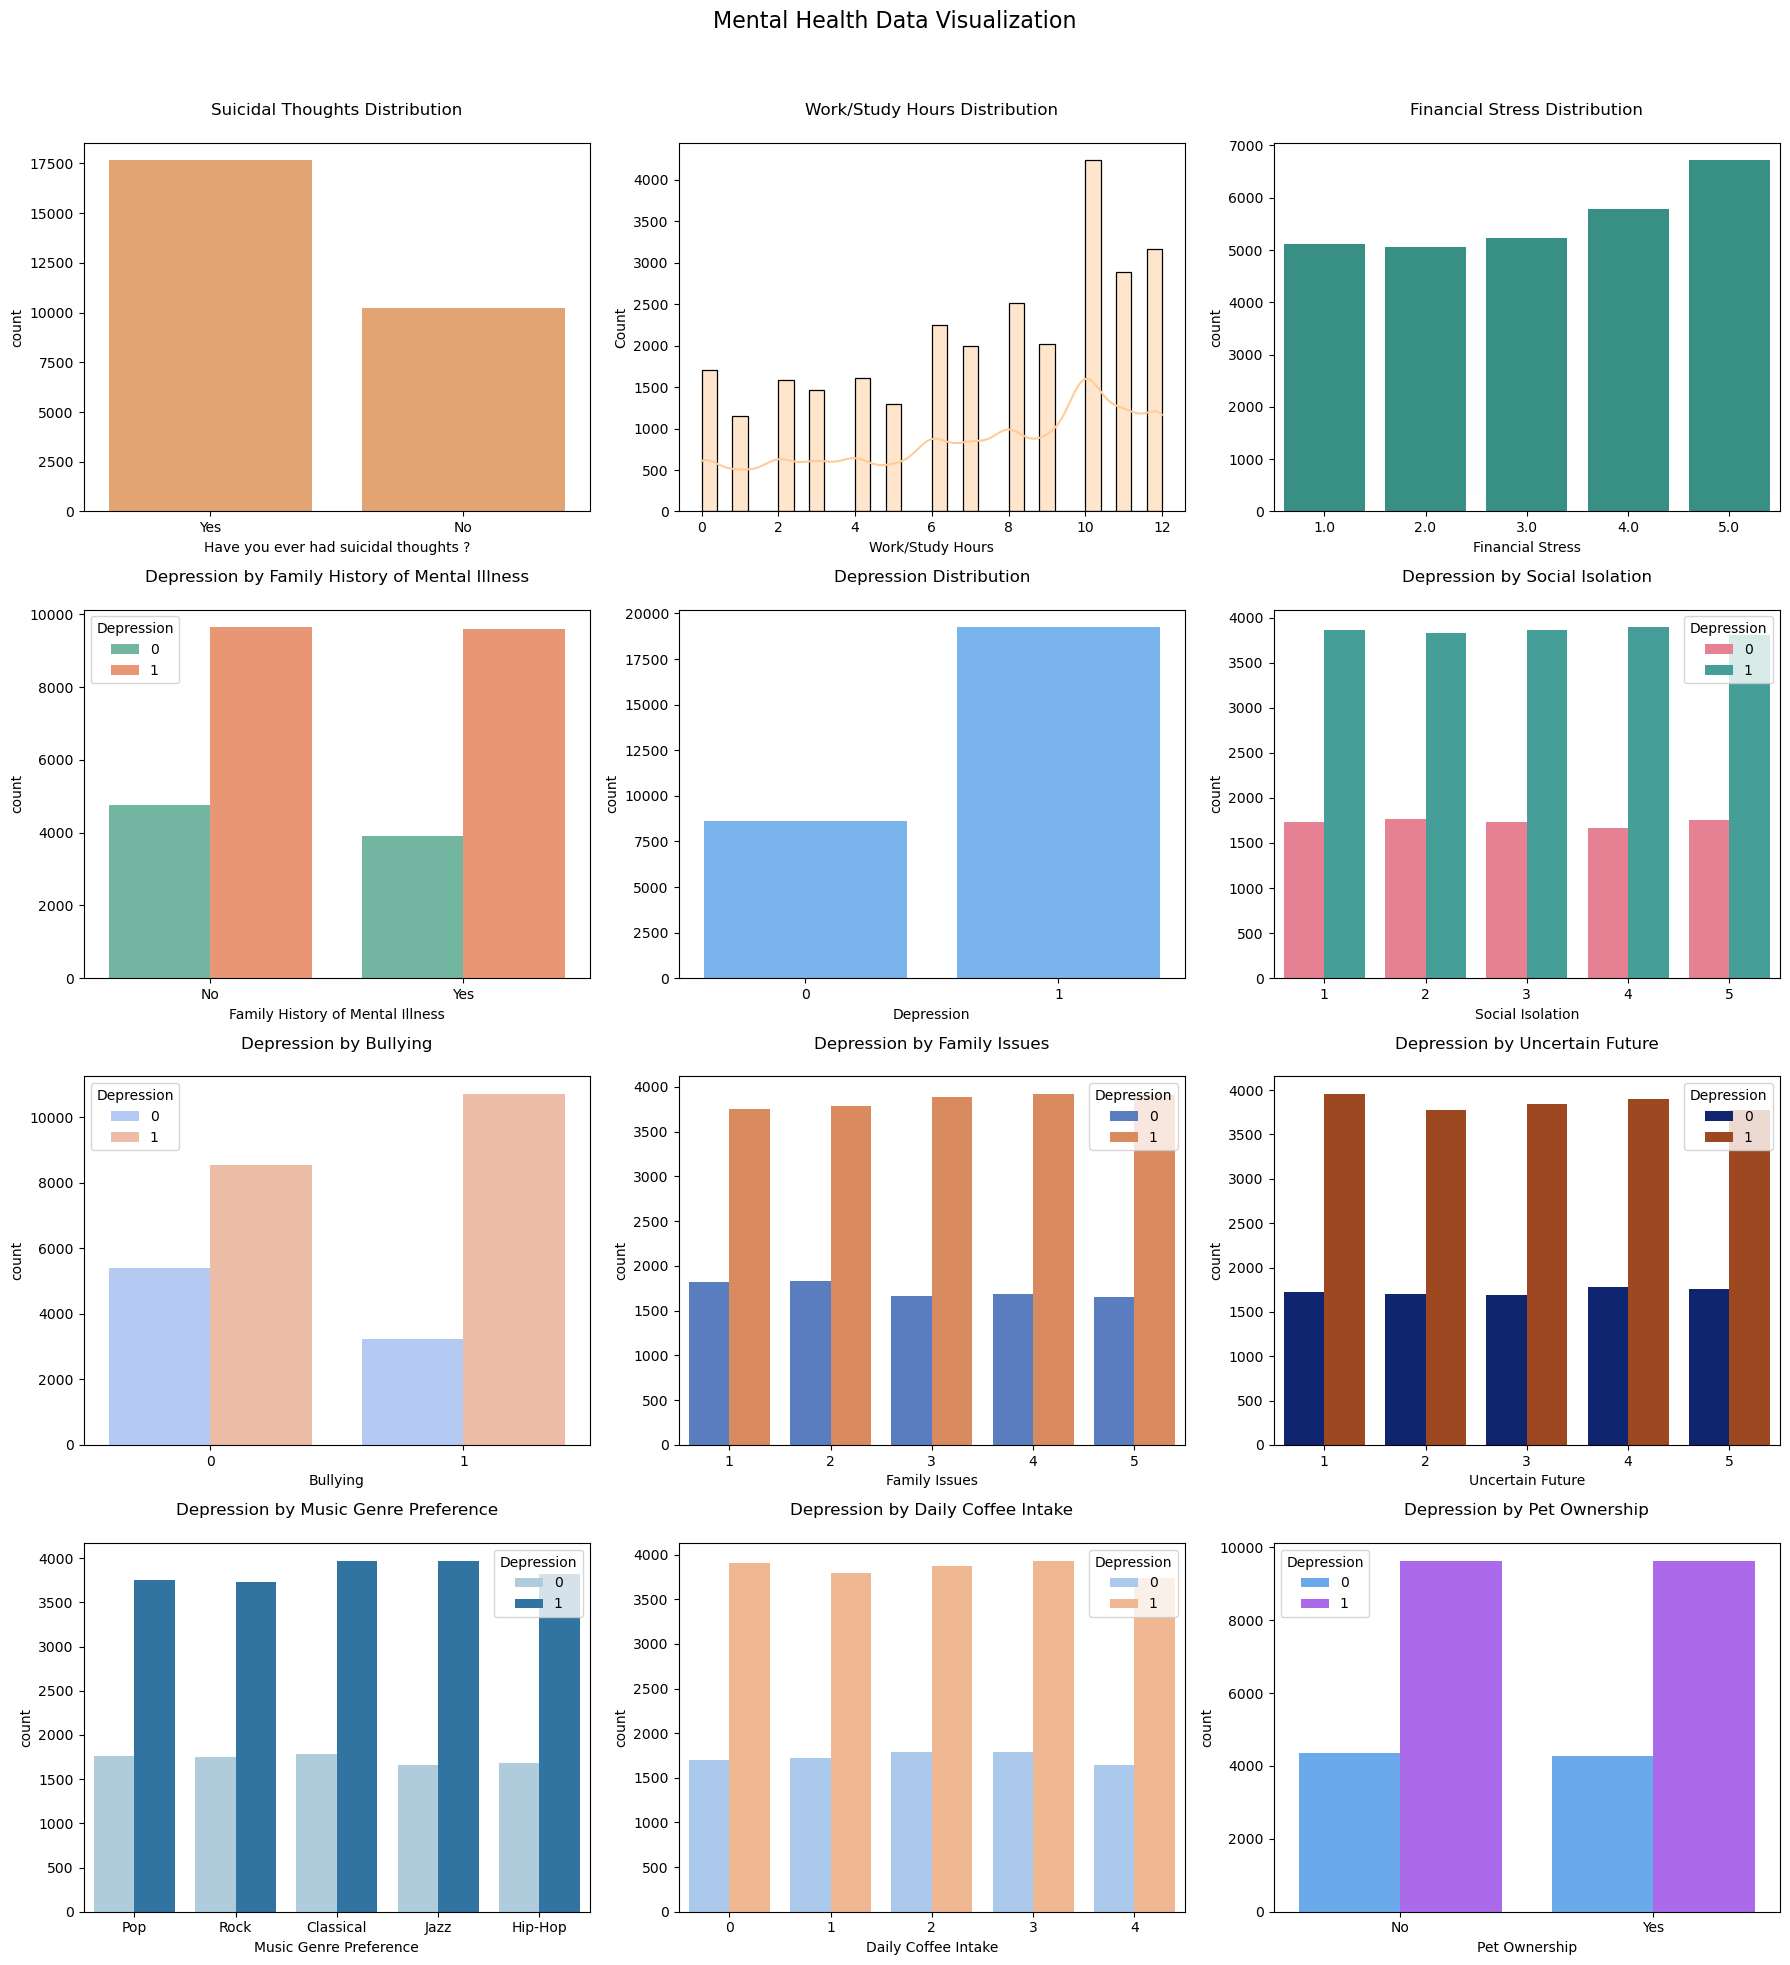

In [ ]:
colors = ["#ff9999", "#66b3ff", "#99ff99", "#ffcc99", "#c2c2f0", "#ffb3e6", "#ff6666", "#c4e17f", "#76d7c4", "#f7c6c7", "#f4a261", "#2a9d8f"]

fig, axes = plt.subplots(4, 3, figsize=(18, 20))
fig.suptitle("Mental Health Data Visualization", fontsize=16)

# Have you ever had suicidal thoughts?
sns.countplot(data=df, x="Have you ever had suicidal thoughts ?", ax=axes[0, 0], color=random.choice(colors))
axes[0, 0].set_title("Suicidal Thoughts Distribution", pad=20)
 
# Work/Study Hours
sns.histplot(df["Work/Study Hours"], bins=30, kde=True, color=random.choice(colors), ax=axes[0, 1])
axes[0, 1].set_title("Work/Study Hours Distribution", pad=20)

# Financial Stress
sns.countplot(data=df, x="Financial Stress", ax=axes[0, 2], color=random.choice(colors))
axes[0, 2].set_title("Financial Stress Distribution", pad=20)

# Family History of Mental Illness
sns.countplot(data=df, x="Family History of Mental Illness", hue="Depression", ax=axes[1, 0], palette="Set2")
axes[1, 0].set_title("Depression by Family History of Mental Illness", pad=20)

# Depression
sns.countplot(data=df, x="Depression", ax=axes[1, 1], color=random.choice(colors))
axes[1, 1].set_title("Depression Distribution", pad=20)

# Social Isolation
sns.countplot(data=df, x="Social Isolation", hue="Depression", ax=axes[1, 2], palette="husl")
axes[1, 2].set_title("Depression by Social Isolation", pad=20)

# Bullying
sns.countplot(data=df, x="Bullying", hue="Depression", ax=axes[2, 0], palette="coolwarm")
axes[2, 0].set_title("Depression by Bullying", pad=20)

# Family Issues
sns.countplot(data=df, x="Family Issues", hue="Depression", ax=axes[2, 1], palette="muted")
axes[2, 1].set_title("Depression by Family Issues", pad=20)

# Uncertain Future
sns.countplot(data=df, x="Uncertain Future", hue="Depression", ax=axes[2, 2], palette="dark")
axes[2, 2].set_title("Depression by Uncertain Future", pad=20)

# Music Genre Preference
sns.countplot(data=df, x="Music Genre Preference", hue="Depression", ax=axes[3, 0], palette="Paired")
axes[3, 0].set_title("Depression by Music Genre Preference", pad=20)

# Daily Coffee Intake
sns.countplot(data=df, x="Daily Coffee Intake", hue="Depression", ax=axes[3, 1], palette="pastel")
axes[3, 1].set_title("Depression by Daily Coffee Intake", pad=20)

# Dietary Habits values
sns.countplot(data=df, x="Pet Ownership", hue="Depression", ax=axes[3, 2], palette="cool")
axes[3, 2].set_title("Depression by Pet Ownership", pad=20)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

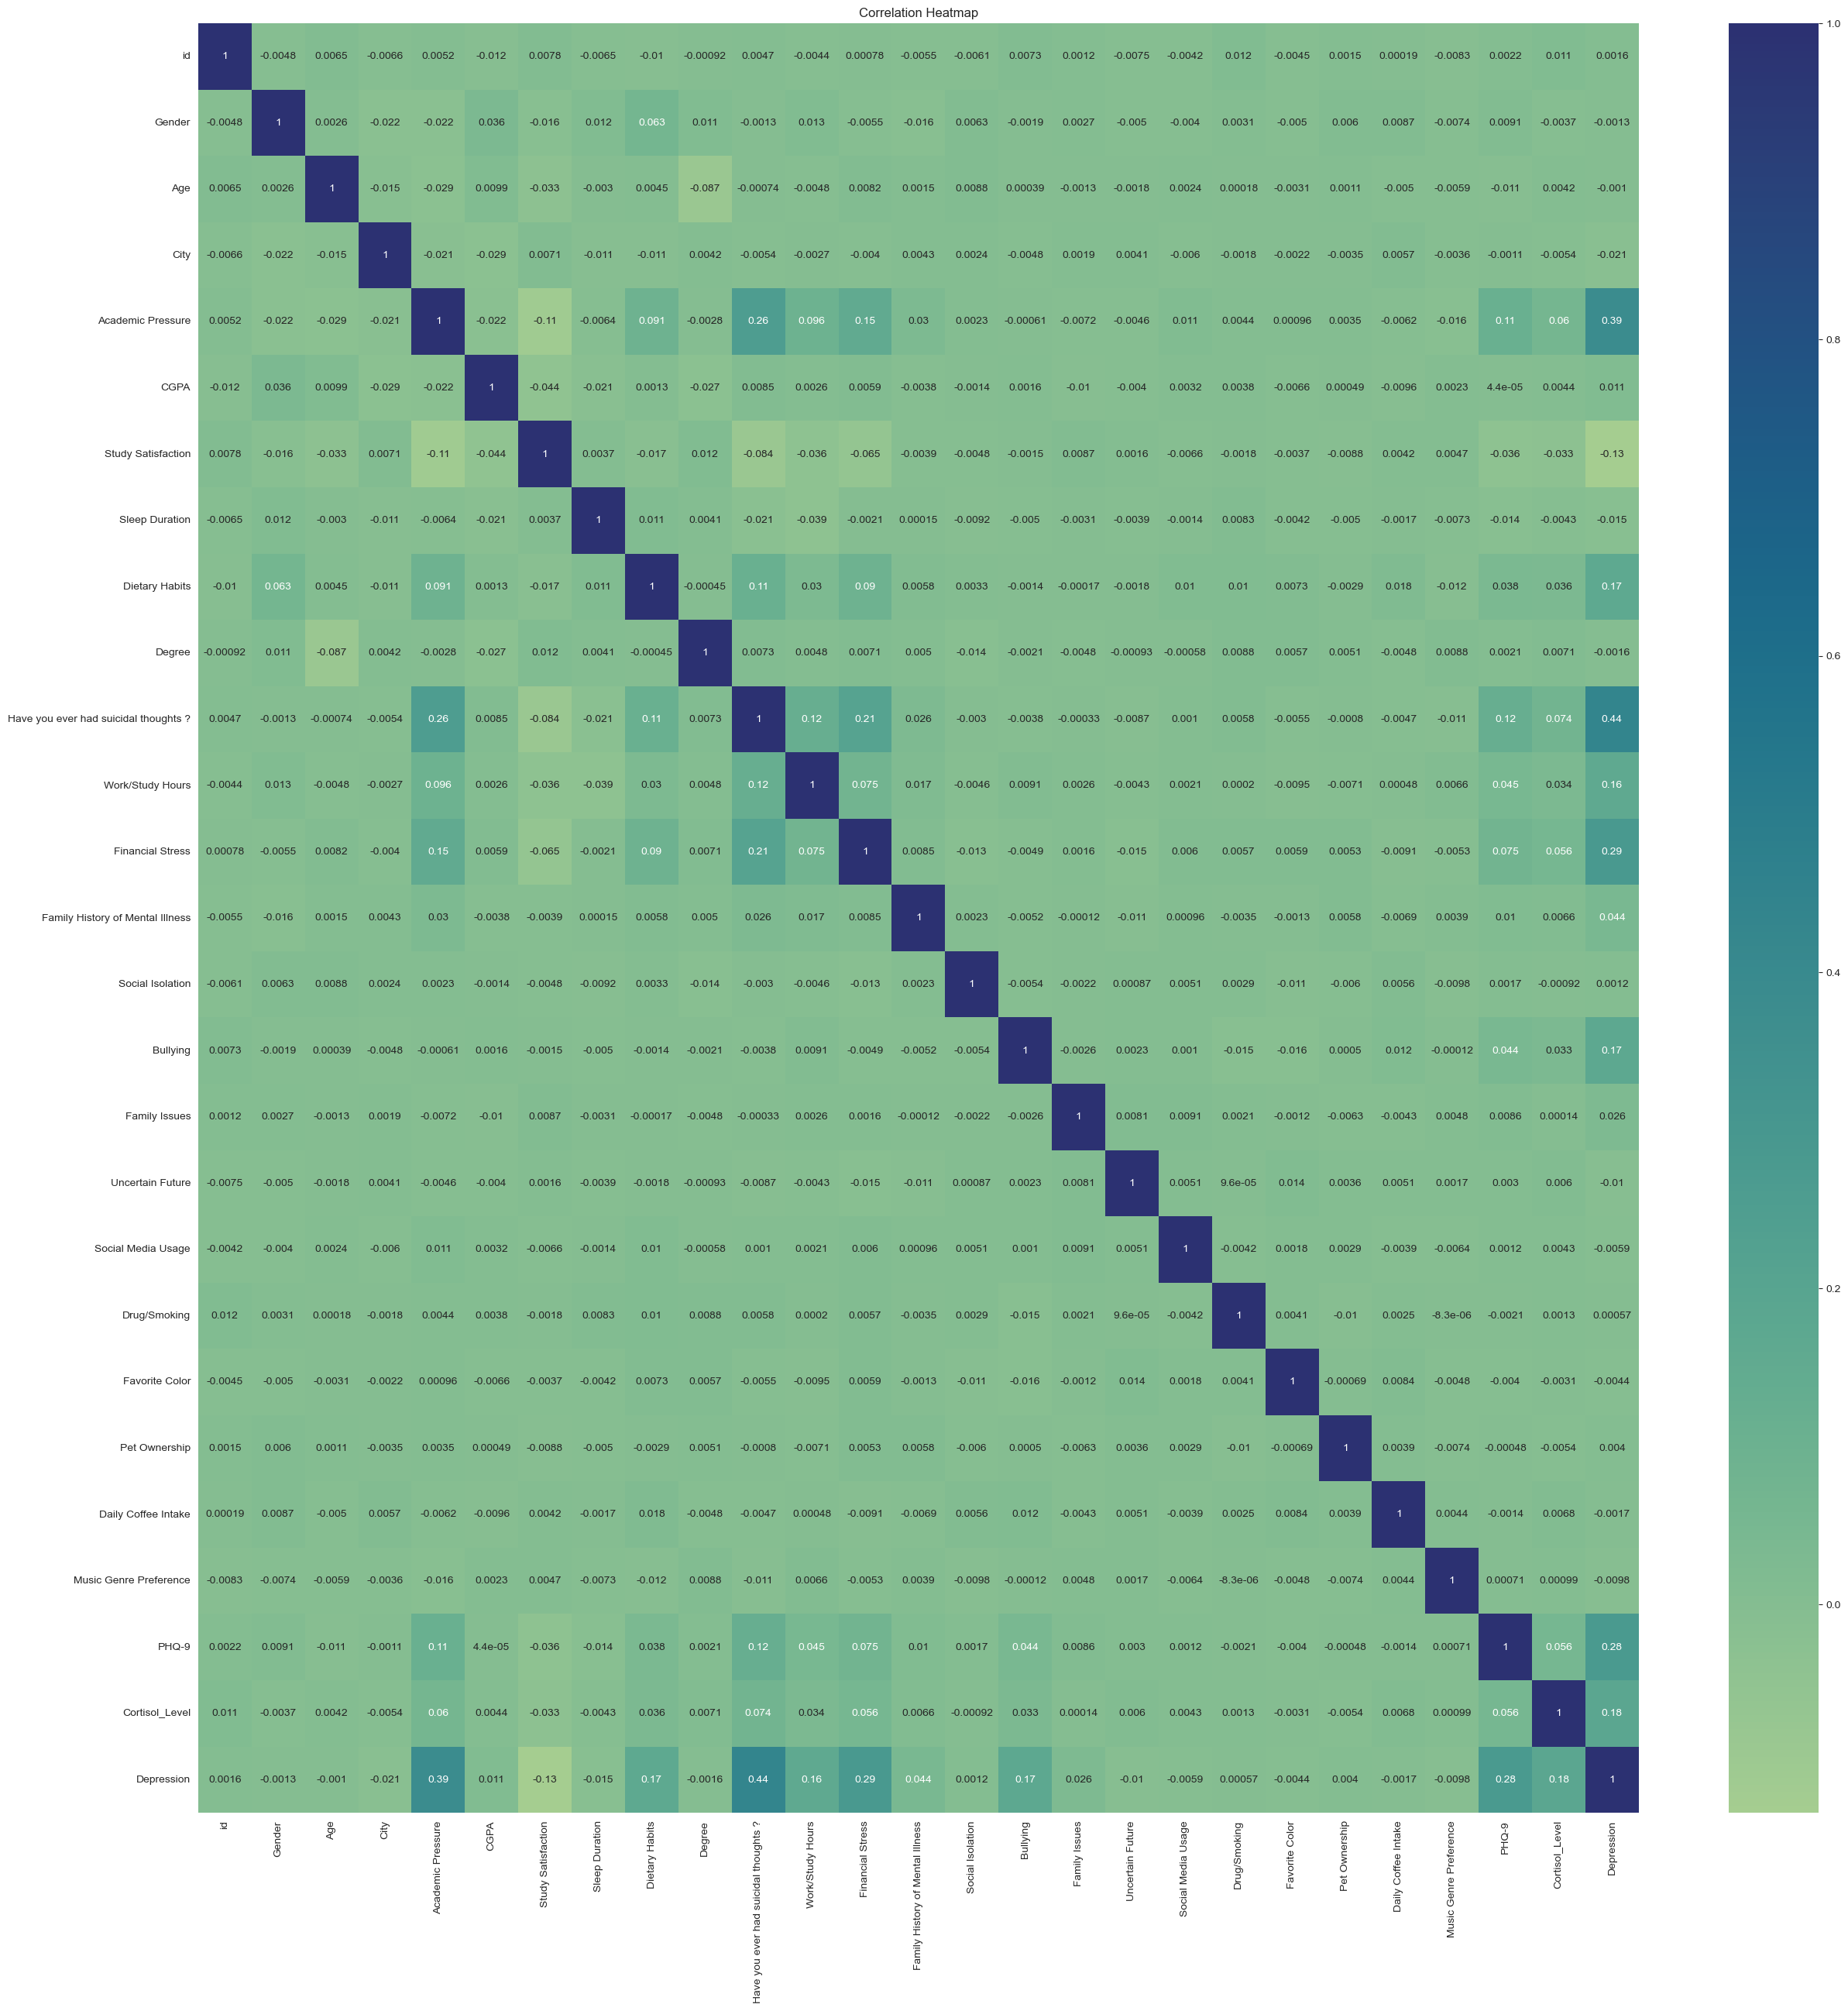

In [31]:
#heat map
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
corr_matrix = df[numeric_columns].corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot=True, cmap='crest')
plt.title('Correlation Heatmap')
plt.show()


In [32]:
correlation_matrix = df.corr()
target_correlation = correlation_matrix['Depression']
print(target_correlation)


id                                       0.001596
Gender                                  -0.001328
Age                                     -0.001012
City                                    -0.020997
Academic Pressure                        0.385063
CGPA                                     0.010543
Study Satisfaction                      -0.131795
Sleep Duration                          -0.014582
Dietary Habits                           0.165237
Degree                                  -0.001647
Have you ever had suicidal thoughts ?    0.435514
Work/Study Hours                         0.162389
Financial Stress                         0.286147
Family History of Mental Illness         0.044146
Social Isolation                         0.001239
Bullying                                 0.169139
Family Issues                            0.026149
Uncertain Future                        -0.010122
Social Media Usage                      -0.005881
Drug/Smoking                             0.000566


In [33]:
df.drop(['id'],axis=1,inplace=True)
df

Gender   Age  City  Academic Pressure  CGPA  Study Satisfaction  \
0           1  23.0    51                5.0  8.97                 2.0   
1           0  24.0     3                2.0  5.90                 5.0   
2           1  17.0    44                3.0  7.03                 5.0   
3           0  17.0    49                3.0  5.59                 2.0   
4           0  25.0    16                4.0  8.13                 3.0   
...       ...   ...   ...                ...   ...                 ...   
27896       0  25.0    45                5.0  5.75                 5.0   
27897       1  19.0    25                2.0  9.40                 3.0   
27898       1  23.0     9                3.0  6.61                 4.0   
27899       0  18.0    25                5.0  6.88                 2.0   
27900       1  24.0    38                4.0  9.24                 1.0   

       Sleep Duration  Dietary Habits  Degree  \
0                   0               0       3   
1                   0               1      10   
2                   2               0       5   
3                   1               1       7   
4                   0               1      16   
...               ...             ...     ...   
27896               0               3      11   
27897               2               0      22   
27898               0               3       0   
27899               2               0      11   
27900               2               0       7   

       Have you ever had suicidal thoughts ?  ...  Uncertain Future  \
0                                          1  ...                 1   
1                                          0  ...                 2   
2                                          0  ...                 1   
3                                          1  ...                 2   
4                                          1  ...                 1   
...                                      ...  ...               ...   
27896                                      1  ...                 1   
27897                                      0  ...                 3   
27898                                      0  ...                 4   
27899                                      1  ...                 3   
27900                                      1  ...                 1   

       Social Media Usage  Drug/Smoking  Favorite Color  Pet Ownership  \
0                       2             1               2              0   
1                       4             1               4              0   
2                       5             0               4              1   
3                       1             1               0              1   
4                       1             1               1              0   
...                   ...           ...             ...            ...   
27896                   5             1               1              0   
27897                   5             1               4              1   
27898                   4             1               2              0   
27899                   5             0               3              1   
27900                   5             0               0              0   

       Daily Coffee Intake  Music Genre Preference  PHQ-9  Cortisol_Level  \
0                        1                       3     10        6.655000   
1                        1                       4      4        5.123958   
2                        2                       3      4        4.190609   
3                        4                       0      9        7.467984   
4                        4                       3      9        0.406585   
...                    ...                     ...    ...             ...   
27896                    1                       1      1        2.362973   
27897                    0                       0      5        2.683625   
27898                    1                       2      8        4.565350   
27899            

In [34]:
df.columns

Index(['Gender', 'Age', 'City', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness',
       'Social Isolation', 'Bullying', 'Family Issues', 'Uncertain Future',
       'Social Media Usage', 'Drug/Smoking', 'Favorite Color', 'Pet Ownership',
       'Daily Coffee Intake', 'Music Genre Preference', 'PHQ-9',
       'Cortisol_Level', 'Depression'],
      dtype='object')

In [35]:
def calculate_outlier_percentage(df):
    outlier_data = []

    for column in df.select_dtypes(include=[np.number]): 
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_percentage = (len(outliers) / len(df)) * 100

        outlier_data.append([column, round(outlier_percentage, 2)])

    return pd.DataFrame(outlier_data, columns=['Feature', 'Outlier Percentage'])

outlier_df = calculate_outlier_percentage(df)
print(outlier_df)

                                  Feature  Outlier Percentage
0                                  Gender                0.00
1                                     Age                0.00
2                                    City                0.00
3                       Academic Pressure                0.00
4                                    CGPA                0.03
5                      Study Satisfaction                0.00
6                          Sleep Duration                0.06
7                          Dietary Habits                0.00
8                                  Degree                0.00
9   Have you ever had suicidal thoughts ?                0.00
10                       Work/Study Hours                0.00
11                       Financial Stress                0.00
12       Family History of Mental Illness                0.00
13                       Social Isolation                0.00
14                               Bullying                0.00
15      

In [36]:
df["Depression"].value_counts(normalize=True) * 100


Depression
1    69.004947
0    30.995053
Name: proportion, dtype: float64

In [37]:
df.to_csv("cleaned_data.csv", index=False)

---------

# **Milestone 2**
#### by: Islam Mohamed

In [57]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report ,roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier
from scipy.stats import chi2_contingency, f_oneway
from sklearn.model_selection import train_test_split, GridSearchCV
import lightgbm as lgb
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [58]:
#read the dataset depression
df=pd.read_csv("Project Data.csv")
df_encoded=pd.read_csv("cleaned_data.csv")

In [59]:
#know datatype of data
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Numeric Columns:", numeric_columns)
print("Categorical Columns:", categorical_columns)

Numeric Columns: ['id', 'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Social Isolation', 'Bullying', 'Family Issues', 'Uncertain Future', 'Social Media Usage', 'Drug/Smoking', 'Daily Coffee Intake', 'PHQ-9', 'Cortisol_Level', 'Depression']
Categorical Columns: ['Gender', 'City', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Favorite Color', 'Pet Ownership', 'Music Genre Preference']


#### **Data Analysis:**
*This section focuses on examining the dataset to extract meaningful insights and understand the relationships between different variables.*  
*The goal is to identify trends, patterns, and anomalies that could influence model performance or business decisions.*


In [60]:
df.head(20)

id  Gender   Age           City  Academic Pressure  CGPA  \
0     2    Male  23.0  Visakhapatnam                5.0  8.97   
1     8  Female  24.0      Bangalore                2.0  5.90   
2    26    Male  17.0       Srinagar                3.0  7.03   
3    30  Female  17.0       Varanasi                3.0  5.59   
4    32  Female  25.0         Jaipur                4.0  8.13   
5    33    Male  25.0           Pune                2.0  5.70   
6    52    Male  24.0          Thane                3.0  9.54   
7    56  Female  24.0        Chennai                2.0  8.04   
8    59    Male  19.0         Nagpur                3.0  9.79   
9    62    Male  20.0         Nashik                2.0  8.38   
10   83    Male  24.0         Nagpur                3.0  6.10   
11   91    Male  19.0       Vadodara                3.0  7.03   
12   94    Male  20.0         Kalyan                5.0  7.04   
13  100  Female  19.0         Rajkot                2.0  8.52   
14  103  Female  19.0         Kalyan                5.0  5.64   
15  106    Male  25.0       Srinagar                3.0  8.58   
16  120    Male  25.0         Nashik                5.0  6.51   
17  132  Female  20.0      Ahmedabad                5.0  7.25   
18  139    Male  19.0        Chennai                2.0  7.83   
19  145    Male  25.0         Kalyan                3.0  9.93   

    Study Satisfaction     Sleep Duration Dietary Habits    Degree  ...  \
0                  2.0          5-6 hours        Healthy   B.Pharm  ...   
1                  5.0          5-6 hours       Moderate       BSc  ...   
2                  5.0  Less than 5 hours        Healthy        BA  ...   
3                  2.0          7-8 hours       Moderate       BCA  ...   
4                  3.0          5-6 hours       Moderate    M.Tech  ...   
5                  3.0  Less than 5 hours        Healthy       LLB  ...   
6                  4.0          7-8 hours        Healthy       BSc  ...   
7                  4.0  Less than 5 hours      Unhealthy  Class 12  ...   
8                  1.0          7-8 hours       Moderate      B.Ed  ...   
9                  3.0  Less than 5 hours       Moderate       LLB  ...   
10                 3.0          5-6 hours       Moderate  Class 12  ...   
11                 4.0  Less than 5 hours        Healthy        BE  ...   
12                 1.0  Less than 5 hours       Moderate    M.Tech  ...   
13                 4.0  Less than 5 hours      Unhealthy  Class 12  ...   
14                 5.0  Less than 5 hours       Moderate  Class 12  ...   
15                 3.0  More than 8 hours       Moderate    M.Tech  ...   
16                 2.0  Less than 5 hours      Unhealthy      M.Ed  ...   
17                 3.0          5-6 hours        Healthy  Class 12  ...   
18                 2.0          7-8 hours      Unhealthy  Class 12  ...   
19                 3.0          5-6 hours       Moderate      B.Ed  ...   

   Uncertain Future  Social Media Usage  Drug/Smoking Favorite Color  \
0                 1                   2             1          Green   
1                 2                   4             1         Yellow   
2                 1                   5             0         Yellow   
3                 2                   1             1          Black   
4                 1                   1             1           Blue   
5                 3                   5             0         Yellow   
6                 5                   3             1           Blue   
7                 5                   1             1         Yellow   
8                 2                   1             0          Green   
9                 4                   5             0         Yellow   
10                4                   4             1            Red   
11                1                   4             0          Green   
12                5                   5             0          Green   
13                3                   2             0  

In [62]:
df_encoded.head(20)

Gender   Age  City  Academic Pressure  CGPA  Study Satisfaction  \
0        1  23.0    51                5.0  8.97                 2.0   
1        0  24.0     3                2.0  5.90                 5.0   
2        1  17.0    44                3.0  7.03                 5.0   
3        0  17.0    49                3.0  5.59                 2.0   
4        0  25.0    16                4.0  8.13                 3.0   
5        1  25.0    39                2.0  5.70                 3.0   
6        1  24.0    46                3.0  9.54                 4.0   
7        0  24.0     6                2.0  8.04                 4.0   
8        1  19.0    33                3.0  9.79                 1.0   
9        1  20.0    37                2.0  8.38                 3.0   
10       1  24.0    33                3.0  6.10                 3.0   
11       1  19.0    48                3.0  7.03                 4.0   
12       1  20.0    17                5.0  7.04                 1.0   
13       0  19.0    40                2.0  8.52                 4.0   
14       0  19.0    17                5.0  5.64                 5.0   
15       1  25.0    44                3.0  8.58                 3.0   
16       1  25.0    37                5.0  6.51                 2.0   
17       0  20.0     2                5.0  7.25                 3.0   
18       1  19.0     6                2.0  7.83                 2.0   
19       1  25.0    17                3.0  9.93                 3.0   

    Sleep Duration  Dietary Habits  Degree  \
0                0               0       3   
1                0               1      10   
2                2               0       5   
3                1               1       7   
4                0               1      16   
5                2               0      12   
6                1               0      10   
7                2               3      11   
8                1               1       2   
9                2               1      12   
10               0               1      11   
11               2               0       8   
12               2               1      16   
13               2               3      11   
14               2               1      11   
15               3               1      16   
16               2               3      14   
17               0               0      11   
18               1               3      11   
19               0               1       2   

    Have you ever had suicidal thoughts ?  ...  Uncertain Future  \
0                                       1  ...                 1   
1                                       0  ...                 2   
2                                       0  ...                 1   
3                                       1  ...                 2   
4                                       1  ...                 1   
5                                       0  ...                 3   
6                                       0  ...                 5   
7                                       0  ...                 5   
8                                       1  ...                 2   
9                                       1  ...                 4   
10                                      1  ...                 4   
11                                      1  ...                 1   
12                                      0  ...                 5   
13                                      0  ...                 3   
14                                      1  ...                 5   
15                                      1  ...                 2   
16                                      1  ...                 4   
17                                      1  ...                 1   
18                                      0  ...                 3   
19                                      0  ...                 5   

    Social Media Usage  Drug/Smoking  Favorite Color  Pet Ownership  \
0                    2             1         

In [63]:
max_values = df_encoded.max()
print(max_values)
min_values = df_encoded.min()
print(min_values)

Gender                                    1.000000
Age                                      25.000000
City                                     51.000000
Academic Pressure                         5.000000
CGPA                                     10.000000
Study Satisfaction                        5.000000
Sleep Duration                            4.000000
Dietary Habits                            3.000000
Degree                                   23.000000
Have you ever had suicidal thoughts ?     1.000000
Work/Study Hours                         12.000000
Financial Stress                          5.000000
Family History of Mental Illness          1.000000
Social Isolation                          5.000000
Bullying                                  1.000000
Family Issues                             5.000000
Uncertain Future                          5.000000
Social Media Usage                        5.000000
Drug/Smoking                              1.000000
Favorite Color                 

In [64]:
# standardization
from sklearn.preprocessing import StandardScaler

depression = df_encoded["Depression"]
df_encoded.drop("Depression", axis=1, inplace=True)

scaler = StandardScaler()
standardized_data = scaler.fit_transform(df_encoded)
df_standardized = pd.DataFrame(standardized_data, columns=df_encoded.columns)
df_standardized["Depression"] = depression
df_standardized.head()

Gender       Age      City  Academic Pressure      CGPA  \
0  0.891373  0.740244  1.510523           1.345456  0.893354   
1 -1.121865  1.116908 -1.424206          -0.826195 -1.194113   
2  0.891373 -1.519737  1.082541          -0.102311 -0.425762   
3 -1.121865 -1.519737  1.388242          -0.102311 -1.404899   
4 -1.121865  1.493571 -0.629384           0.621573  0.322191   

   Study Satisfaction  Sleep Duration  Dietary Habits    Degree  \
0           -0.693539       -1.421814       -1.182432 -1.042063   
1            1.510565       -1.421814       -0.375754  0.116922   
2            1.510565        0.459507       -1.182432 -0.710924   
3           -0.693539       -0.481154       -0.375754 -0.379786   
4            0.041162       -1.421814       -0.375754  1.110337   

   Have you ever had suicidal thoughts ?  ...  Uncertain Future  \
0                               0.761634  ...         -1.409488   
1                              -1.312967  ...         -0.703681   
2                              -1.312967  ...         -1.409488   
3                               0.761634  ...         -0.703681   
4                               0.761634  ...         -1.409488   

   Social Media Usage  Drug/Smoking  Favorite Color  Pet Ownership  \
0           -0.711510      1.002512       -0.003847      -0.996422   
1            0.702086      1.002512        1.408253      -0.996422   
2            1.408884     -0.997494        1.408253       1.003591   
3           -1.418308      1.002512       -1.415947       1.003591   
4           -1.418308      1.002512       -0.709897      -0.996422   

   Daily Coffee Intake  Music Genre Preference     PHQ-9  Cortisol_Level  \
0            -0.704880                0.719349  0.647035        0.955627   
1            -0.704880                1.425312 -0.518447        0.360493   
2             0.005885                0.719349 -0.518447       -0.002310   
3             1.427416               -1.398539  0.452788        1.271643   
4             1.427416                0.719349  0.452788       -1.473204   

   Depression  
0           1  
1           0  
2           0  
3           1  
4           0  

[5 rows x 26 columns]

In [65]:
# normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df_encoded)
df_normalized = pd.DataFrame(normalized_data, columns=df_encoded.columns)
df_normalized["Depression"] = depression
df_normalized.head(50)

Gender       Age      City  Academic Pressure   CGPA  Study Satisfaction  \
0      1.0  0.777778  1.000000                1.0  0.897                 0.4   
1      0.0  0.888889  0.058824                0.4  0.590                 1.0   
2      1.0  0.111111  0.862745                0.6  0.703                 1.0   
3      0.0  0.111111  0.960784                0.6  0.559                 0.4   
4      0.0  1.000000  0.313725                0.8  0.813                 0.6   
5      1.0  1.000000  0.764706                0.4  0.570                 0.6   
6      1.0  0.888889  0.901961                0.6  0.954                 0.8   
7      0.0  0.888889  0.117647                0.4  0.804                 0.8   
8      1.0  0.333333  0.647059                0.6  0.979                 0.2   
9      1.0  0.444444  0.725490                0.4  0.838                 0.6   
10     1.0  0.888889  0.647059                0.6  0.610                 0.6   
11     1.0  0.333333  0.941176                0.6  0.703                 0.8   
12     1.0  0.444444  0.333333                1.0  0.704                 0.2   
13     0.0  0.333333  0.784314                0.4  0.852                 0.8   
14     0.0  0.333333  0.333333                1.0  0.564                 1.0   
15     1.0  1.000000  0.862745                0.6  0.858                 0.6   
16     1.0  1.000000  0.725490                1.0  0.651                 0.4   
17     0.0  0.444444  0.039216                1.0  0.725                 0.6   
18     1.0  0.333333  0.117647                0.4  0.783                 0.4   
19     1.0  1.000000  0.333333                0.6  0.993                 0.6   
20     1.0  0.555556  0.411765                0.6  0.874                 0.8   
21     1.0  0.555556  0.411765                0.6  0.673                 0.6   
22     0.0  1.000000  0.039216                0.6  0.557                 0.6   
23     1.0  0.777778  0.901961                0.2  0.859                 0.8   
24     1.0  0.222222  0.058824                0.8  0.710                 0.6   
25     0.0  0.444444  0.627451                1.0  0.858                 1.0   
26     1.0  0.777778  0.039216                0.4  0.608                 1.0   
27     1.0  1.000000  0.470588                0.6  0.725                 0.6   
28     1.0  0.444444  0.294118                1.0  0.574                 0.4   
29     1.0  0.444444  0.333333                0.6  0.986                 0.6   
30     1.0  0.222222  0.882353                0.8  0.670                 1.0   
31     1.0  0.222222  1.000000                0.4  0.621                 0.6   
32     1.0  0.555556  0.313725                0.2  0.725                 0.2   
33     0.0  0.111111  0.333333                0.2  0.587                 0.6   
34     1.0  0.555556  0.882353                0.2  0.804                 0.6   
35     0.0  1.000000  0.490196                0.2  0.637                 0.6   
36     0.0  0.555556  0.098039                1.0  0.972                 0.4   
37     1.0  0.222222  0.862745                1.0  0.588                 0.6   
38     1.0  0.777778  0.901961                0.2  0.956                 0.4   
39     1.0  1.000000  0.568627                0.6  0.651                 0.8   
40     0.0  0.444444  0.901961                0.6  0.699                 0.4   
41     1.0  0.777778  0.019608                0.4  0.610                 0.8   
42     1.0  0.333333  0.019608                0.2  0.524                 0.6   
43     0.0  0.444444  0.215686                0.8  0.921                 0.2   
44     0.0  0.777778  0.117647                0.2  0.785                 0.8   
45     1.0  0.666667  0.470588                0.2  0.993                 0.2   
46     0.0  0.333333  0.568627                0.4  0.695                 0.4   
47     0.0  0.000000  0.274510                0.2  0.586                 0.6   
48     1.0  0.555556  0.333333                0.6  0.704                 0.6   
49  

In [66]:
df_encoded["Depression"] = depression
df_encoded.head()

Gender   Age  City  Academic Pressure  CGPA  Study Satisfaction  \
0       1  23.0    51                5.0  8.97                 2.0   
1       0  24.0     3                2.0  5.90                 5.0   
2       1  17.0    44                3.0  7.03                 5.0   
3       0  17.0    49                3.0  5.59                 2.0   
4       0  25.0    16                4.0  8.13                 3.0   

   Sleep Duration  Dietary Habits  Degree  \
0               0               0       3   
1               0               1      10   
2               2               0       5   
3               1               1       7   
4               0               1      16   

   Have you ever had suicidal thoughts ?  ...  Uncertain Future  \
0                                      1  ...                 1   
1                                      0  ...                 2   
2                                      0  ...                 1   
3                                      1  ...                 2   
4                                      1  ...                 1   

   Social Media Usage  Drug/Smoking  Favorite Color  Pet Ownership  \
0                   2             1               2              0   
1                   4             1               4              0   
2                   5             0               4              1   
3                   1             1               0              1   
4                   1             1               1              0   

   Daily Coffee Intake  Music Genre Preference  PHQ-9  Cortisol_Level  \
0                    1                       3     10        6.655000   
1                    1                       4      4        5.123958   
2                    2                       3      4        4.190609   
3                    4                       0      9        7.467984   
4                    4                       3      9        0.406585   

   Depression  
0           1  
1           0  
2           0  
3           1  
4           0  

[5 rows x 26 columns]

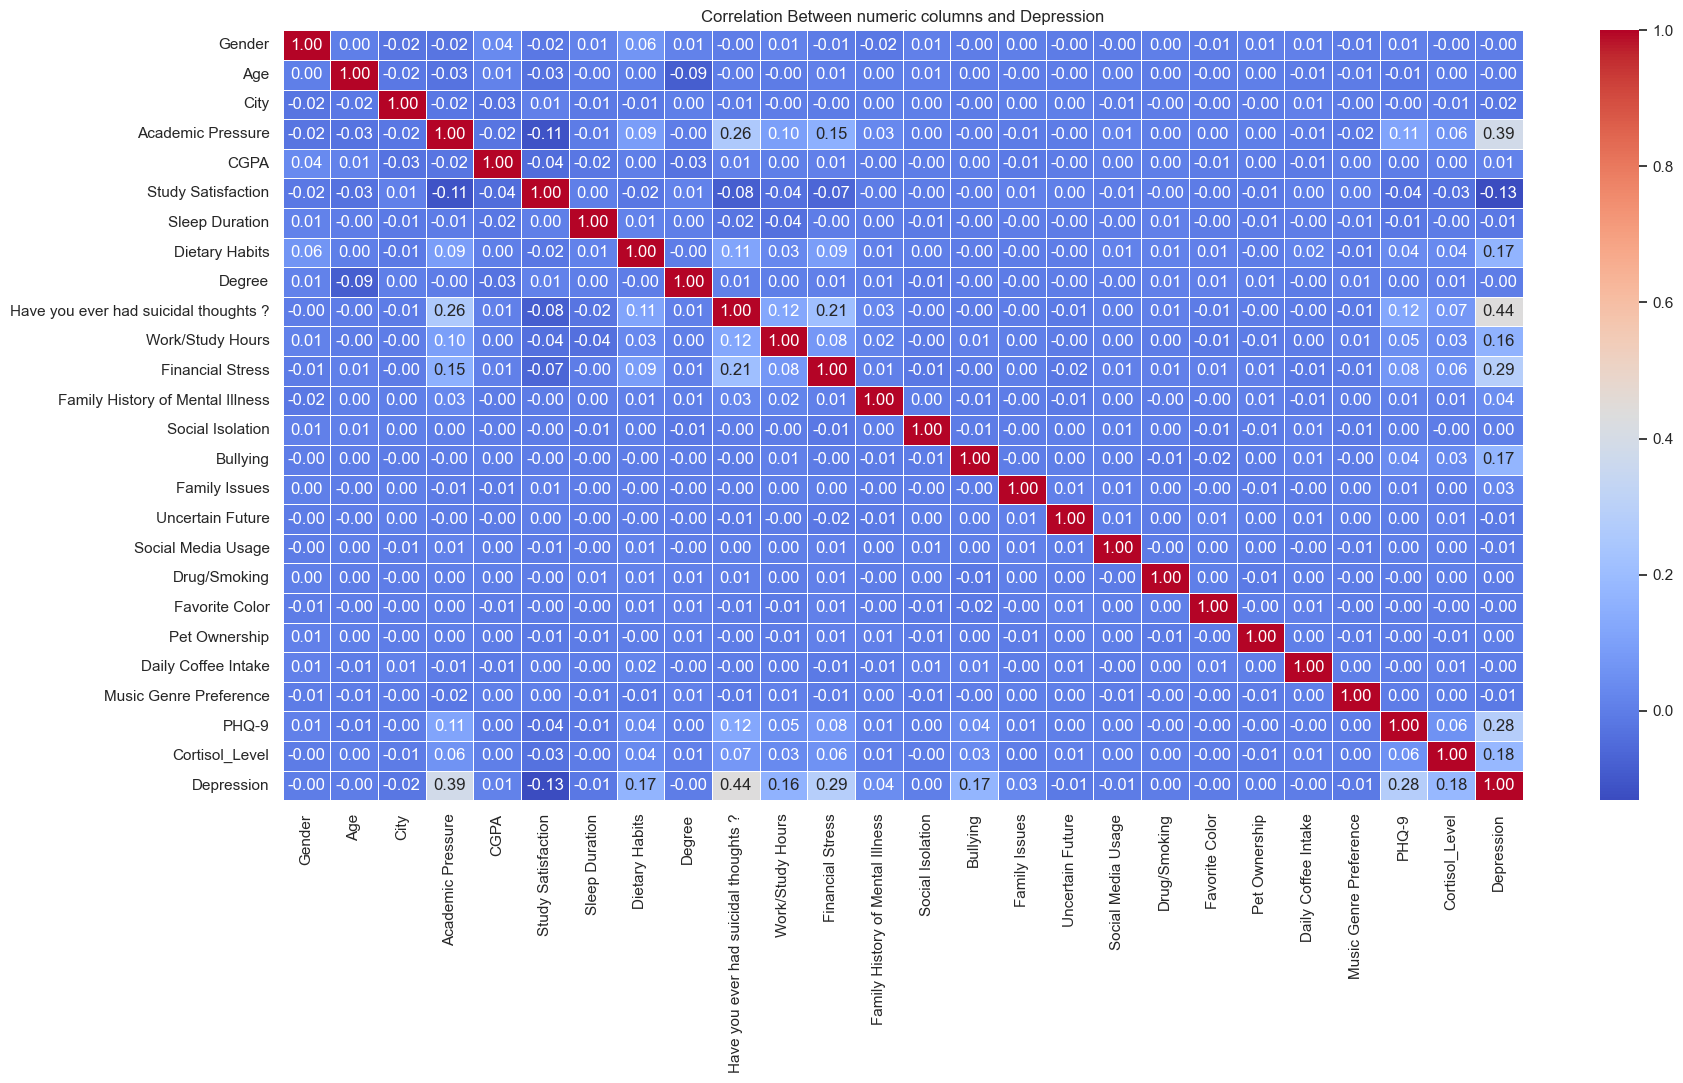

In [67]:
# correlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between numeric columns and Depression")
plt.show()

In [68]:
# Hypothesis Testing
results = {}

for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df["Depression"])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    results[col] = p

for col, p_value in results.items():
    print(f"Chi-Square Test for {col} vs Depression: p-value = {p_value:.4f}")

    if p_value < 0.05:
        print(f"🔴 Significant Relationship! {col} is likely related to Depression.\n")
    else:
        print(f"🟢 No Significant Relationship. {col} is NOT strongly related to Depression.\n")

Chi-Square Test for Gender vs Depression: p-value = 0.8347
🟢 No Significant Relationship. Gender is NOT strongly related to Depression.

Chi-Square Test for City vs Depression: p-value = 0.0000
🔴 Significant Relationship! City is likely related to Depression.

Chi-Square Test for Sleep Duration vs Depression: p-value = 0.0000
🔴 Significant Relationship! Sleep Duration is likely related to Depression.

Chi-Square Test for Dietary Habits vs Depression: p-value = 0.0000
🔴 Significant Relationship! Dietary Habits is likely related to Depression.

Chi-Square Test for Degree vs Depression: p-value = 0.0000
🔴 Significant Relationship! Degree is likely related to Depression.

Chi-Square Test for Have you ever had suicidal thoughts ? vs Depression: p-value = 0.0000
🔴 Significant Relationship! Have you ever had suicidal thoughts ? is likely related to Depression.

Chi-Square Test for Family History of Mental Illness vs Depression: p-value = 0.0000
🔴 Significant Relationship! Family History of Me

#### **Data Visualization:**
*In this section, we explore the dataset through visual representations to better understand the underlying patterns, trends, and relationships between variables.*

In [69]:
df.head()

id  Gender   Age           City  Academic Pressure  CGPA  \
0   2    Male  23.0  Visakhapatnam                5.0  8.97   
1   8  Female  24.0      Bangalore                2.0  5.90   
2  26    Male  17.0       Srinagar                3.0  7.03   
3  30  Female  17.0       Varanasi                3.0  5.59   
4  32  Female  25.0         Jaipur                4.0  8.13   

   Study Satisfaction     Sleep Duration Dietary Habits   Degree  ...  \
0                 2.0          5-6 hours        Healthy  B.Pharm  ...   
1                 5.0          5-6 hours       Moderate      BSc  ...   
2                 5.0  Less than 5 hours        Healthy       BA  ...   
3                 2.0          7-8 hours       Moderate      BCA  ...   
4                 3.0          5-6 hours       Moderate   M.Tech  ...   

  Uncertain Future  Social Media Usage  Drug/Smoking Favorite Color  \
0                1                   2             1          Green   
1                2                   4             1         Yellow   
2                1                   5             0         Yellow   
3                2                   1             1          Black   
4                1                   1             1           Blue   

   Pet Ownership  Daily Coffee Intake  Music Genre Preference  PHQ-9  \
0             No                    1                     Pop     10   
1             No                    1                    Rock      4   
2            Yes                    2                     Pop      4   
3            Yes                    4               Classical      9   
4             No                    4                     Pop      9   

   Cortisol_Level  Depression  
0        6.655000           1  
1        5.123958           0  
2        4.190609           0  
3        7.467984           1  
4        0.406585           0  

[5 rows x 27 columns]

In [70]:
df["Have you ever had suicidal thoughts ?"].unique()

array(['Yes', 'No'], dtype=object)

In [71]:
categorical_columns

['Gender',
 'City',
 'Sleep Duration',
 'Dietary Habits',
 'Degree',
 'Have you ever had suicidal thoughts ?',
 'Family History of Mental Illness',
 'Favorite Color',
 'Pet Ownership',
 'Music Genre Preference']

In [72]:
numeric_columns

['id',
 'Age',
 'Academic Pressure',
 'CGPA',
 'Study Satisfaction',
 'Work/Study Hours',
 'Financial Stress',
 'Social Isolation',
 'Bullying',
 'Family Issues',
 'Uncertain Future',
 'Social Media Usage',
 'Drug/Smoking',
 'Daily Coffee Intake',
 'PHQ-9',
 'Cortisol_Level',
 'Depression']

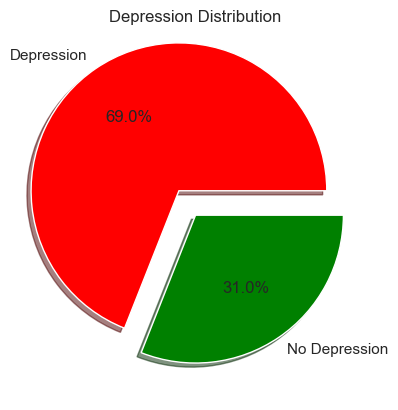

In [73]:
# Create a pie chart for the 'sex' column
df['depression_label'] = df['Depression'].map({
    0: 'No Depression',
    1: 'Depression'
})

# نعدّ التكرارات لكل فئة
counts = df['depression_label'].value_counts()
colors = ['red', 'green']
# نرسم الـ Pie Chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%',shadow=True,explode=[0.2,0],colors=colors)
plt.title('Depression Distribution')
plt.show()

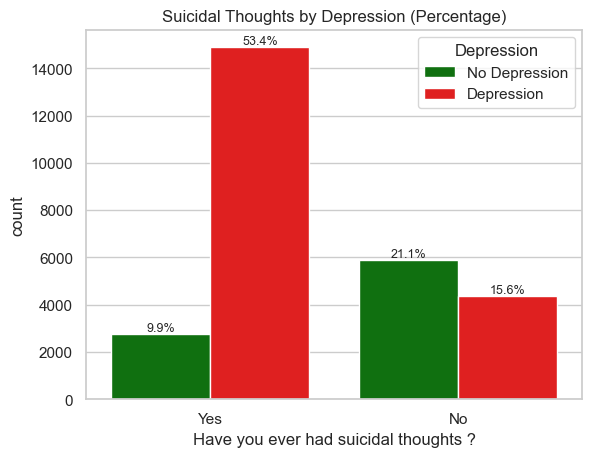

In [74]:
ax = sns.countplot(
    x="Have you ever had suicidal thoughts ?",
    hue="Depression",
    data=df,
    palette={0: "green", 1: "red"}
)

total = len(df)

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        percent = (height / total) * 100
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.2,
            f'{percent:.1f}%',
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.title("Suicidal Thoughts by Depression (Percentage)")
plt.legend(title="Depression", labels=["No Depression", "Depression"])
plt.show()



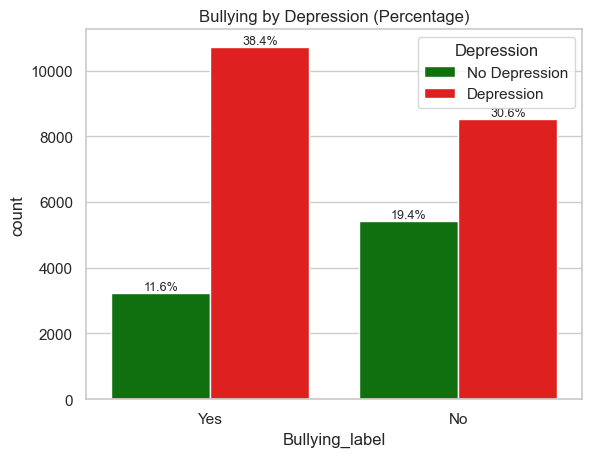

In [75]:
df['Bullying_label'] = df['Bullying'].map({
    0: 'No',
    1: 'Yes'
})
ax = sns.countplot(
    x="Bullying_label",
    hue="Depression",
    data=df,
    palette={0: "green", 1: "red"}
)

total = len(df)

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        percent = (height / total) * 100
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.2,
            f'{percent:.1f}%',
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.title("Bullying by Depression (Percentage)")
plt.legend(title="Depression", labels=["No Depression", "Depression"])
plt.show()

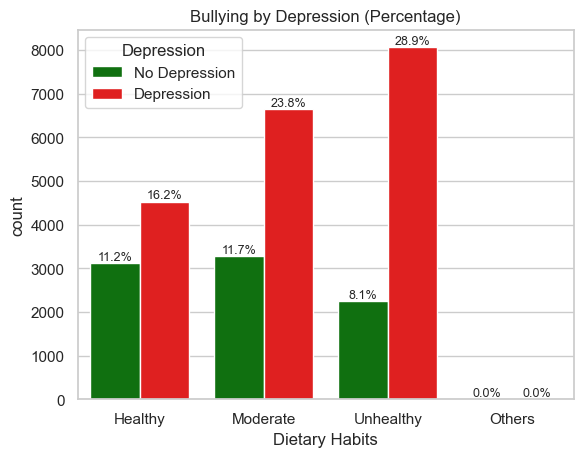

In [76]:
ax = sns.countplot(
    x="Dietary Habits",
    hue="Depression",
    data=df,
    palette={0: "green", 1: "red"}
)

total = len(df)

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        percent = (height / total) * 100
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.2,
            f'{percent:.1f}%',
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.title("Bullying by Depression (Percentage)")
plt.legend(title="Depression", labels=["No Depression", "Depression"])
plt.show()

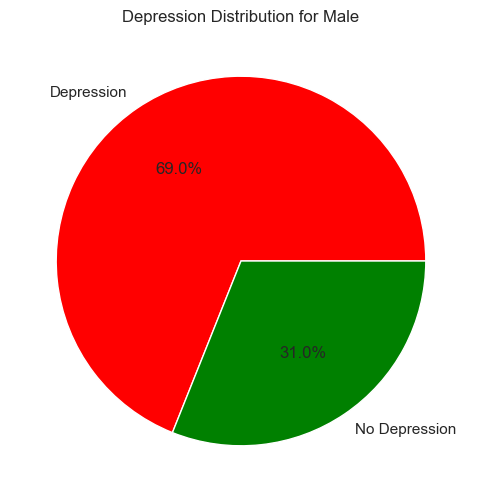

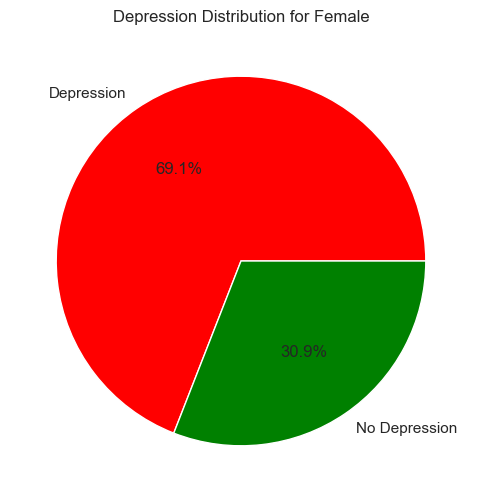

In [79]:
for gender in df['Gender'].unique():
    gender_data = df[df['Gender'] == gender]
    
    # حساب التوزيع
    counts = gender_data['depression_label'].value_counts()
    total = len(gender_data)
    percentages = (counts / total) * 100
    
    # رسم الـ Pie Chart
    plt.figure(figsize=(12, 6))
    plt.pie(percentages, labels=[f'{counts.index[0]}', f'{counts.index[1]}'], autopct='%1.1f%%', colors=['red', 'green'])
    plt.title(f'Depression Distribution for {gender}')
    plt.show()

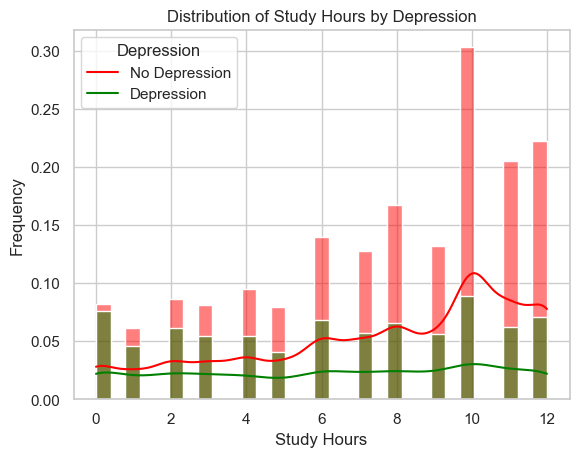

In [90]:
sns.histplot(data=df, x="Work/Study Hours", hue="Depression", palette={0: "green", 1: "red"}, stat="density", kde=True)

# إضافة العنوان والتفاصيل
plt.title("Distribution of Study Hours by Depression")
plt.xlabel("Study Hours")
plt.ylabel("Frequency")
plt.legend(title="Depression", labels=["No Depression", "Depression"])

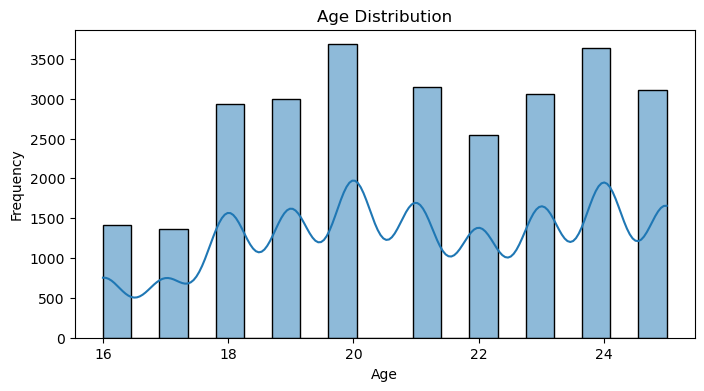

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

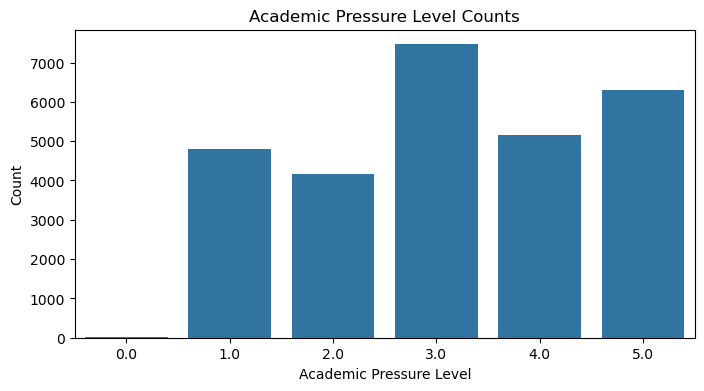

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Academic Pressure')
plt.title('Academic Pressure Level Counts')
plt.xlabel('Academic Pressure Level')
plt.ylabel('Count')
plt.show()

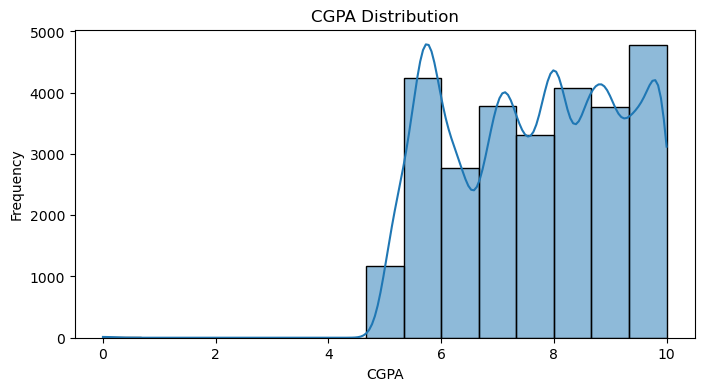

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='CGPA', bins=15, kde=True)
plt.title('CGPA Distribution')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()

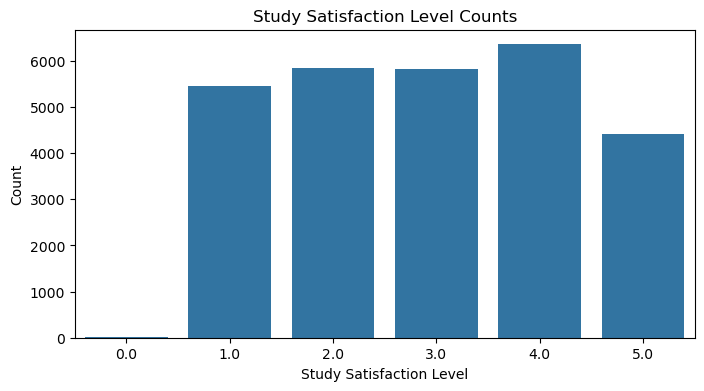

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Study Satisfaction')
plt.title('Study Satisfaction Level Counts')
plt.xlabel('Study Satisfaction Level')
plt.ylabel('Count')
plt.show()

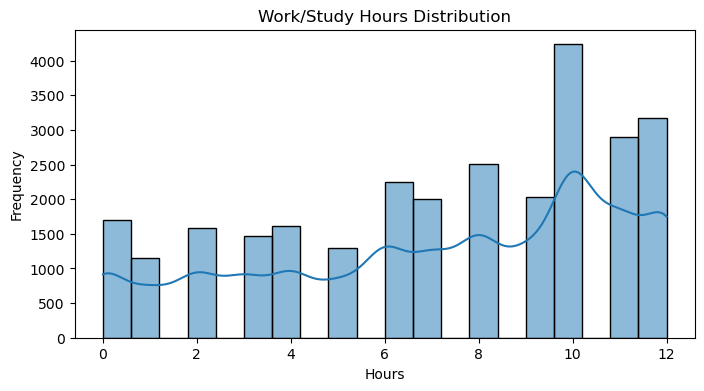

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Work/Study Hours', bins=20, kde=True)
plt.title('Work/Study Hours Distribution')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.show()

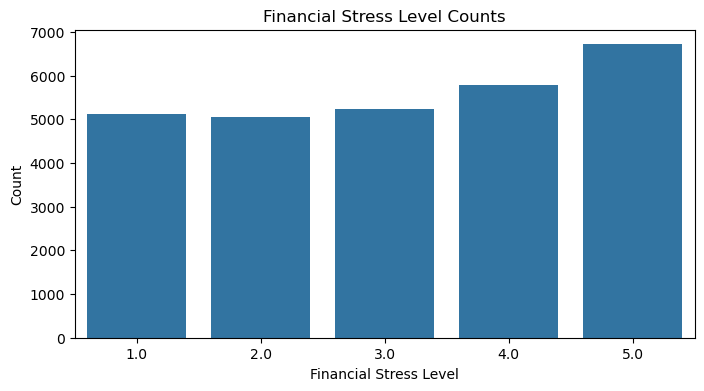

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Financial Stress')
plt.title('Financial Stress Level Counts')
plt.xlabel('Financial Stress Level')
plt.ylabel('Count')
plt.show()

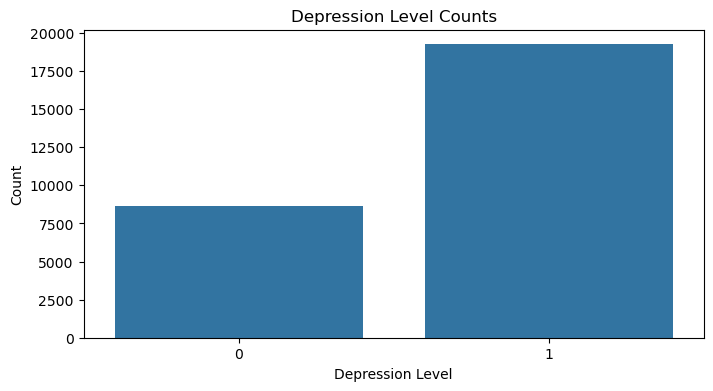

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Depression')
plt.title('Depression Level Counts')
plt.xlabel('Depression Level')
plt.ylabel('Count')
plt.show()

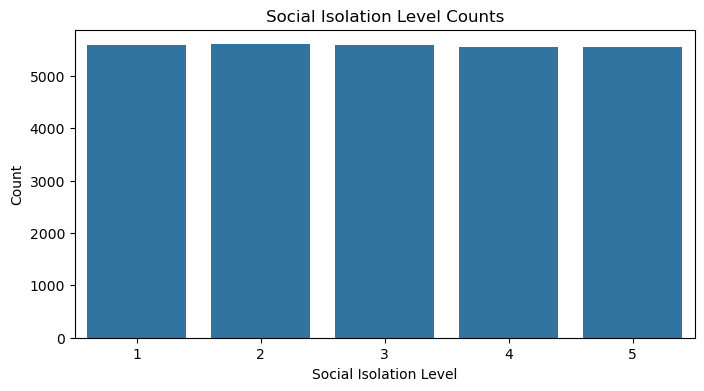

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Social Isolation')
plt.title('Social Isolation Level Counts')
plt.xlabel('Social Isolation Level')
plt.ylabel('Count')
plt.show()

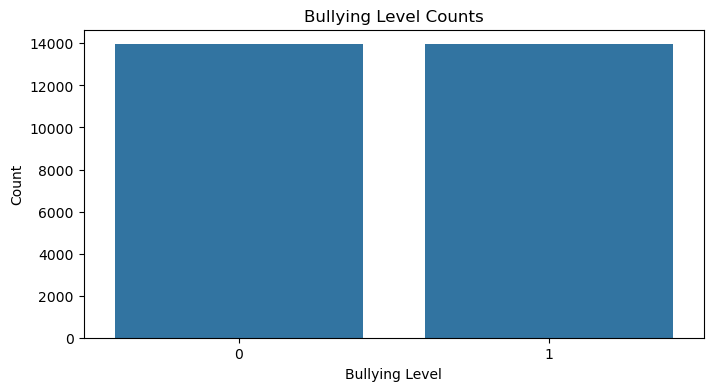

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Bullying')
plt.title('Bullying Level Counts')
plt.xlabel('Bullying Level')
plt.ylabel('Count')
plt.show()

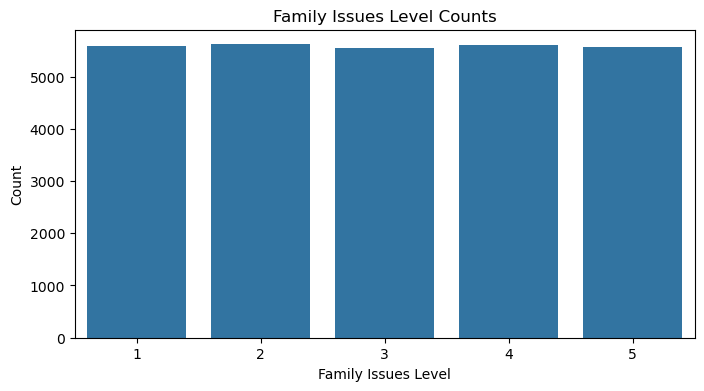

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Family Issues')
plt.title('Family Issues Level Counts')
plt.xlabel('Family Issues Level')
plt.ylabel('Count')
plt.show()

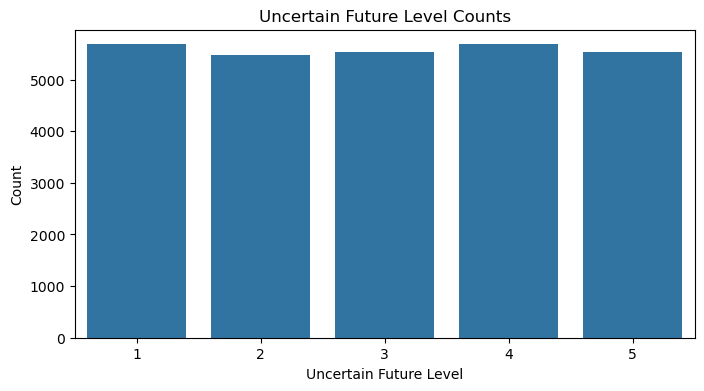

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Uncertain Future')
plt.title('Uncertain Future Level Counts')
plt.xlabel('Uncertain Future Level')
plt.ylabel('Count')
plt.show()

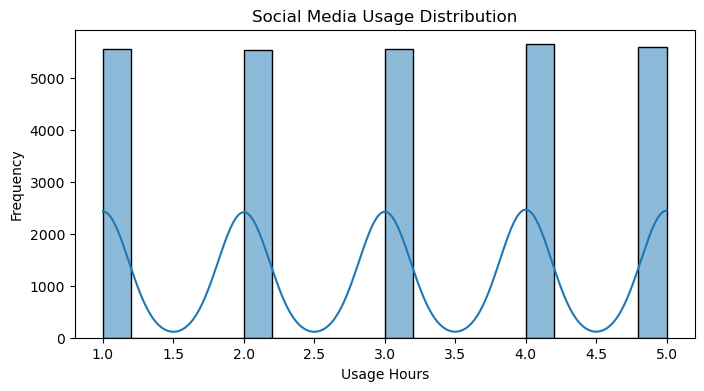

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Social Media Usage', bins=20, kde=True)
plt.title('Social Media Usage Distribution')
plt.xlabel('Usage Hours')
plt.ylabel('Frequency')
plt.show()

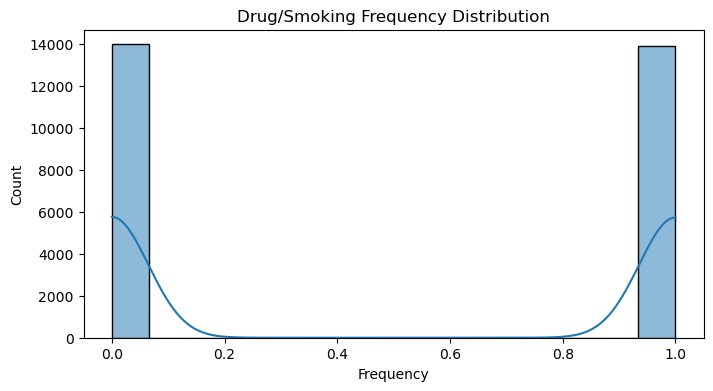

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Drug/Smoking', bins=15, kde=True)
plt.title('Drug/Smoking Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()

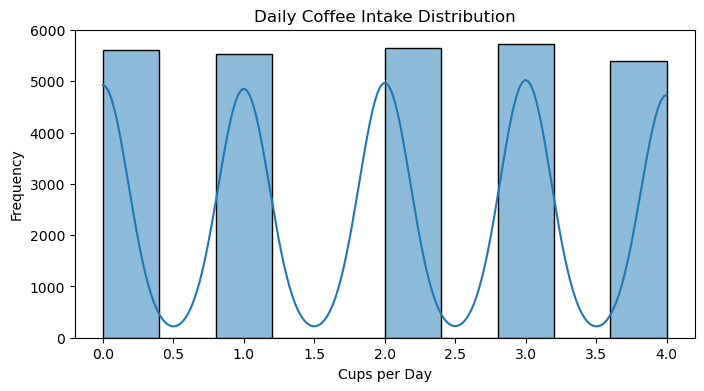

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Daily Coffee Intake', bins=10, kde=True)
plt.title('Daily Coffee Intake Distribution')
plt.xlabel('Cups per Day')
plt.ylabel('Frequency')
plt.show()

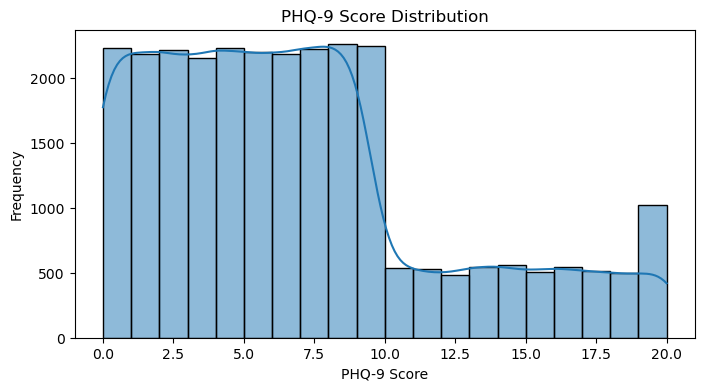

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='PHQ-9', bins=20, kde=True)
plt.title('PHQ-9 Score Distribution')
plt.xlabel('PHQ-9 Score')
plt.ylabel('Frequency')
plt.show()

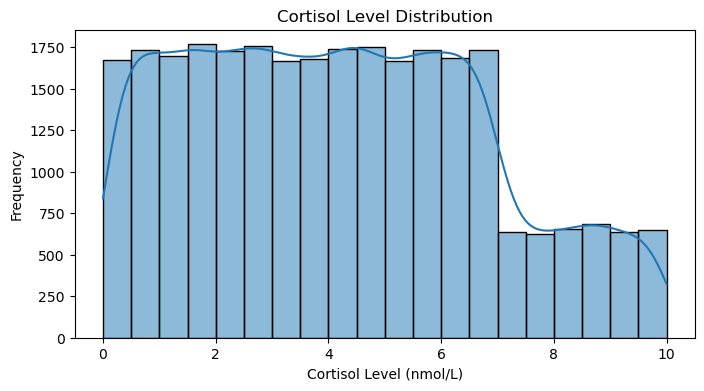

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Cortisol_Level', bins=20, kde=True)
plt.title('Cortisol Level Distribution')
plt.xlabel('Cortisol Level (nmol/L)')
plt.ylabel('Frequency')
plt.show()

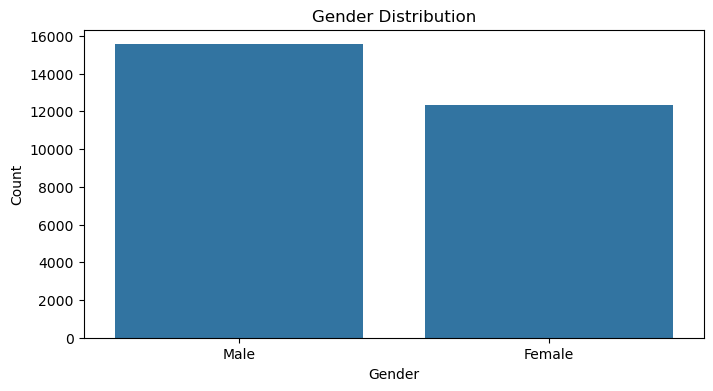

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

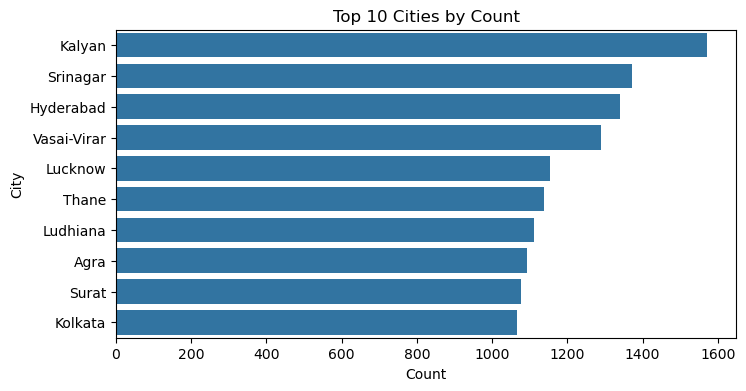

In [ ]:
plt.figure(figsize=(8, 4))
city_counts = df['City'].value_counts().head(10)  # Top 10 cities
sns.barplot(x=city_counts.values, y=city_counts.index)
plt.title('Top 10 Cities by Count')
plt.xlabel('Count')
plt.ylabel('City')
plt.show()

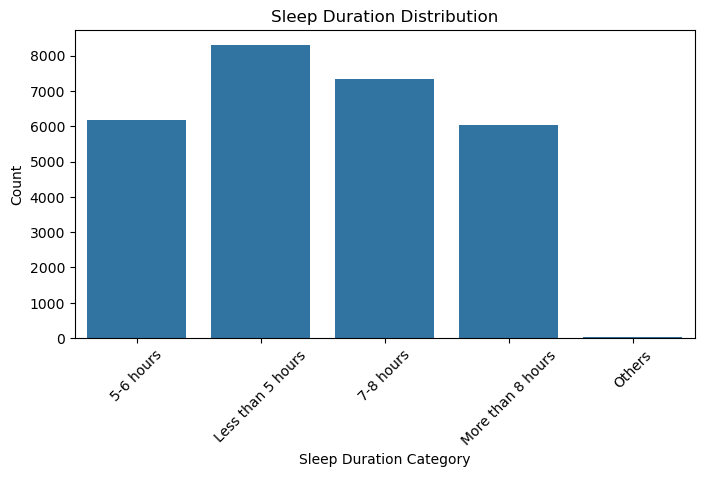

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Sleep Duration')
plt.title('Sleep Duration Distribution')
plt.xlabel('Sleep Duration Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

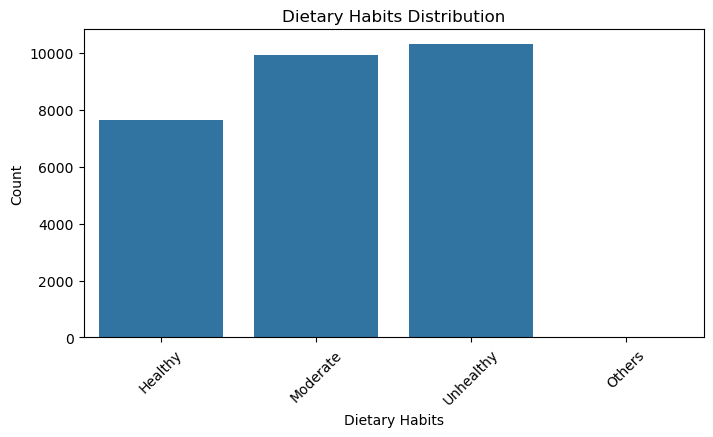

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Dietary Habits')
plt.title('Dietary Habits Distribution')
plt.xlabel('Dietary Habits')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

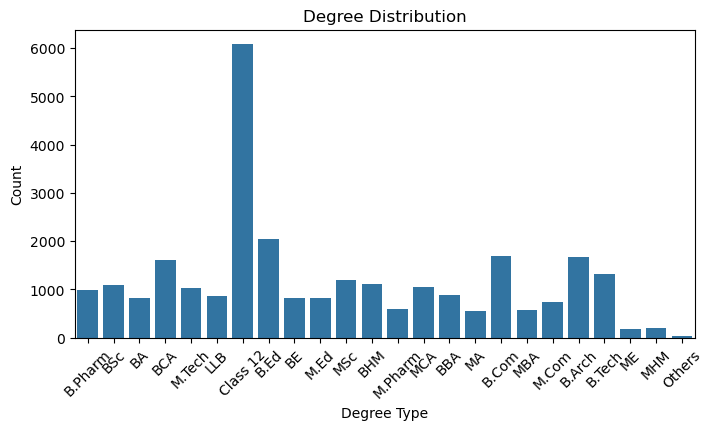

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Degree')
plt.title('Degree Distribution')
plt.xlabel('Degree Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

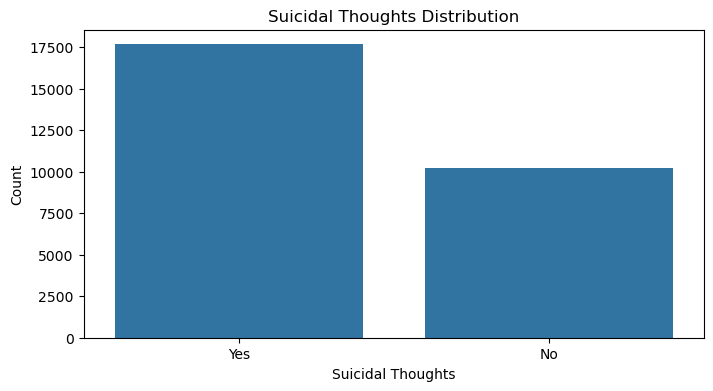

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Have you ever had suicidal thoughts ?')
plt.title('Suicidal Thoughts Distribution')
plt.xlabel('Suicidal Thoughts')
plt.ylabel('Count')
plt.show()

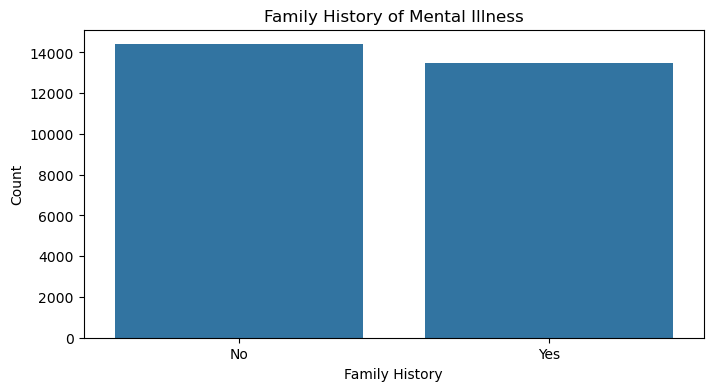

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Family History of Mental Illness')
plt.title('Family History of Mental Illness')
plt.xlabel('Family History')
plt.ylabel('Count')
plt.show()

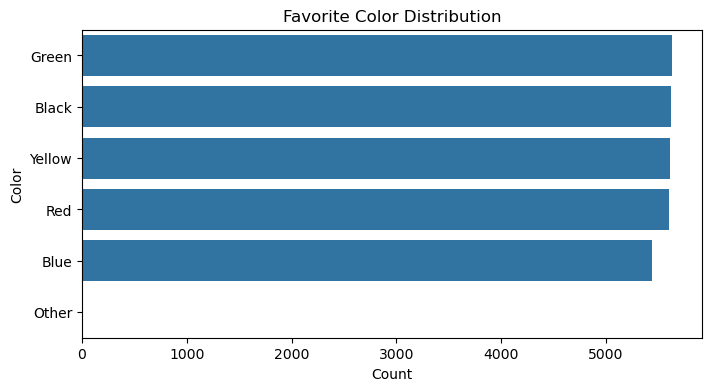

In [ ]:
plt.figure(figsize=(8, 4))
color_counts = df['Favorite Color'].value_counts()
# Group rare colors into "Other"
color_counts = color_counts[color_counts >= 5]
color_counts['Other'] = df['Favorite Color'].value_counts()[df['Favorite Color'].value_counts() < 5].sum()
sns.barplot(x=color_counts.values, y=color_counts.index)
plt.title('Favorite Color Distribution')
plt.xlabel('Count')
plt.ylabel('Color')
plt.show()

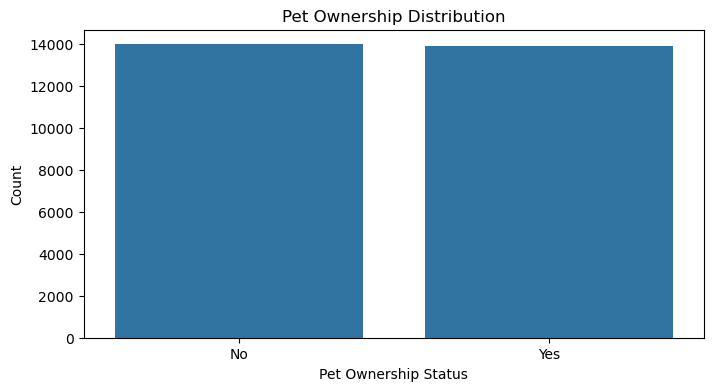

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Pet Ownership')
plt.title('Pet Ownership Distribution')
plt.xlabel('Pet Ownership Status')
plt.ylabel('Count')
plt.show()

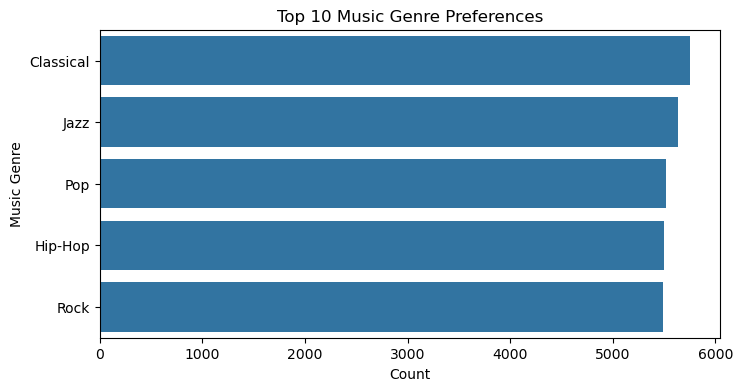

In [ ]:
plt.figure(figsize=(8, 4))
genre_counts = df['Music Genre Preference'].value_counts().head(10)  # Top 10 genres
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Top 10 Music Genre Preferences')
plt.xlabel('Count')
plt.ylabel('Music Genre')
plt.show()

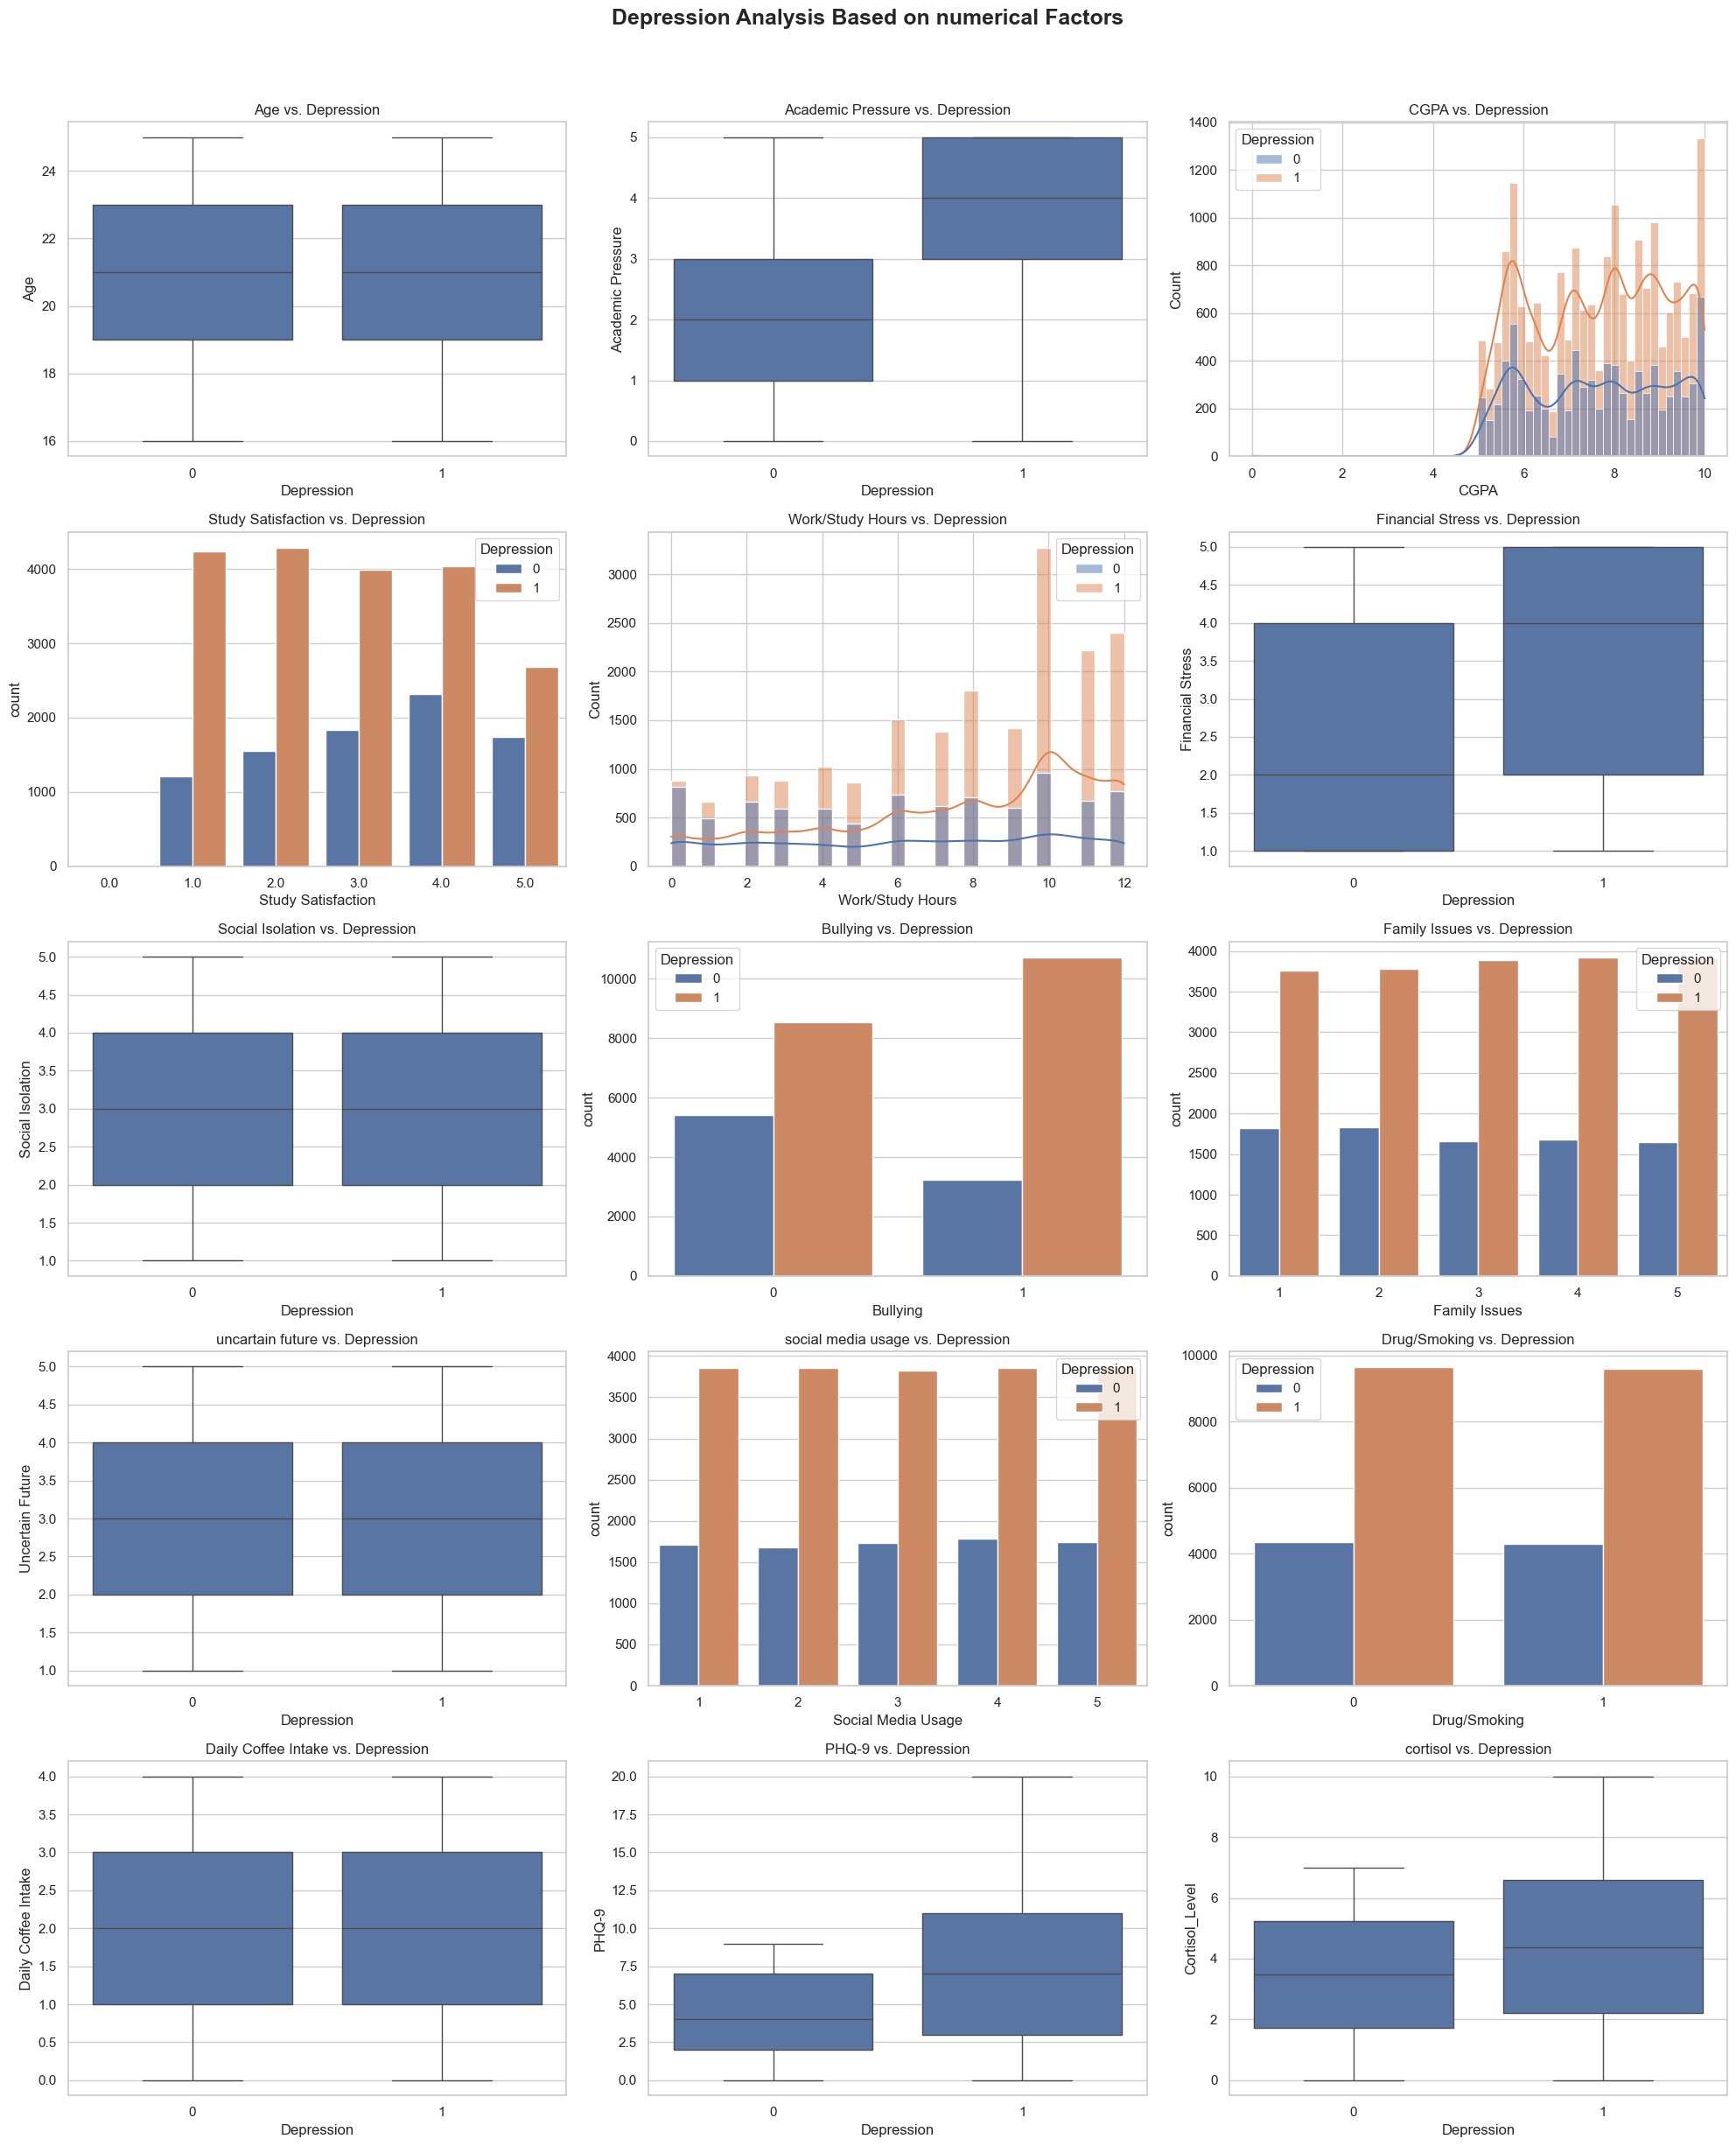

In [ ]:
# Set up the figure size and style
sns.set(style="whitegrid")
fig, axes = plt.subplots(5, 3, figsize=(20, 25))  # 5 rows, 3 columns of subplots
fig.suptitle("Depression Analysis Based on numerical Factors", fontsize=18, fontweight='bold')

# 1. Age vs. Depression (Box Plot)
sns.boxplot(x="Depression", y="Age", data=df, ax=axes[0, 0])
axes[0, 0].set_title("Age vs. Depression")

# 2. Academic Pressure vs. Depression (Box Plot)
sns.boxplot(x="Depression", y="Academic Pressure", data=df, ax=axes[0, 1])
axes[0, 1].set_title("Academic Pressure vs. Depression")

# 3. CGPA vs. Depression (Histogram)
sns.histplot(data=df, x="CGPA", hue="Depression", kde=True, ax=axes[0, 2])
axes[0, 2].set_title("CGPA vs. Depression")

# 4. Study Satisfaction vs. Depression (Bar Chart)
sns.countplot(x="Study Satisfaction", hue="Depression", data=df, ax=axes[1, 0])
axes[1, 0].set_title("Study Satisfaction vs. Depression")

# 5. Work/Study Hours vs. Depression (Histogram)
sns.histplot(data=df, x="Work/Study Hours", hue="Depression", kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Work/Study Hours vs. Depression")

# 6. Financial Stress vs. Depression (Box Plot)
sns.boxplot(x="Depression", y="Financial Stress", data=df, ax=axes[1, 2])
axes[1, 2].set_title("Financial Stress vs. Depression")

# 7. Social Isolation vs. Depression (Box Plot)
sns.boxplot(x="Depression", y="Social Isolation", data=df, ax=axes[2, 0])
axes[2, 0].set_title("Social Isolation vs. Depression")

# 8. Bullying vs. Depression (Bar Plot)
sns.countplot(hue="Depression", x="Bullying", data=df, ax=axes[2, 1])
axes[2, 1].set_title("Bullying vs. Depression")

# 9. family issues vs. Depression (Bar Chart)
sns.countplot(x="Family Issues", hue="Depression", data=df, ax=axes[2, 2])
axes[2, 2].set_title("Family Issues vs. Depression")


# 10. uncartain future vs. Depression (Box Plot)
sns.boxplot(x="Depression", y="Uncertain Future", data=df, ax=axes[3, 0])
axes[3, 0].set_title("uncartain future vs. Depression")

# 11. social media usage vs. Depression (Bar Chart)
sns.countplot(hue="Depression", x="Social Media Usage", data=df, ax=axes[3, 1])
axes[3, 1].set_title("social media usage vs. Depression")

# 12. Drug/Smoking vs. Depression (Bar Chart)
sns.countplot(x="Drug/Smoking", hue="Depression", data=df, ax=axes[3, 2])
axes[3, 2].set_title("Drug/Smoking vs. Depression")

# 13. daily coffee intake vs. Depression (Box Plot)
sns.boxplot(x="Depression", y="Daily Coffee Intake", data=df, ax=axes[4, 0])
axes[4, 0].set_title("Daily Coffee Intake vs. Depression")

# 14. PHQ-9 vs. Depression (Box Plot)
sns.boxplot(x="Depression", y="PHQ-9", data=df, ax=axes[4, 1])
axes[4, 1].set_title("PHQ-9 vs. Depression")

# 15. cortisol vs. Depression (Box Plot)
sns.boxplot(x="Depression", y="Cortisol_Level", data=df, ax=axes[4, 2])
axes[4, 2].set_title("cortisol vs. Depression")

# Adjust layout for readability
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


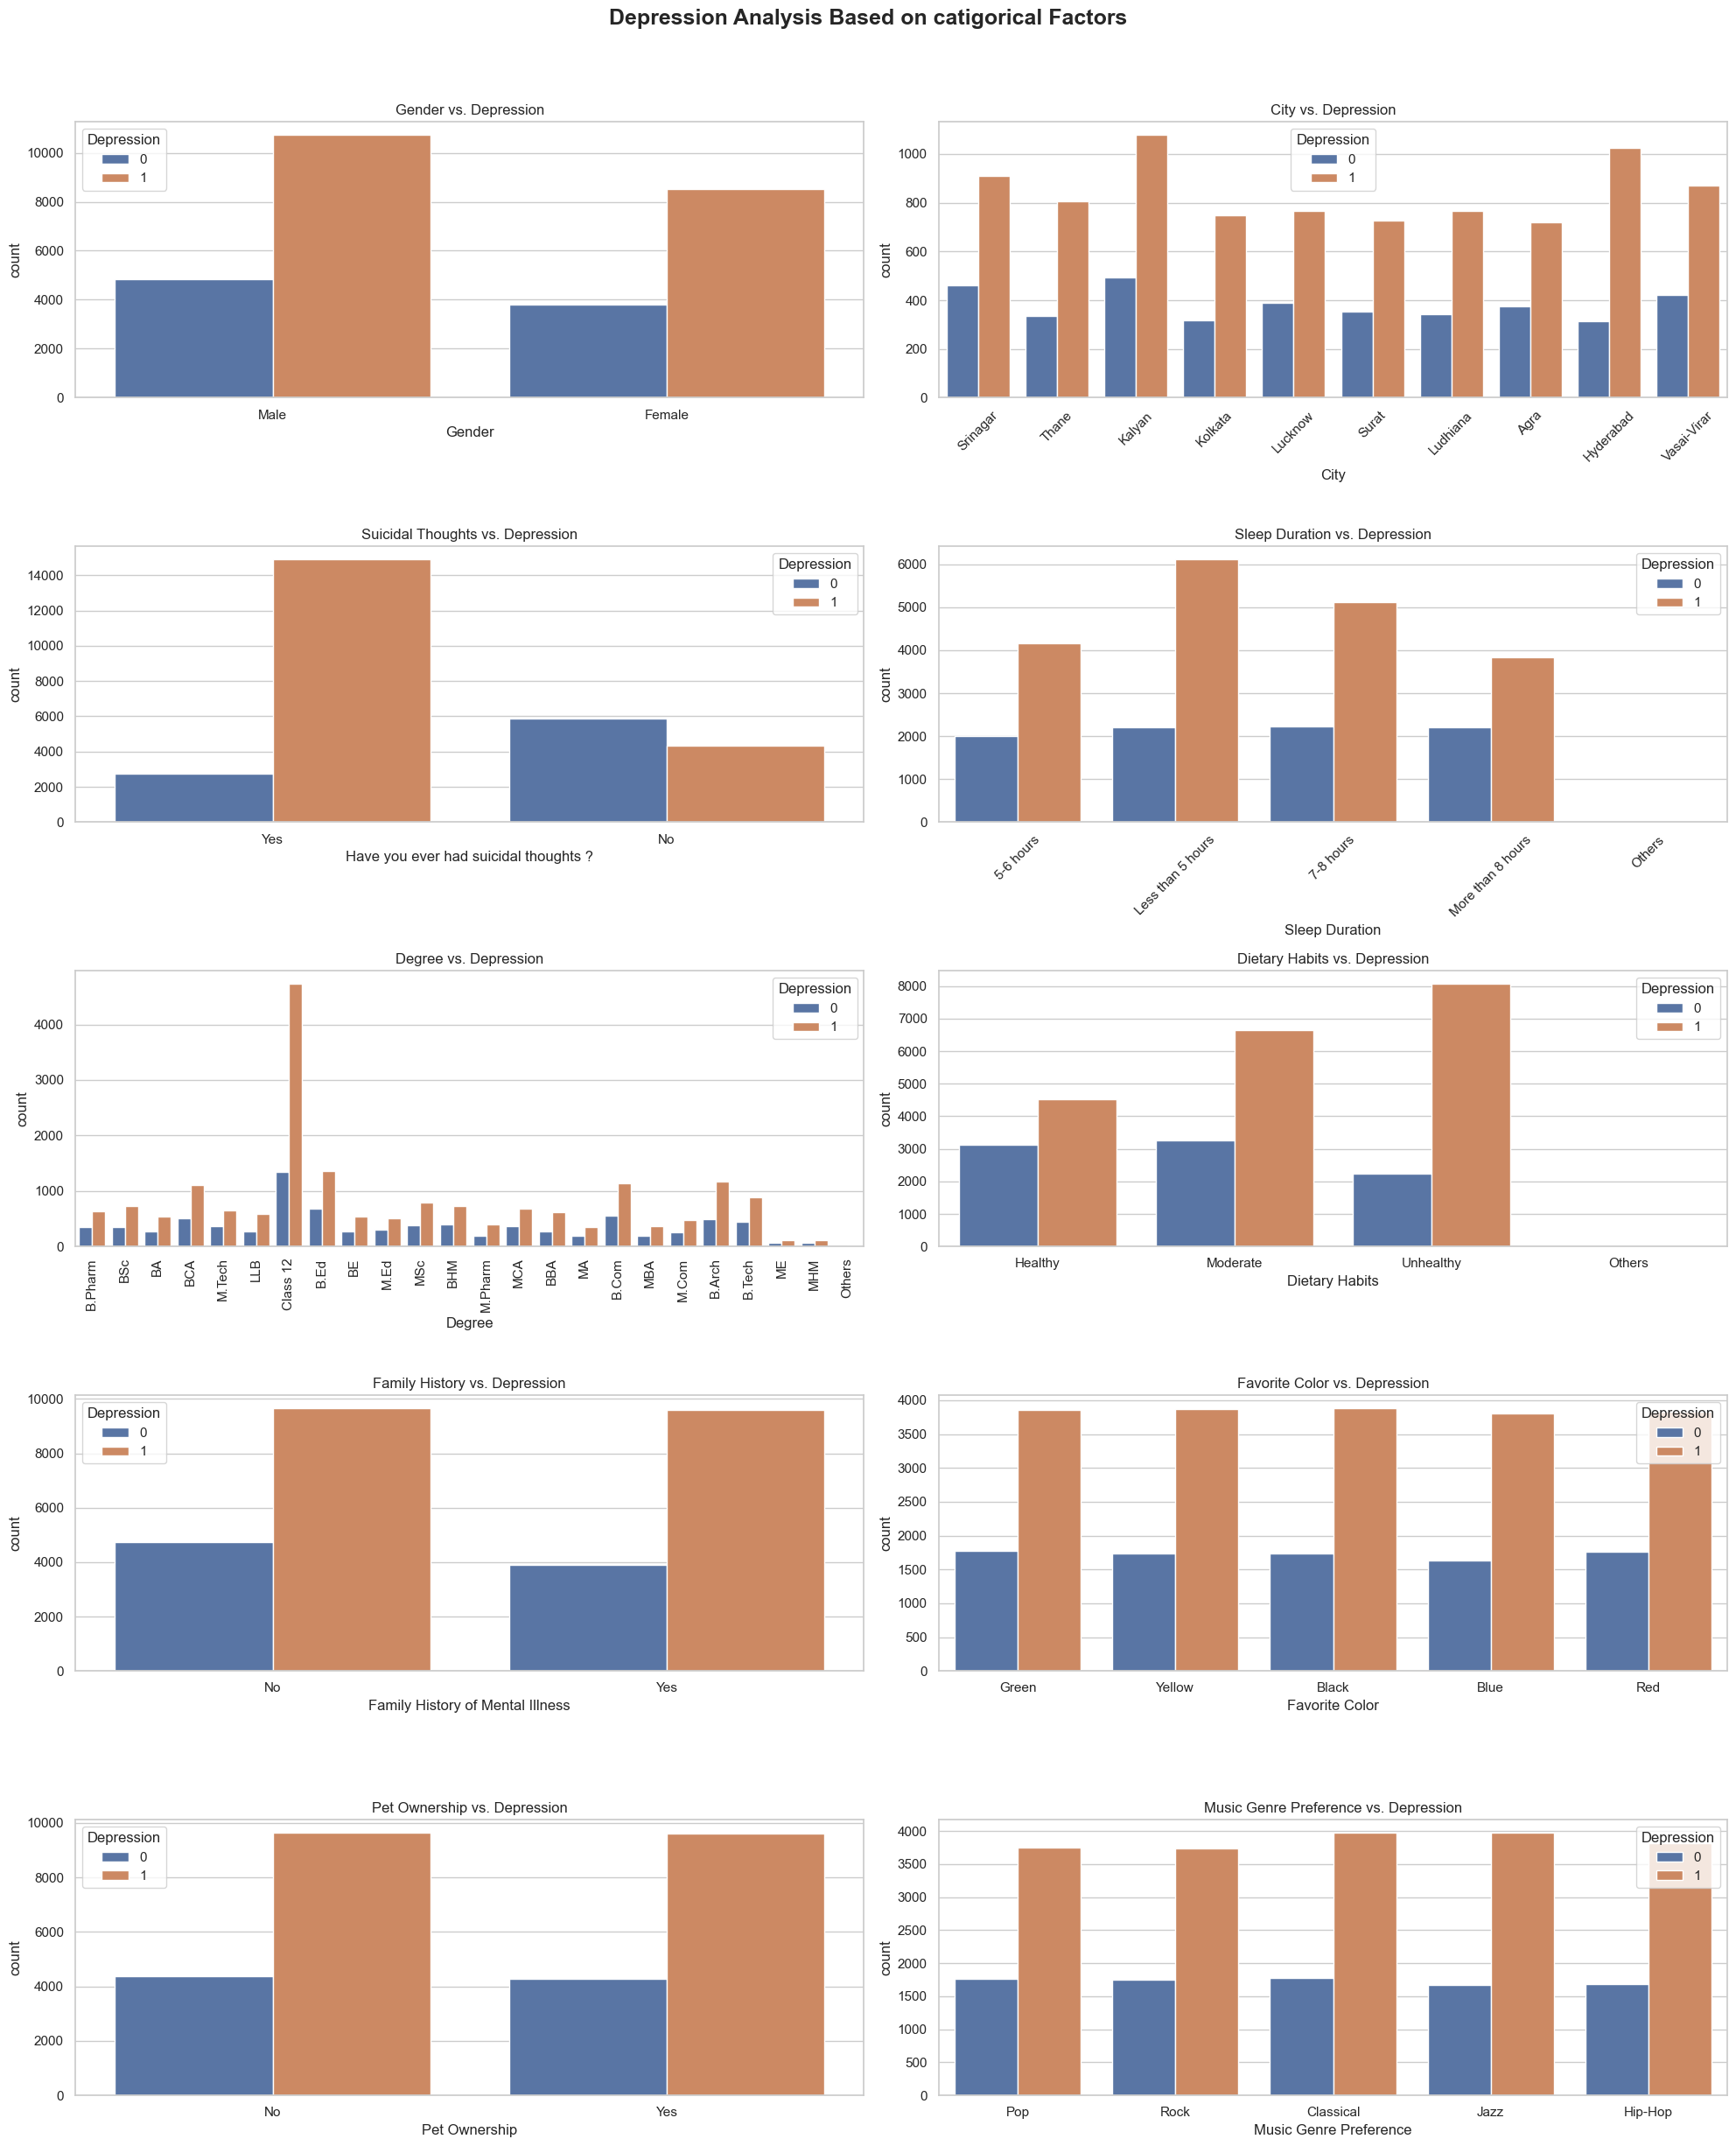

In [ ]:
# Set up the figure size and style
sns.set(style="whitegrid")
fig, axes = plt.subplots(5, 2, figsize=(20, 25))  # 5 rows, 3 columns of subplots
fig.suptitle("Depression Analysis Based on catigorical Factors", fontsize=18, fontweight='bold')

# 1. Gender vs. Depression (Bar Chart)
sns.countplot(x="Gender", hue="Depression", data=df, ax=axes[0, 0])
axes[0, 0].set_title("Gender vs. Depression")

# 2. City vs. Depression (Top 10 Cities - Bar Chart)
top_cities = df["City"].value_counts().head(10).index
sns.countplot(x="City", hue="Depression", data=df[df["City"].isin(top_cities)], ax=axes[0, 1])
axes[0, 1].set_title("City vs. Depression")
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Suicidal Thoughts vs. Depression (Stacked Bar Chart)
sns.countplot(x="Have you ever had suicidal thoughts ?", hue="Depression", data=df, ax=axes[1, 0])
axes[1, 0].set_title("Suicidal Thoughts vs. Depression")

# 4. Sleep Duration vs. Depression (Stacked Bar Chart)
sns.countplot(x="Sleep Duration", hue="Depression", data=df, ax=axes[1, 1])
axes[1, 1].set_title("Sleep Duration vs. Depression")
axes[1, 1].tick_params(axis='x', rotation=45)

# 5. Degree vs. Depression (Bar Chart)
sns.countplot(x="Degree", hue="Depression", data=df, ax=axes[2, 0])
axes[2, 0].set_title("Degree vs. Depression")
axes[2, 0].tick_params(axis='x', rotation=90)

# 6. Dietary Habits vs. Depression (Bar Chart)
sns.countplot(x="Dietary Habits", hue="Depression", data=df, ax=axes[2, 1])
axes[2, 1].set_title("Dietary Habits vs. Depression")

# 7. Family History of Mental Illness vs. Depression (Bar Chart)
sns.countplot(x="Family History of Mental Illness", hue="Depression", data=df, ax=axes[3, 0])
axes[3, 0].set_title("Family History vs. Depression")

# 8. Favourite color vs. Depression (Bar Chart)
sns.countplot(x="Favorite Color", hue="Depression", data=df, ax=axes[3, 1])
axes[3, 1].set_title("Favorite Color vs. Depression")

# 9. Pet Ownership vs. Depression (Bar Chart)
sns.countplot(x="Pet Ownership", hue="Depression", data=df, ax=axes[4, 0])
axes[4, 0].set_title("Pet Ownership vs. Depression")

# 10. Music Genre Preference vs. Depression (Bar Chart)
sns.countplot(x="Music Genre Preference", hue="Depression", data=df, ax=axes[4, 1])
axes[4, 1].set_title("Music Genre Preference vs. Depression")

# Adjust layout for readability
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
df_standardized.to_csv('standardized_data.csv', index=False)
df_normalized.to_csv('normalized_data.csv', index=False)

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# 1. Distribution of Depression by Gender
fig1 = px.histogram(df, x='Gender', color='Depression', barmode='group',
                    title='Distribution of Depression by Gender',width=1000, height=600)

# 2. Correlation between CGPA and Academic Pressure
fig2 = px.scatter(df, x='Academic Pressure', y='CGPA', color='Depression',
                  title='CGPA vs Academic Pressure by Depression Status',width=1000, height=600)

# 3. Box plot of Cortisol Level by Depression Status
fig3 = px.box(df, x='Depression', y='Cortisol_Level', color='Depression',
              title='Cortisol Level by Depression Status',width=1000, height=600)

# 4. Sleep Duration vs Depression
fig4 = px.histogram(df, x='Sleep Duration', color='Depression', barmode='group',
                    title='Sleep Duration vs Depression',width=1000, height=600)

# 5. Correlation Heatmap (only numerical columns)
numeric_df = df.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()
fig5 = px.imshow(corr_matrix, text_auto=True, aspect="auto",
                 title='Correlation Heatmap of Numerical Features',width=1200, height=800)

# 6. Top Cities with Highest Depression Cases
top_cities = df[df['Depression'] == 1]['City'].value_counts().nlargest(10)
fig6 = px.bar(x=top_cities.values, y=top_cities.index, orientation='h',
              title='Top Cities with Highest Depression Cases',
              labels={'x': 'Number of Depression Cases', 'y': 'City'},width=1000, height=600)

# 7. Music Genre Preference among Depressed vs Non-Depressed
fig7 = px.histogram(df, x='Music Genre Preference', color='Depression', barmode='group',
                    title='Music Genre Preference vs Depression',width=1000, height=600)

# 8. Effect of Social Media Usage on Depression
social_media_depression = df.groupby('Social Media Usage')['Depression'].mean().reset_index()
fig8 = px.line(social_media_depression, x='Social Media Usage', y='Depression',
               title='Effect of Social Media Usage on Depression',width=1000, height=600)

# Return figures to user for interactive exploration
fig1.show()
fig2.show()
fig3.show()
fig4.show()
fig5.show()
fig6.show()
fig7.show()
fig8.show()


---------

# **Milestone 3**

#### **Part 1:** Arwa Hamdy

In [1]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report ,roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score  
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier
from scipy.stats import chi2_contingency, f_oneway
from sklearn.model_selection import train_test_split, GridSearchCV
import lightgbm as lgb
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.combine import SMOTEENN
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier


In [2]:
#read the encoded dataset depression
df=pd.read_csv(r"C:\Users\arwah\OneDrive\Desktop\HealthCare Project\datasets\cleaned_data.csv")
df.head(10)

Gender   Age  City  Academic Pressure  CGPA  Study Satisfaction  \
0       1  23.0    51                5.0  8.97                 2.0   
1       0  24.0     3                2.0  5.90                 5.0   
2       1  17.0    44                3.0  7.03                 5.0   
3       0  17.0    49                3.0  5.59                 2.0   
4       0  25.0    16                4.0  8.13                 3.0   
5       1  25.0    39                2.0  5.70                 3.0   
6       1  24.0    46                3.0  9.54                 4.0   
7       0  24.0     6                2.0  8.04                 4.0   
8       1  19.0    33                3.0  9.79                 1.0   
9       1  20.0    37                2.0  8.38                 3.0   

   Sleep Duration  Dietary Habits  Degree  \
0               0               0       3   
1               0               1      10   
2               2               0       5   
3               1               1       7   
4               0               1      16   
5               2               0      12   
6               1               0      10   
7               2               3      11   
8               1               1       2   
9               2               1      12   

   Have you ever had suicidal thoughts ?  ...  Uncertain Future  \
0                                      1  ...                 1   
1                                      0  ...                 2   
2                                      0  ...                 1   
3                                      1  ...                 2   
4                                      1  ...                 1   
5                                      0  ...                 3   
6                                      0  ...                 5   
7                                      0  ...                 5   
8                                      1  ...                 2   
9                                      1  ...                 4   

   Social Media Usage  Drug/Smoking  Favorite Color  Pet Ownership  \
0                   2             1               2              0   
1                   4             1               4              0   
2                   5             0               4              1   
3                   1             1               0              1   
4                   1             1               1              0   
5                   5             0               4              1   
6                   3             1               1              0   
7                   1             1               4              1   
8                   1             0               2              0   
9                   5             0               4              0   

   Daily Coffee Intake  Music Genre Preference  PHQ-9  Cortisol_Level  \
0                    1                       3     10        6.655000   
1                    1                       4      4        5.123958   
2                    2                       3      4        4.190609   
3                    4                       0      9        7.467984   
4                    4                       3      9        0.406585   
5                    4                       2      7        4.207805   
6                    0                       0      4        4.956508   
7                    2                       2      8        9.909730   
8                    1                       3     19        1.486374   
9                    2                       4      1        7.550214   

   Depression  
0           1  
1           0  
2           0  
3           1  
4           0  
5           1  
6           0  
7           1  
8           1  
9           1  

[10 rows x 26 columns]

In [3]:
df["Depression"].value_counts(normalize=True) * 100


Depression
1    69.004947
0    30.995053
Name: proportion, dtype: float64

In [4]:
X= df.drop(['Depression'], axis = 1)
y= df['Depression']


In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

#### CATBOOSTCLASSIFIER:

Complete Catboost Training Accuracy: 0.9267206063088897
Complete catboost Test Accuracy: 0.8507765830346475
Confusion Matrix:
 [[2016  595]
 [ 654 5105]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.77      0.76      2611
           1       0.90      0.89      0.89      5759

    accuracy                           0.85      8370
   macro avg       0.83      0.83      0.83      8370
weighted avg       0.85      0.85      0.85      8370



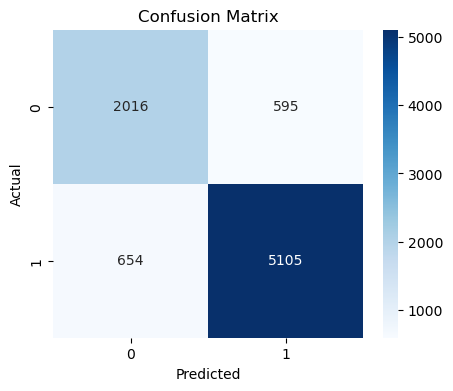

In [6]:
#first model
cat = CatBoostClassifier(verbose=0, random_state=42)


cat.fit(X_train, y_train)

y_pred = cat.predict(X_test)

# accuracy
Tr_score = cat.score(X_train, y_train)
Tst_score = cat.score(X_test, y_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Complete Catboost Training Accuracy:", Tr_score)
print("Complete catboost Test Accuracy:", Tst_score)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [7]:
#smote data
X= df.drop(['Depression'], axis = 1)
y= df['Depression']

smote_enn = SMOTEENN(random_state = 42, n_jobs = -1)
X_smote, y_smote = smote_enn.fit_resample(X,y)

print(f'Resampled dataset shape: {y_smote.value_counts(normalize = True)}')

data_2 = pd.concat([X_smote, y_smote],axis=1)

c:\Users\arwah\anaconda3\Lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Resampled dataset shape: Depression
0    0.643429
1    0.356571
Name: proportion, dtype: float64


In [8]:
X_train,X_test,y_train,y_test=train_test_split(X_smote,y_smote,test_size=0.30,random_state=1)

*Train model on the training data and evaluate performance on the test set.* 

In [9]:
#first model
cat = CatBoostClassifier(verbose=0, random_state=42)


cat.fit(X_train, y_train)

y_pred = cat.predict(X_test)

# accuracy
Tr_score = cat.score(X_train, y_train)
Tst_score = cat.score(X_test, y_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Complete Catboost Training Accuracy:", Tr_score)
print("Complete catboost Test Accuracy:", Tst_score)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Complete Catboost Training Accuracy: 0.9981514643868061
Complete catboost Test Accuracy: 0.9735813451947701
Confusion Matrix:
 [[4712   83]
 [ 113 2511]]


KeyboardInterrupt: 

In [ ]:
#Check overfitting
cv_scores = cross_val_score(cat, X_smote, y_smote, cv=5, scoring='accuracy')

print("Cross Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))


Cross Validation Scores: [0.95066721 0.95268904 0.97978164 0.98483623 0.98443186]
Mean CV Accuracy: 0.9704811969268097
Standard Deviation: 0.015468299413336668


c:\Users\arwah\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\arwah\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\arwah\anaconda3\Lib\site-packages\catboost\core.py", line 5245, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, baseline, use_best_model,
  File "c:\Users\arwah\anaconda3\Lib\site-packages\catboost\core.py", line 

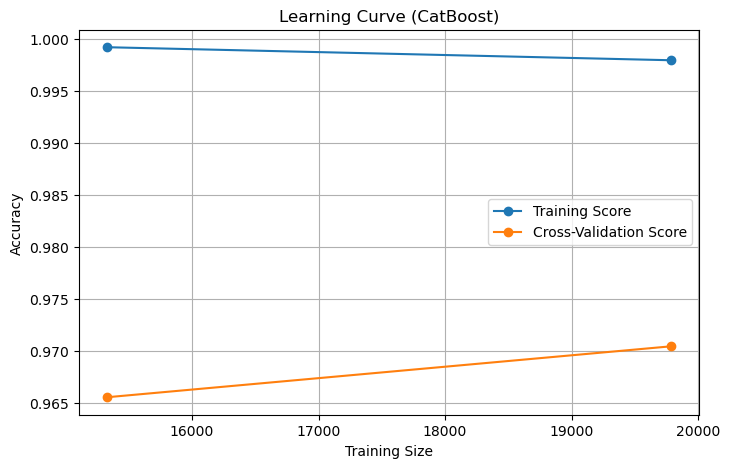

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    cat, X_smote, y_smote, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5), random_state=42
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)


plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, 'o-', label='Training Score')
plt.plot(train_sizes, test_mean, 'o-', label='Cross-Validation Score')
plt.title('Learning Curve (CatBoost)')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


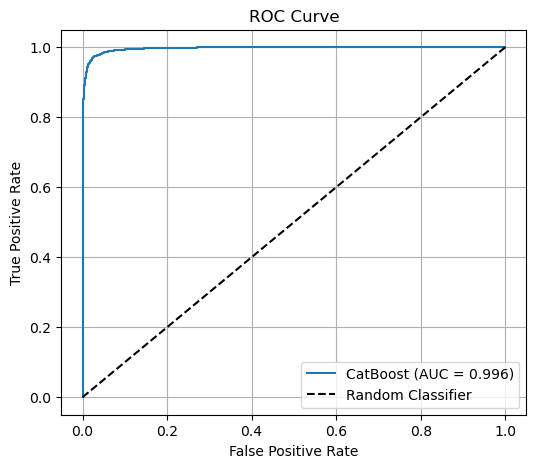

In [ ]:
y_proba = cat.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)


plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'CatBoost (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


*feature_importance*

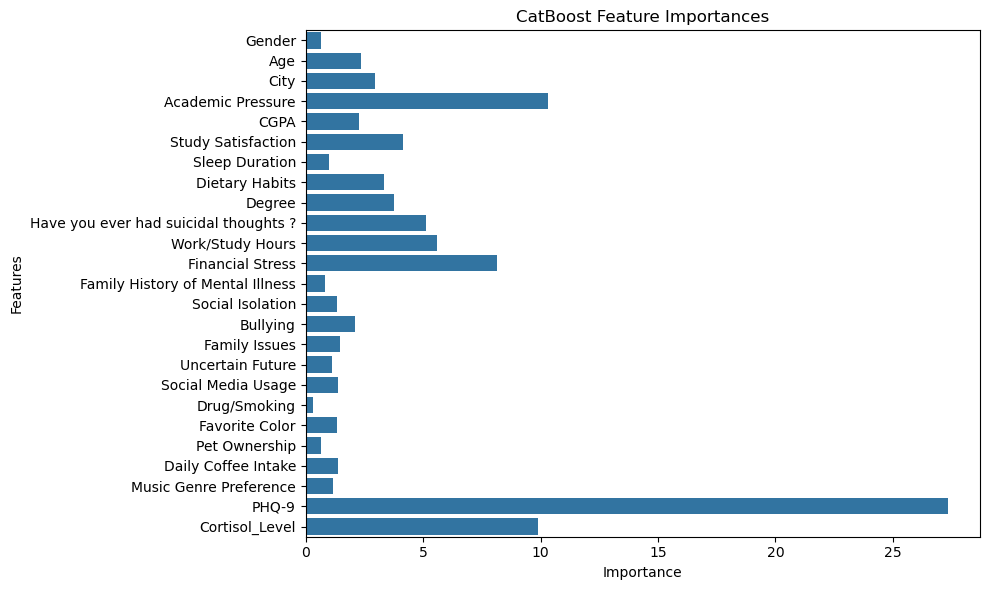

In [ ]:
importances = cat.get_feature_importance()
features = X_train.columns


plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('CatBoost Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


In [ ]:
cat = CatBoostClassifier(verbose=0, random_state=42)

param_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'iterations': [100, 200, 300]
}

# Random Search
random_search = RandomizedSearchCV(
    estimator=cat,
    param_distributions=param_dist,
    n_iter=10,  
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
    random_state=42
)


random_search.fit(X_smote, y_smote)

print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'learning_rate': 0.05, 'l2_leaf_reg': 5, 'iterations': 100, 'depth': 4}
Best Accuracy: 0.963122783726689


*Random Search to optimize model performance.* 

Complete Catboost Training Accuracy: 0.9717520651608804
Complete catboost Test Accuracy: 0.9714247203127107
Confusion Matrix:
 [[4727   68]
 [ 144 2480]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      4795
           1       0.97      0.95      0.96      2624

    accuracy                           0.97      7419
   macro avg       0.97      0.97      0.97      7419
weighted avg       0.97      0.97      0.97      7419



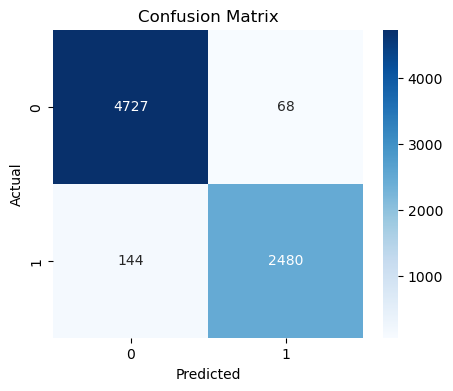

In [ ]:
cat = CatBoostClassifier(
    learning_rate=0.05,
    depth=4,
    l2_leaf_reg=5,
    iterations=100,
    verbose=0,  
    random_state=42
)


cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)


# accuracy
Tr_score = cat.score(X_train, y_train)
Tst_score = cat.score(X_test, y_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Complete Catboost Training Accuracy:", Tr_score)
print("Complete catboost Test Accuracy:", Tst_score)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



#### XGBClassifier:

In [ ]:
#Second model
xgb = XGBClassifier(random_state=42) 
xgb.fit(X_train, y_train)

train_accuracy = accuracy_score(y_train, xgb.predict(X_train))
test_accuracy = accuracy_score(y_test, xgb.predict(X_test))

# accuracy
y_pred_xgb = xgb.predict(X_test)

print("XGB Training Accuracy:", train_accuracy)
print("XGB Test Accuracy:", test_accuracy)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGB Training Accuracy: 0.9999422332620876
XGB Test Accuracy: 0.9734465561396415
XGBoost Accuracy: 0.9734465561396415
Confusion Matrix:
 [[4708   87]
 [ 110 2514]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      4795
           1       0.97      0.96      0.96      2624

    accuracy                           0.97      7419
   macro avg       0.97      0.97      0.97      7419
weighted avg       0.97      0.97      0.97      7419



XGB Training Accuracy: 0.9826122118883946
XGB Test Accuracy: 0.973176978029384
XGBoost Accuracy: 0.973176978029384
Confusion Matrix:
 [[4692  103]
 [  96 2528]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      4795
           1       0.96      0.96      0.96      2624

    accuracy                           0.97      7419
   macro avg       0.97      0.97      0.97      7419
weighted avg       0.97      0.97      0.97      7419



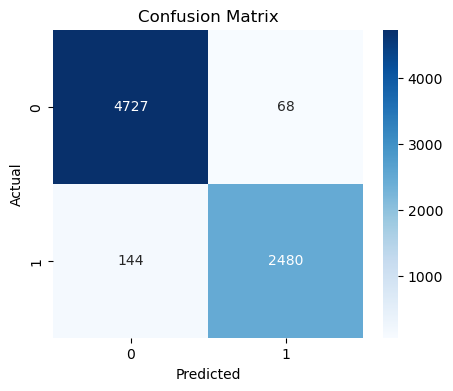

In [ ]:
xgb = XGBClassifier(scale_pos_weight=1.5, 
                       max_depth=4,  
                       learning_rate=0.05,  
                       n_estimators=300,  
                       subsample=0.8,  
                       colsample_bytree=0.8,
                       gamma=2,
                       random_state=42) 

xgb.fit(X_train, y_train)

train_accuracy = accuracy_score(y_train, xgb.predict(X_train))
test_accuracy = accuracy_score(y_test, xgb.predict(X_test))

# accuracy
y_pred_xgb = xgb.predict(X_test)

print("XGB Training Accuracy:", train_accuracy)
print("XGB Test Accuracy:", test_accuracy)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
#Check overfitting
cv_scores = cross_val_score(xgb, X_smote, y_smote, cv=5, scoring='accuracy')

print("Cross Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))

Cross Validation Scores: [0.94035584 0.94985847 0.9828144  0.98544278 0.98584715]
Mean CV Accuracy: 0.9688637282652648
Standard Deviation: 0.01965615439543187


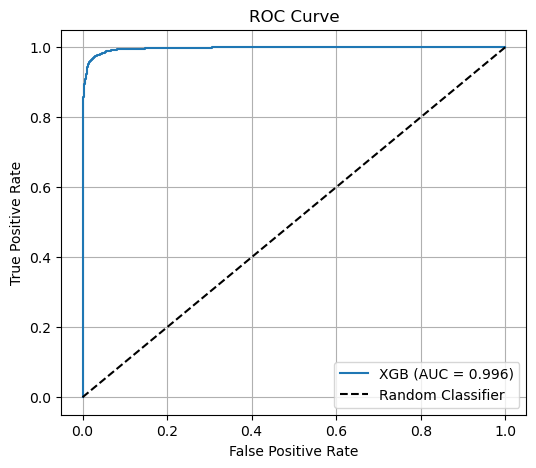

In [ ]:
y_proba = xgb.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'XGB (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


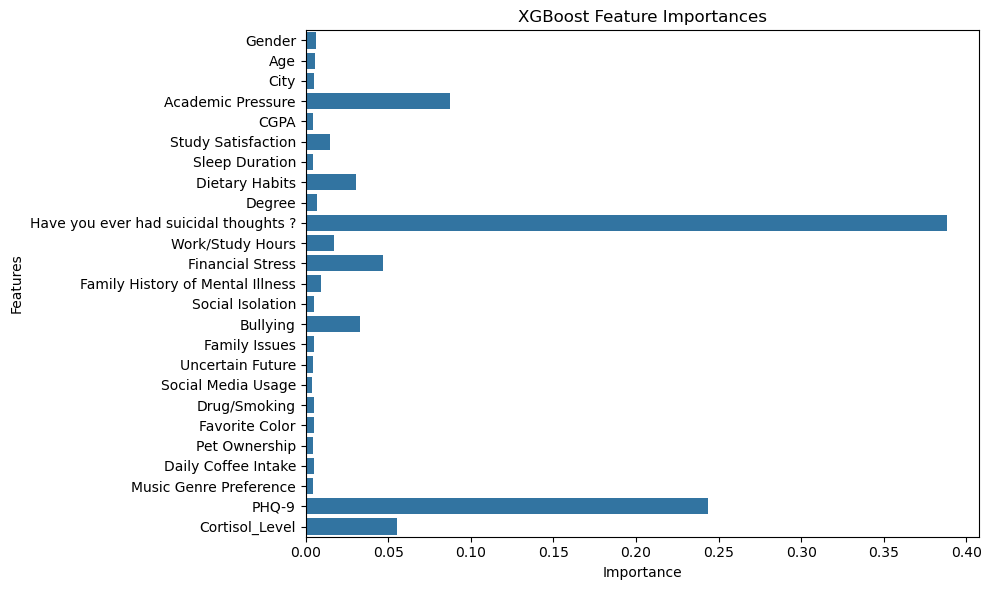

In [ ]:
importances = xgb.feature_importances_
features = X_train.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('XGBoost Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()



#### Artificial Neural Networks (ANN):

ANN Training Accuracy: 1.0
ANN Test Accuracy: 0.9583501819652245
Confusion Matrix:
 [[4655  140]
 [ 169 2455]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      4795
           1       0.95      0.94      0.94      2624

    accuracy                           0.96      7419
   macro avg       0.96      0.95      0.95      7419
weighted avg       0.96      0.96      0.96      7419



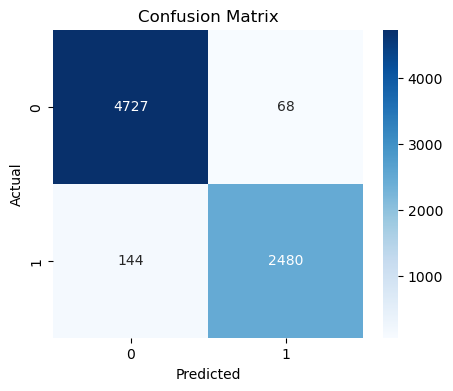

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


ann_model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=500, random_state=42)


ann_model.fit(X_train, y_train)


y_pred = ann_model.predict(X_test)


train_accuracy = accuracy_score(y_train, ann_model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)


print("ANN Training Accuracy:", train_accuracy)
print("ANN Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


ANN Training Accuracy: 0.9755646698630929
ANN Test Accuracy: 0.9637417441703734
Confusion Matrix:
 [[4687  108]
 [ 161 2463]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      4795
           1       0.96      0.94      0.95      2624

    accuracy                           0.96      7419
   macro avg       0.96      0.96      0.96      7419
weighted avg       0.96      0.96      0.96      7419



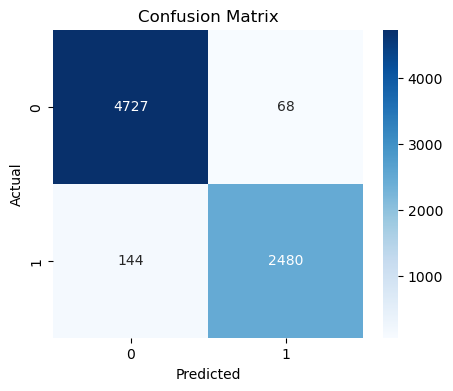

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


ann_model = MLPClassifier(hidden_layer_sizes=(32, 16), 
activation='relu', 
max_iter=300, 
alpha=0.05, 
random_state=42,
early_stopping=True,  
validation_fraction=0.1,  
n_iter_no_change=10 )

ann_model.fit(X_train, y_train)


y_pred = ann_model.predict(X_test)


train_accuracy = accuracy_score(y_train, ann_model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)


print("ANN Training Accuracy:", train_accuracy)
print("ANN Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
#Check overfitting
cv_scores = cross_val_score(ann_model, X_smote, y_smote, cv=5, scoring='accuracy')

print("Cross Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))

Cross Validation Scores: [0.94439951 0.94096239 0.96825718 0.9617873  0.9741205 ]
Mean CV Accuracy: 0.9579053780832997
Standard Deviation: 0.013073885229566115


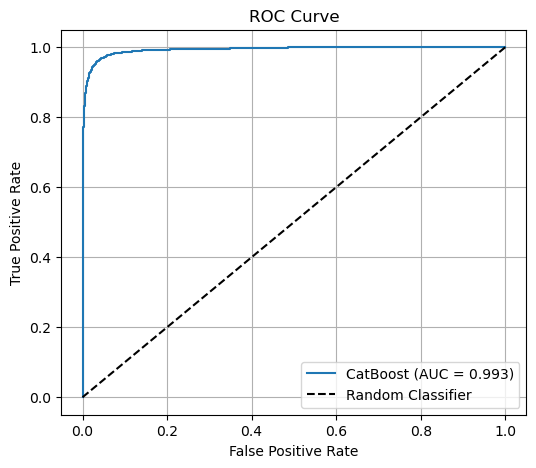

In [ ]:
y_proba = ann_model.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)


plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'CatBoost (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


 Model Performance:
   Model  Accuracy  Precision    Recall  F1 Score
0   CAT  0.971425   0.973312  0.945122  0.959010
1   XGB  0.973177   0.960851  0.963415  0.962131
2   ANN  0.963742   0.957993  0.938643  0.948219

 Best Model Based on F1 Score: XGB (F1 Score = 0.9621)


<Figure size 1000x600 with 0 Axes>

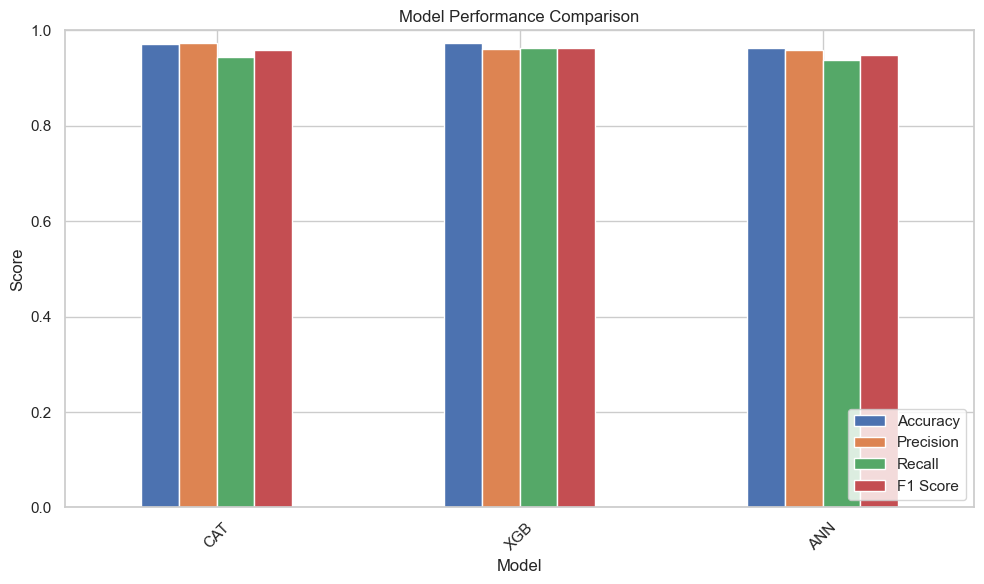

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define models
models = {
    "CAT": cat,
    "XGB": xgb,
    "ANN": ann_model
}

# Initialize list to store results
results = []

# For best model selection
best_model = None
best_model_name = ""
best_f1 = 0

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

    if f1 > best_f1:
        best_f1 = f1
        best_model = model
        best_model_name = name

# Create DataFrame for results
results_df = pd.DataFrame(results)
print(" Model Performance:\n", results_df)

# Print best model
print(f"\n Best Model Based on F1 Score: {best_model_name} (F1 Score = {best_f1:.4f})")

# Plotting
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
results_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1 Score"]].plot(kind="bar", figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()



#### **BEST MODEL >>> XGB CLASSIFIER**

#### **Part 2:**
#### by: Islam Mohamed

In [ ]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report ,roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier
from scipy.stats import chi2_contingency, f_oneway
from sklearn.model_selection import train_test_split, GridSearchCV
import lightgbm as lgb
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTEENN
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [ ]:
df_encoded = pd.read_csv('cleaned_data.csv')
df_normalized = pd.read_csv('normalized_data.csv')
df_standardized = pd.read_csv('standardized_data.csv')

In [ ]:
df_standardized.head()

Gender       Age      City  Academic Pressure      CGPA  \
0  0.891373  0.740244  1.510523           1.345456  0.893354   
1 -1.121865  1.116908 -1.424206          -0.826195 -1.194113   
2  0.891373 -1.519737  1.082541          -0.102311 -0.425762   
3 -1.121865 -1.519737  1.388242          -0.102311 -1.404899   
4 -1.121865  1.493571 -0.629384           0.621573  0.322191   

   Study Satisfaction  Sleep Duration  Dietary Habits    Degree  \
0           -0.693539       -1.421814       -1.182432 -1.042063   
1            1.510565       -1.421814       -0.375754  0.116922   
2            1.510565        0.459507       -1.182432 -0.710924   
3           -0.693539       -0.481154       -0.375754 -0.379786   
4            0.041162       -1.421814       -0.375754  1.110337   

   Have you ever had suicidal thoughts ?  ...  Uncertain Future  \
0                               0.761634  ...         -1.409488   
1                              -1.312967  ...         -0.703681   
2                              -1.312967  ...         -1.409488   
3                               0.761634  ...         -0.703681   
4                               0.761634  ...         -1.409488   

   Social Media Usage  Drug/Smoking  Favorite Color  Pet Ownership  \
0           -0.711510      1.002512       -0.003847      -0.996422   
1            0.702086      1.002512        1.408253      -0.996422   
2            1.408884     -0.997494        1.408253       1.003591   
3           -1.418308      1.002512       -1.415947       1.003591   
4           -1.418308      1.002512       -0.709897      -0.996422   

   Daily Coffee Intake  Music Genre Preference     PHQ-9  Cortisol_Level  \
0            -0.704880                0.719349  0.647035        0.955627   
1            -0.704880                1.425312 -0.518447        0.360493   
2             0.005885                0.719349 -0.518447       -0.002310   
3             1.427416               -1.398539  0.452788        1.271643   
4             1.427416                0.719349  0.452788       -1.473204   

   Depression  
0           1  
1           0  
2           0  
3           1  
4           0  

[5 rows x 26 columns]

In [ ]:
df_standardized.columns

Index(['Gender', 'Age', 'City', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness',
       'Social Isolation', 'Bullying', 'Family Issues', 'Uncertain Future',
       'Social Media Usage', 'Drug/Smoking', 'Favorite Color', 'Pet Ownership',
       'Daily Coffee Intake', 'Music Genre Preference', 'PHQ-9',
       'Cortisol_Level', 'Depression'],
      dtype='object')

#### **Logistic Regression:**

**encoded data:**

Complete LogisticRegression Training Accuracy: 0.8237297248857425
Complete LogisticRegression Test Accuracy: 0.8267025089605735
Confusion Matrix:
 [[1156  599]
 [ 368 3457]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.66      0.71      1755
           1       0.85      0.90      0.88      3825

    accuracy                           0.83      5580
   macro avg       0.81      0.78      0.79      5580
weighted avg       0.82      0.83      0.82      5580



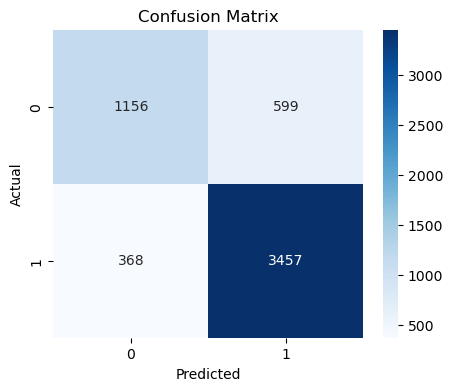

In [ ]:
# apply on encoded data
X = df_encoded.drop('Depression', axis=1)
y = df_encoded['Depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
Tr_score = model.score(X_train, y_train)
Tst_score = model.score(X_test, y_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Complete LogisticRegression Training Accuracy:", Tr_score)
print("Complete LogisticRegression Test Accuracy:", Tst_score)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

c:\Users\eslam\anaconda3\Lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Complete LogisticRegression Training Accuracy: 0.9413667610190053
Complete LogisticRegression Test Accuracy: 0.9466235341690254
Confusion Matrix:
 [[3070  130]
 [ 134 1612]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      3200
           1       0.93      0.92      0.92      1746

    accuracy                           0.95      4946
   macro avg       0.94      0.94      0.94      4946
weighted avg       0.95      0.95      0.95      4946



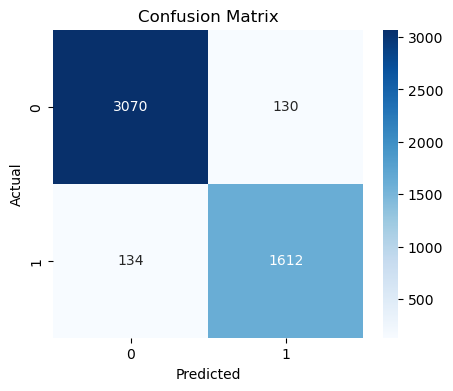

In [ ]:
# Balance the dataset
smote_enn = SMOTEENN(random_state = 42, n_jobs = -1)
X_resampled, y_resampled = smote_enn.fit_resample(X,y)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
Tr_score = model.score(X_train, y_train)
Tst_score = model.score(X_test, y_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Complete LogisticRegression Training Accuracy:", Tr_score)
print("Complete LogisticRegression Test Accuracy:", Tst_score)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
grid = GridSearchCV(LogisticRegression(), param_grid=params, cv=5)
grid.fit(X, y)
print("Best params:", grid.best_params_)

Best params: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


Complete LogisticRegression Training Accuracy: 0.9401536595228468
Complete LogisticRegression Test Accuracy: 0.94561261625556
Confusion Matrix:
 [[3069  131]
 [ 138 1608]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      3200
           1       0.92      0.92      0.92      1746

    accuracy                           0.95      4946
   macro avg       0.94      0.94      0.94      4946
weighted avg       0.95      0.95      0.95      4946



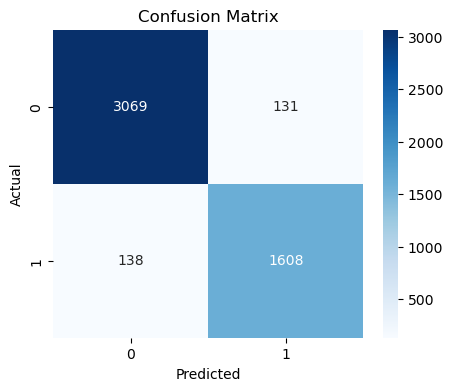

In [ ]:
model = LogisticRegression(max_iter=1000, C=grid.best_params_['C'], penalty=grid.best_params_['penalty'], solver=grid.best_params_['solver'])
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
Tr_score = model.score(X_train, y_train)
Tst_score = model.score(X_test, y_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Complete LogisticRegression Training Accuracy:", Tr_score)
print("Complete LogisticRegression Test Accuracy:", Tst_score)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X_resampled, y_resampled, cv=kf)

print("Cross-validation scores:", scores)
print("Average score:", scores.mean())

Cross-validation scores: [0.9458148  0.93974929 0.94419733 0.93752527 0.93813182]
Average score: 0.9410837040032349


**standardized data:**

Complete LogisticRegression Training Accuracy: 0.8237297248857425
Complete LogisticRegression Test Accuracy: 0.8267025089605735
Confusion Matrix:
 [[1156  599]
 [ 368 3457]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.66      0.71      1755
           1       0.85      0.90      0.88      3825

    accuracy                           0.83      5580
   macro avg       0.81      0.78      0.79      5580
weighted avg       0.82      0.83      0.82      5580



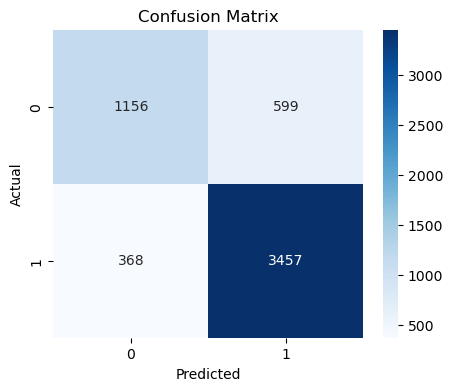

In [ ]:
# apply on standardized data
X = df_encoded.drop('Depression', axis=1)
y = df_encoded['Depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
Tr_score = model.score(X_train, y_train)
Tst_score = model.score(X_test, y_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Complete LogisticRegression Training Accuracy:", Tr_score)
print("Complete LogisticRegression Test Accuracy:", Tst_score)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

c:\Users\eslam\anaconda3\Lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Complete LogisticRegression Training Accuracy: 0.9413667610190053
Complete LogisticRegression Test Accuracy: 0.9466235341690254
Confusion Matrix:
 [[3070  130]
 [ 134 1612]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      3200
           1       0.93      0.92      0.92      1746

    accuracy                           0.95      4946
   macro avg       0.94      0.94      0.94      4946
weighted avg       0.95      0.95      0.95      4946



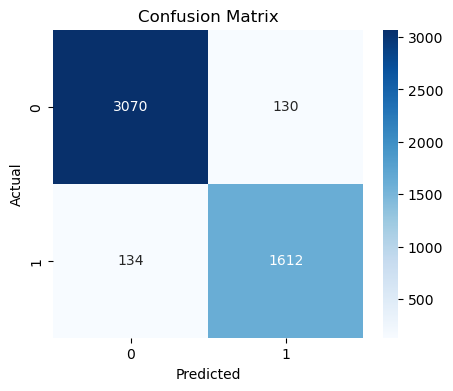

In [ ]:
# Balance the dataset
smote_enn = SMOTEENN(random_state = 42, n_jobs = -1)
X_resampled, y_resampled = smote_enn.fit_resample(X,y)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
Tr_score = model.score(X_train, y_train)
Tst_score = model.score(X_test, y_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Complete LogisticRegression Training Accuracy:", Tr_score)
print("Complete LogisticRegression Test Accuracy:", Tst_score)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
grid = GridSearchCV(LogisticRegression(), param_grid=params, cv=5)
grid.fit(X, y)
print("Best params:", grid.best_params_)

Best params: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


Complete LogisticRegression Training Accuracy: 0.9401536595228468
Complete LogisticRegression Test Accuracy: 0.94561261625556
Confusion Matrix:
 [[3069  131]
 [ 138 1608]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      3200
           1       0.92      0.92      0.92      1746

    accuracy                           0.95      4946
   macro avg       0.94      0.94      0.94      4946
weighted avg       0.95      0.95      0.95      4946



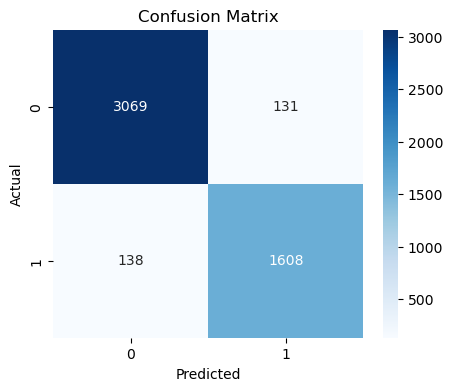

In [ ]:
model = LogisticRegression(max_iter=1000, C=grid.best_params_['C'], penalty=grid.best_params_['penalty'], solver=grid.best_params_['solver'])
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
Tr_score = model.score(X_train, y_train)
Tst_score = model.score(X_test, y_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Complete LogisticRegression Training Accuracy:", Tr_score)
print("Complete LogisticRegression Test Accuracy:", Tst_score)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

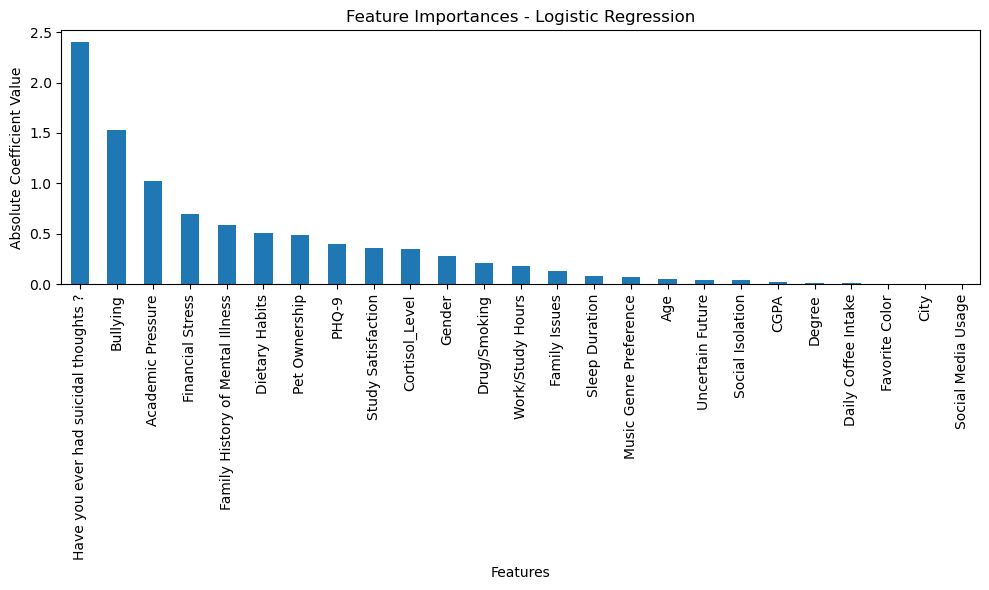

In [ ]:
coefficients = model.coef_[0]
features = X_train.columns
importance = pd.Series(np.abs(coefficients), index=features).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
importance.plot(kind='bar')
plt.title('Feature Importances - Logistic Regression')
plt.ylabel('Absolute Coefficient Value')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X_resampled, y_resampled, cv=kf)

print("Cross-validation scores:", scores)
print("Average score:", scores.mean())

Cross-validation scores: [0.9458148  0.93974929 0.94419733 0.93752527 0.93813182]
Average score: 0.9410837040032349


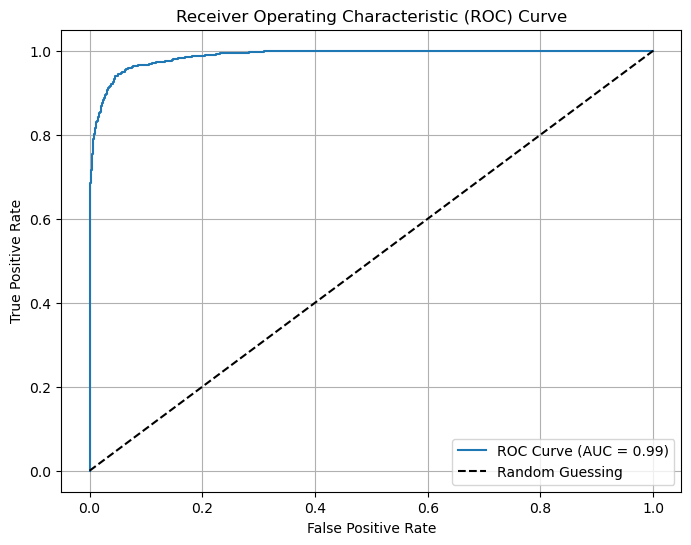

In [ ]:
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

#### **Random Forest:**

**encoded data:**

Accuracy: 0.8453405017921147

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.74      0.75      1755
           1       0.88      0.89      0.89      3825

    accuracy                           0.85      5580
   macro avg       0.82      0.82      0.82      5580
weighted avg       0.84      0.85      0.84      5580


Confusion Matrix:
 [[1303  452]
 [ 411 3414]]


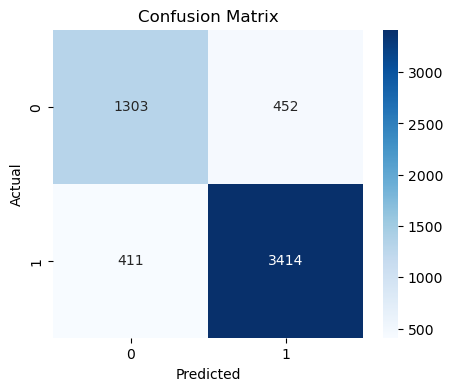

In [ ]:
X = df_encoded.drop('Depression', axis=1)
y = df_encoded['Depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

c:\Users\eslam\anaconda3\Lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Accuracy: 0.9720986655883542

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      3200
           1       0.97      0.95      0.96      1746

    accuracy                           0.97      4946
   macro avg       0.97      0.97      0.97      4946
weighted avg       0.97      0.97      0.97      4946


Confusion Matrix:
 [[3146   54]
 [  84 1662]]


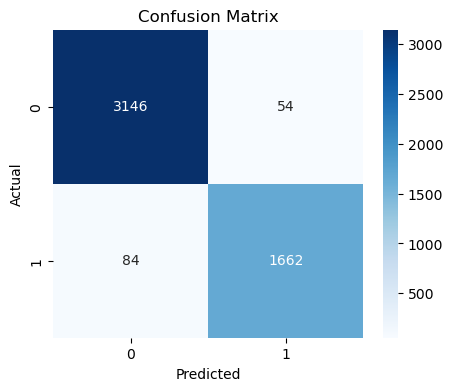

In [ ]:
# Balance the dataset
smote_enn = SMOTEENN(random_state = 42, n_jobs = -1)
X_resampled, y_resampled = smote_enn.fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(rf_model, X_resampled, y_resampled, cv=kf)

print("Cross-validation scores:", scores)
print("Average score:", scores.mean())

Cross-validation scores: [0.97371613 0.96967246 0.97513142 0.97088556 0.96704408]
Average score: 0.9712899312575818


**standardized data:**

Accuracy: 0.8455197132616488

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.74      0.75      1755
           1       0.88      0.89      0.89      3825

    accuracy                           0.85      5580
   macro avg       0.82      0.82      0.82      5580
weighted avg       0.84      0.85      0.84      5580


Confusion Matrix:
 [[1301  454]
 [ 408 3417]]


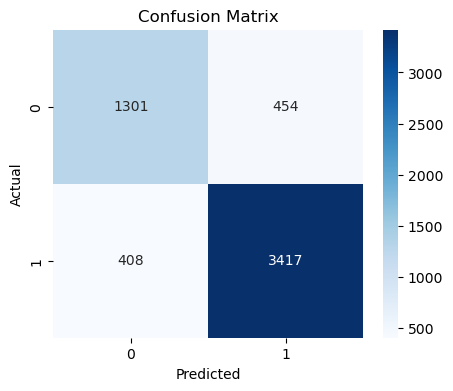

In [ ]:
X = df_standardized.drop('Depression', axis=1)
y = df_standardized['Depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

c:\Users\eslam\anaconda3\Lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Accuracy: 0.9724439376662866

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      3294
           1       0.97      0.95      0.96      1968

    accuracy                           0.97      5262
   macro avg       0.97      0.97      0.97      5262
weighted avg       0.97      0.97      0.97      5262


Confusion Matrix:
 [[3240   54]
 [  91 1877]]


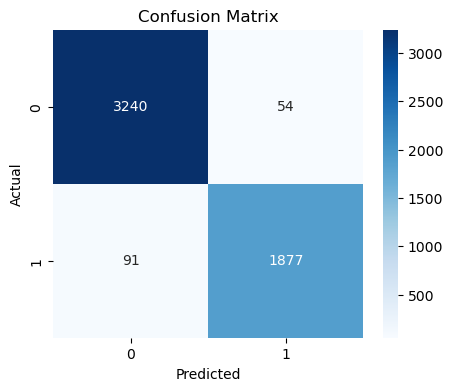

In [ ]:
# Balance the dataset
smote_enn = SMOTEENN(random_state = 42, n_jobs = -1)
X_resampled, y_resampled = smote_enn.fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

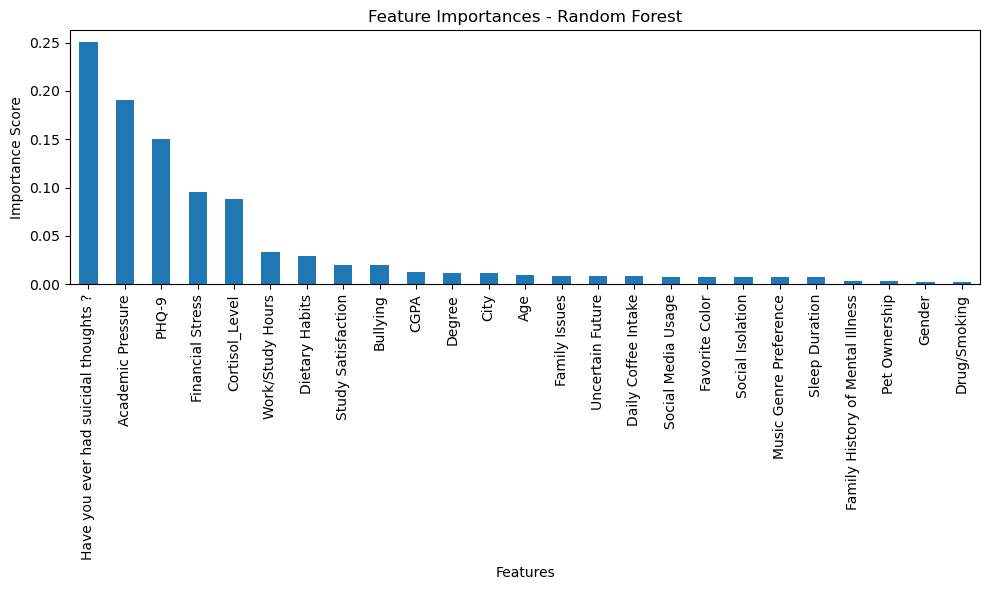

In [ ]:
# Get importances
importance = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
importance.plot(kind='bar')
plt.title('Feature Importances - Random Forest')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(rf_model, X_resampled, y_resampled, cv=kf)

print("Cross-validation scores:", scores)
print("Average score:", scores.mean())

Cross-validation scores: [0.97244394 0.97339415 0.96939745 0.97129823 0.96996769]
Average score: 0.9713002912722153


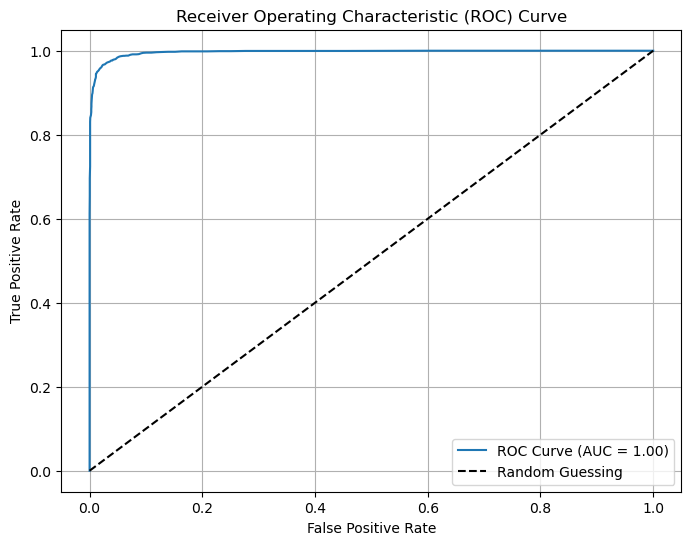

In [ ]:
y_prob = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

#### **LightGBM:**

**standardized data:**

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 15426, number of negative: 6892
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001255 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 694
[LightGBM] [Info] Number of data points in the train set: 22318, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.691191 -> initscore=0.805693
[LightGBM] [Info] Start training from score 0.805693
Accuracy: 0.8530465949820788

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77      1755
           1       0.89      0.89      0.89      3825

    accuracy                           0.85      5580
   macro avg       0.83      0.83      0.83      5580
weighted avg       0.85      0.85      0.85      5580


Confusion Matrix:
 [[1344  411]
 [ 409 3416]]


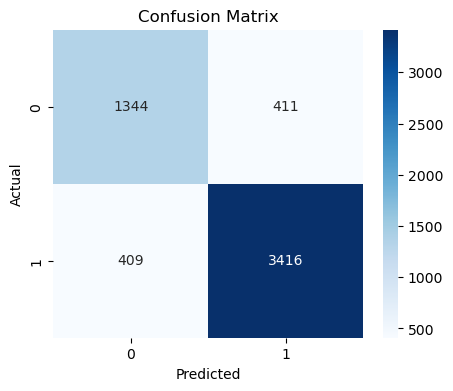

In [ ]:
from lightgbm import LGBMClassifier

X = df_standardized.drop(columns=["Depression"])
y = df_standardized["Depression"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LGBMClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


c:\Users\eslam\anaconda3\Lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8038, number of negative: 13007
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001147 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6373
[LightGBM] [Info] Number of data points in the train set: 21045, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381943 -> initscore=-0.481307
[LightGBM] [Info] Start training from score -0.481307
Accuracy: 0.9716837704294945

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      3294
           1       0.97      0.96      0.96      1968

    accuracy                           0.97      5262
   macro avg       0.97      0.97      0.97      5262
weighted avg       0.97      0.97      0.97      5262


Confusion Matrix:
 [[3233   61]
 [  88 1880]]

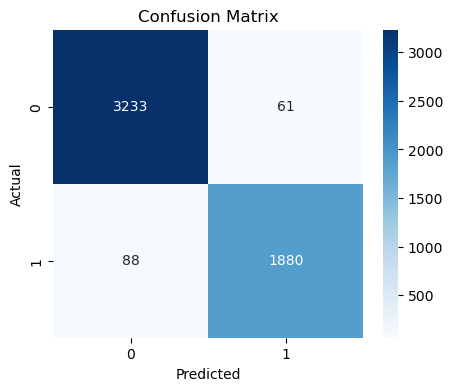

In [ ]:
# Balance the dataset
smote_enn = SMOTEENN(random_state = 42, n_jobs = -1)
X_resampled, y_resampled = smote_enn.fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

model = LGBMClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

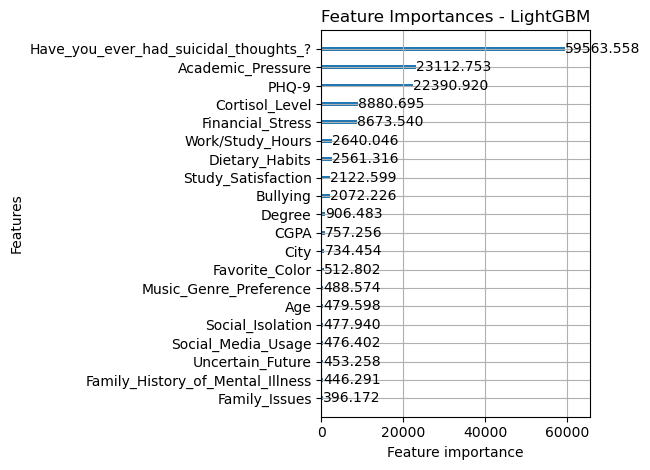

In [ ]:
from lightgbm import plot_importance
# Plot using LightGBM's built-in method
plot_importance(model, max_num_features=20, importance_type='gain')  # 'gain' is usually better than 'split'
plt.title('Feature Importances - LightGBM')
plt.tight_layout()
plt.show()

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X_resampled, y_resampled, cv=kf)

print("Cross-validation scores:", scores)
print("Average score:", scores.mean())

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8038, number of negative: 13007
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001237 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6373
[LightGBM] [Info] Number of data points in the train set: 21045, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381943 -> initscore=-0.481307
[LightGBM] [Info] Start training from score -0.481307
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7996, number of negative: 13049
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001112 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6372
[LightGBM] [Info] Number of data points in the train set: 21045, number of used f

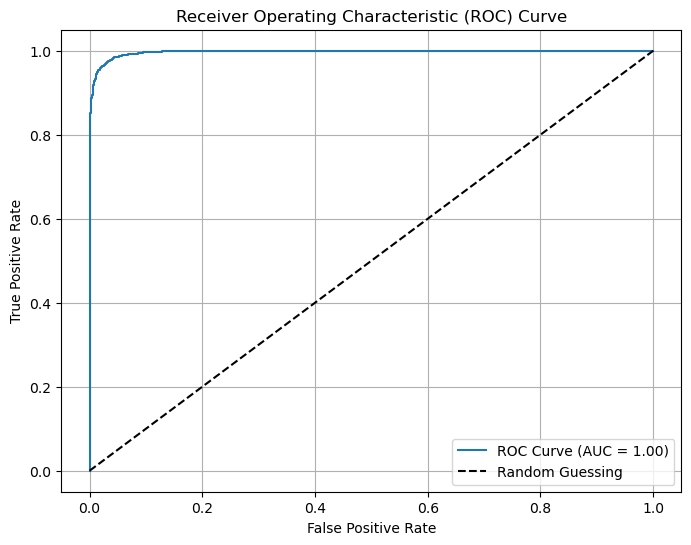

In [ ]:
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


#### **Part 3:**
#### by: Mariam Mostafa Abdelaal


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [12]:
# ---- Step 1: Load Dataset ----
df1 = pd.read_csv(r"C:\Users\arwah\OneDrive\Desktop\HealthCare Project\datasets\cleaned_data.csv")
df2 = pd.read_csv(r"C:\Users\arwah\OneDrive\Desktop\HealthCare Project\datasets\standardized_data.csv")
df3 = pd.read_csv(r"C:\Users\arwah\OneDrive\Desktop\HealthCare Project\datasets\normalized_data.csv")
     

In [13]:
# ---- Step 2: Combine datasets ----
df = pd.concat([df1, df2, df3], ignore_index=True)

In [14]:
# ---- Step 3: Prepare features and labels ----
X = df.iloc[:, :-1].values  # All columns except last one
y = df.iloc[:, -1].values   # Last column as label

In [15]:
# ---- Step 4: Train/Test split ----
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
# ---- Step 5: SVM Model ----
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

In [17]:
# ---- Step 6: Gradient Boosting Model ----
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)

In [18]:
# ---- Step 7: Evaluation ----
print("=== SVM Results ===")
print("Accuracy:", accuracy_score(y_test, svm_preds))
print(classification_report(y_test, svm_preds))
     

=== SVM Results ===
Accuracy: 0.7985981122306742
              precision    recall  f1-score   support

           0       0.75      0.54      0.63      7849
           1       0.81      0.92      0.86     17260

    accuracy                           0.80     25109
   macro avg       0.78      0.73      0.74     25109
weighted avg       0.79      0.80      0.79     25109



In [19]:
print("\n=== Gradient Boosting Results ===")
print("Accuracy:", accuracy_score(y_test, gb_preds))
print(classification_report(y_test, gb_preds))


=== Gradient Boosting Results ===
Accuracy: 0.8417698833087738
              precision    recall  f1-score   support

           0       0.77      0.71      0.74      7849
           1       0.87      0.90      0.89     17260

    accuracy                           0.84     25109
   macro avg       0.82      0.80      0.81     25109
weighted avg       0.84      0.84      0.84     25109



#### **Part 4:**
#### by: Mariam Mostafa Abdelaziz

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE


In [3]:
RANDOM_STATE = 42

# Load datasets
cleaned_df = pd.read_csv(r"C:\Users\arwah\OneDrive\Desktop\HealthCare Project\DATASETS\cleaned_data.csv")
standardized_df = pd.read_csv(r"C:\Users\arwah\OneDrive\Desktop\HealthCare Project\DATASETS\standardized_data.csv")
normalized_df = pd.read_csv(r"C:\Users\arwah\OneDrive\Desktop\HealthCare Project\DATASETS\normalized_data.csv")

datasets = {
    "Cleaned": cleaned_df,
    "Standardized": standardized_df,
    "Normalized": normalized_df
}

In [4]:
# Parameter grids
param_grids = {
    "Decision Tree": {
        "max_depth": [5, 10, 15],
        "criterion": ["gini", "entropy"]
    },
    "KNN": {
        "n_neighbors": [3, 5, 7],
        "weights": ["uniform", "distance"]
    }
}

In [5]:
# Evaluate function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_pred),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }


In [6]:
# Results container
all_results = []

# Process each dataset
for name, df in datasets.items():
    print(f"\nProcessing dataset: {name}")
    X = df.drop("Depression", axis=1)
    y = df["Depression"]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE)

    # Apply SMOTE
    smote = SMOTE(random_state=RANDOM_STATE)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Model definitions
    models = {
        "Decision Tree": GridSearchCV(DecisionTreeClassifier(random_state=RANDOM_STATE), param_grids["Decision Tree"], cv=5),
        "Naive Bayes": GaussianNB(),
        "KNN": GridSearchCV(KNeighborsClassifier(), param_grids["KNN"], cv=5)
    }

    for model_name, model in models.items():
        print(f"\nTraining model: {model_name} on {name}")
        model.fit(X_train_resampled, y_train_resampled)
        result = evaluate_model(model, X_test, y_test)
        best_params = model.best_params_ if hasattr(model, "best_params_") else "Default"
        result.update({
            "Dataset": name,
            "Model": model_name,
            "Best Params": best_params
        })
        all_results.append(result)


Processing dataset: Cleaned

Training model: Decision Tree on Cleaned

Training model: Naive Bayes on Cleaned

Training model: KNN on Cleaned

Processing dataset: Standardized

Training model: Decision Tree on Standardized

Training model: Naive Bayes on Standardized

Training model: KNN on Standardized

Processing dataset: Normalized

Training model: Decision Tree on Normalized

Training model: Naive Bayes on Normalized

Training model: KNN on Normalized


In [7]:
# Output results
results_df = pd.DataFrame(all_results)
results_df.to_csv("churn_model_evaluation_results.csv", index=False)
print("\nAll model results saved to churn_model_evaluation_results.csv")


All model results saved to churn_model_evaluation_results.csv


#### **unsupervised:**

#### by: Arwa Hamdy

In [ ]:
#read the encoded dataset depression
df=pd.read_csv(r"C:\Users\arwah\OneDrive\Desktop\HealthCare Project\datasets\cleaned_data.csv")
df.head(9)

Gender   Age  City  Academic Pressure  CGPA  Study Satisfaction  \
0       1  23.0    51                5.0  8.97                 2.0   
1       0  24.0     3                2.0  5.90                 5.0   
2       1  17.0    44                3.0  7.03                 5.0   
3       0  17.0    49                3.0  5.59                 2.0   
4       0  25.0    16                4.0  8.13                 3.0   
5       1  25.0    39                2.0  5.70                 3.0   
6       1  24.0    46                3.0  9.54                 4.0   
7       0  24.0     6                2.0  8.04                 4.0   
8       1  19.0    33                3.0  9.79                 1.0   

   Sleep Duration  Dietary Habits  Degree  \
0               0               0       3   
1               0               1      10   
2               2               0       5   
3               1               1       7   
4               0               1      16   
5               2               0      12   
6               1               0      10   
7               2               3      11   
8               1               1       2   

   Have you ever had suicidal thoughts ?  ...  Uncertain Future  \
0                                      1  ...                 1   
1                                      0  ...                 2   
2                                      0  ...                 1   
3                                      1  ...                 2   
4                                      1  ...                 1   
5                                      0  ...                 3   
6                                      0  ...                 5   
7                                      0  ...                 5   
8                                      1  ...                 2   

   Social Media Usage  Drug/Smoking  Favorite Color  Pet Ownership  \
0                   2             1               2              0   
1                   4             1               4              0   
2                   5             0               4              1   
3                   1             1               0              1   
4                   1             1               1              0   
5                   5             0               4              1   
6                   3             1               1              0   
7                   1             1               4              1   
8                   1             0               2              0   

   Daily Coffee Intake  Music Genre Preference  PHQ-9  Cortisol_Level  \
0                    1                       3     10        6.655000   
1                    1                       4      4        5.123958   
2                    2                       3      4        4.190609   
3                    4                       0      9        7.467984   
4                    4                       3      9        0.406585   
5                    4                       2      7        4.207805   
6                    0                       0      4        4.956508   
7                    2                       2      8        9.909730   
8                    1                       3     19        1.486374   

   Depression  
0           1  
1           0  
2           0  
3           1  
4           0  
5           1  
6           0  
7           1  
8           1  

[9 rows x 26 columns]

In [ ]:
X = df.drop(columns=["Depression"])


In [ ]:
X.columns 


Index(['Gender', 'Age', 'City', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness',
       'Social Isolation', 'Bullying', 'Family Issues', 'Uncertain Future',
       'Social Media Usage', 'Drug/Smoking', 'Favorite Color', 'Pet Ownership',
       'Daily Coffee Intake', 'Music Genre Preference', 'PHQ-9',
       'Cortisol_Level'],
      dtype='object')

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X

Gender   Age  City  Academic Pressure  CGPA  Study Satisfaction  \
0           1  23.0    51                5.0  8.97                 2.0   
1           0  24.0     3                2.0  5.90                 5.0   
2           1  17.0    44                3.0  7.03                 5.0   
3           0  17.0    49                3.0  5.59                 2.0   
4           0  25.0    16                4.0  8.13                 3.0   
...       ...   ...   ...                ...   ...                 ...   
27893       0  25.0    45                5.0  5.75                 5.0   
27894       1  19.0    25                2.0  9.40                 3.0   
27895       1  23.0     9                3.0  6.61                 4.0   
27896       0  18.0    25                5.0  6.88                 2.0   
27897       1  24.0    38                4.0  9.24                 1.0   

       Sleep Duration  Dietary Habits  Degree  \
0                   0               0       3   
1                   0               1      10   
2                   2               0       5   
3                   1               1       7   
4                   0               1      16   
...               ...             ...     ...   
27893               0               3      11   
27894               2               0      22   
27895               0               3       0   
27896               2               0      11   
27897               2               0       7   

       Have you ever had suicidal thoughts ?  ...  Family Issues  \
0                                          1  ...              2   
1                                          0  ...              3   
2                                          0  ...              5   
3                                          1  ...              3   
4                                          1  ...              1   
...                                      ...  ...            ...   
27893                                      1  ...              1   
27894                                      0  ...              1   
27895                                      0  ...              5   
27896                                      1  ...              4   
27897                                      1  ...              2   

       Uncertain Future  Social Media Usage  Drug/Smoking  Favorite Color  \
0                     1                   2             1               2   
1                     2                   4             1               4   
2                     1                   5             0               4   
3                     2                   1             1               0   
4                     1                   1             1               1   
...                 ...                 ...           ...             ...   
27893                 1                   5             1               1   
27894                 3                   5             1               4   
27895                 4                   4             1               2   
27896                 3                   5             0               3   
27897                 1                   5             0               0   

       Pet Ownership  Daily Coffee Intake  Music Genre Preference  PHQ-9  \
0                  0                    1                       3     10   
1                  0                    1                       4      4   
2                  1                    2                       3      4   
3                  1                    4                       0      9   
4                  0                    4                       3      9   
...              ...                  ...                     ...    ...   
27893              0                    1                       1      1   
27894              1                    0                       0      5   
27895              0                    1                       2      8   
27896              1       

In [ ]:
X_small = X_scaled[:8000]
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_small)

In [ ]:
linked = linkage(X_pca, method='ward')

clusters = fcluster(linked, t=2, criterion='maxclust')

In [ ]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca, clusters)
print(f"Silhouette Score for PCA and Hierarchical Clustering: {silhouette}")


Silhouette Score for PCA and Hierarchical Clustering: 0.35576378354351096


In [ ]:
X_small_df = pd.DataFrame(X_pca, columns=["PCA 1", "PCA 2"])

X_small_df["Cluster"] = clusters

print(X_small_df["Cluster"].value_counts())


Cluster
2    5336
1    2664
Name: count, dtype: int64


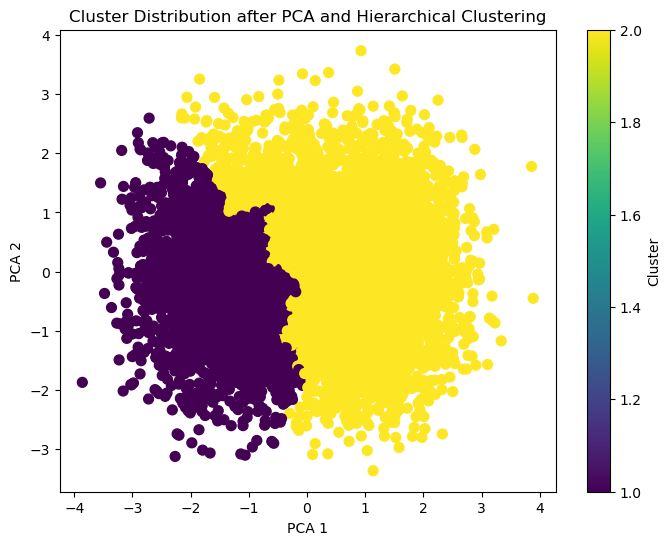

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_small_df["PCA 1"], X_small_df["PCA 2"], c=X_small_df["Cluster"], cmap='viridis', s=50)
plt.title("Cluster Distribution after PCA and Hierarchical Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN


In [ ]:
#read the encoded dataset depression
df=pd.read_csv(r"C:\Users\arwah\OneDrive\Desktop\HealthCare Project\datasets\cleaned_data.csv")
df.head(9)

Gender   Age  City  Academic Pressure  CGPA  Study Satisfaction  \
0       1  23.0    51                5.0  8.97                 2.0   
1       0  24.0     3                2.0  5.90                 5.0   
2       1  17.0    44                3.0  7.03                 5.0   
3       0  17.0    49                3.0  5.59                 2.0   
4       0  25.0    16                4.0  8.13                 3.0   
5       1  25.0    39                2.0  5.70                 3.0   
6       1  24.0    46                3.0  9.54                 4.0   
7       0  24.0     6                2.0  8.04                 4.0   
8       1  19.0    33                3.0  9.79                 1.0   

   Sleep Duration  Dietary Habits  Degree  \
0               0               0       3   
1               0               1      10   
2               2               0       5   
3               1               1       7   
4               0               1      16   
5               2               0      12   
6               1               0      10   
7               2               3      11   
8               1               1       2   

   Have you ever had suicidal thoughts ?  ...  Uncertain Future  \
0                                      1  ...                 1   
1                                      0  ...                 2   
2                                      0  ...                 1   
3                                      1  ...                 2   
4                                      1  ...                 1   
5                                      0  ...                 3   
6                                      0  ...                 5   
7                                      0  ...                 5   
8                                      1  ...                 2   

   Social Media Usage  Drug/Smoking  Favorite Color  Pet Ownership  \
0                   2             1               2              0   
1                   4             1               4              0   
2                   5             0               4              1   
3                   1             1               0              1   
4                   1             1               1              0   
5                   5             0               4              1   
6                   3             1               1              0   
7                   1             1               4              1   
8                   1             0               2              0   

   Daily Coffee Intake  Music Genre Preference  PHQ-9  Cortisol_Level  \
0                    1                       3     10        6.655000   
1                    1                       4      4        5.123958   
2                    2                       3      4        4.190609   
3                    4                       0      9        7.467984   
4                    4                       3      9        0.406585   
5                    4                       2      7        4.207805   
6                    0                       0      4        4.956508   
7                    2                       2      8        9.909730   
8                    1                       3     19        1.486374   

   Depression  
0           1  
1           0  
2           0  
3           1  
4           0  
5           1  
6           0  
7           1  
8           1  

[9 rows x 26 columns]

In [ ]:
X = df.drop(columns=["Depression"])  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

In [ ]:
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)


no thing to cluster
Cluster
0    27898
Name: count, dtype: int64


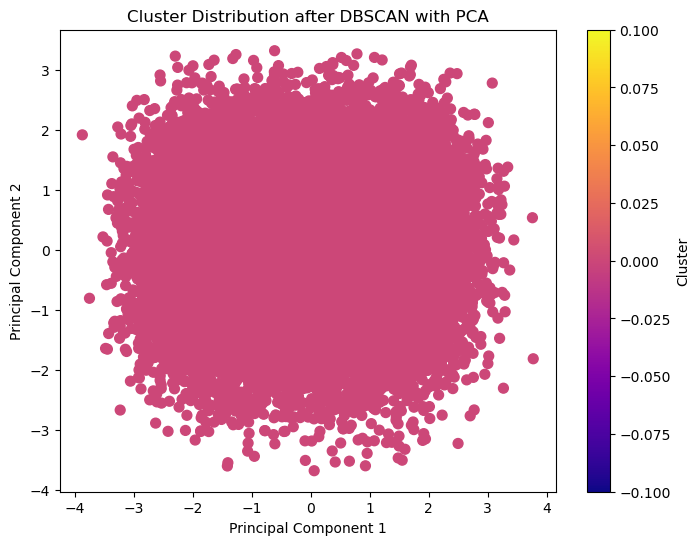

In [ ]:

dbscan = DBSCAN(eps=2, min_samples=5)  
clusters = dbscan.fit_predict(X_pca)

valid_mask = clusters != -1
if len(set(clusters[valid_mask])) > 1:
    silhouette = silhouette_score(X_pca[valid_mask], clusters[valid_mask])
    print(f"Silhouette Score for DBSCAN with PCA: {silhouette}")
else:
    print("no thing to cluster")

X["Cluster"] = clusters


print(X["Cluster"].value_counts())


plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='plasma', s=50)
plt.title("Cluster Distribution after DBSCAN with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()


Silhouette Score for KMeans with PCA: 0.2789821185302457
Cluster
0    15624
1    12274
Name: count, dtype: int64


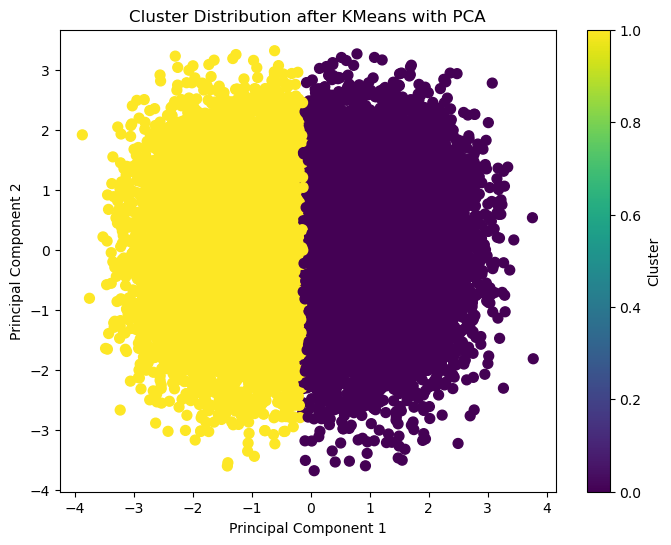

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)  
clusters = kmeans.fit_predict(X_pca)


silhouette = silhouette_score(X_pca, clusters)
print(f"Silhouette Score for KMeans with PCA: {silhouette}")


X["Cluster"] = clusters


print(X["Cluster"].value_counts())


plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("Cluster Distribution after KMeans with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
df["Cluster"] = clusters
cluster_summary = df.groupby("Cluster").mean()
print(cluster_summary)


           Gender        Age       City  Academic Pressure      CGPA  \
Cluster                                                                
0        0.566116  21.023618  25.813684           3.786930  7.676394   
1        0.545951  21.048884  26.905654           2.319537  7.630403   

         Study Satisfaction  Sleep Duration  Dietary Habits    Degree  \
Cluster                                                                 
0                  2.658282        1.471902        1.752752  9.332821   
1                  3.307642        1.561920        1.100538  9.244175   

         Have you ever had suicidal thoughts ?  ...  Uncertain Future  \
Cluster                                         ...                     
0                                     0.893433  ...          2.972158   
1                                     0.301206  ...          3.028597   

         Social Media Usage  Drug/Smoking  Favorite Color  Pet Ownership  \
Cluster                                          

In [ ]:
print(df.groupby("Cluster")["Depression"].value_counts(normalize=True))


Cluster  Depression
0        1             0.922171
         0             0.077829
1        0             0.605426
         1             0.394574
Name: proportion, dtype: float64
